# 2017 Final (Actually)

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from boruta import BorutaPy
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot
import random
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import hyperopt.pyll.stochastic
import seaborn as sns
from sklearn.model_selection import KFold

# Load and Format Data

In [2]:
os.chdir('/Users/johnoliver/Downloads/grad-nba-wins/final_data')

# 2018
df17 = pd.read_csv("mod17.csv")

# get rid of first variable (unique identifier)
df17 = df17.iloc[:,1:]
df17['win_status'] = df17['win_status'].replace(['Home'],1)
df17['win_status'] = df17['win_status'].replace(['Away'],0)

In [3]:
# define team stats
feature_cols = ["h_avg_points","a_avg_points","h_avg_fg","a_avg_fg",
                "h_avg_fga","a_avg_fga","h_avg_3p","a_avg_3p",
                "h_avg_3pa","a_avg_3pa","h_avg_ft","a_avg_ft",
                "h_avg_orb","a_avg_orb","h_avg_drb" ,"a_avg_drb",
                "h_avg_ast","a_avg_ast","h_avg_stl", "a_avg_stl", 
                "h_avg_blk","a_avg_blk","h_avg_tov","a_avg_tov",
                "h_avg_pf","a_avg_pf" ,"h_avg_tsp",  "a_avg_tsp",
                "h_avg_ortg","a_avg_ortg","h_avg_drtg","a_avg_drtg"]

# 2017
X = df17[feature_cols]
Y = df17.win_status

In [4]:
random.seed(1)
boruta_features = ['h_avg_tov', 'h_avg_tsp', 'a_avg_tsp', 
                   'h_avg_ortg', 'a_avg_ortg', 'h_avg_drtg',
                   'a_avg_drtg', "h_win_perc","a_win_perc",
                   "h_back","a_back", "home_elo", "away_elo"]

X_bor = df17[boruta_features]
Y_bor = df17.win_status

scaler = StandardScaler()
scale_X = scaler.fit_transform(X_bor)

In [5]:
# split data into training and testing
X_train,X_test,y_train,y_test=train_test_split(X_bor,Y_bor,
                                               test_size=0.4,
                                               random_state=1)

X_train2,X_test2,y_train2,y_test2=train_test_split(X_bor,Y_bor,
                                               test_size=0.4,
                                               random_state=15)

X_train3,X_test3,y_train3,y_test3=train_test_split(X_bor,Y_bor,
                                               test_size=0.4,
                                               random_state=27)

X_train4,X_test4,y_train4,y_test4=train_test_split(X_bor,Y_bor,
                                               test_size=0.4,
                                               random_state=10)

X_train5,X_test5,y_train5,y_test5=train_test_split(X_bor,Y_bor,
                                               test_size=0.4,
                                               random_state=34)



# split data into training and testing
scale_X_train,scale_X_test,y_train,y_test=train_test_split(X_bor,Y_bor,
                                               test_size=0.4,
                                               random_state=1)

scale_X_train2,scale_X_test2,y_train2,y_test2=train_test_split(X_bor,Y_bor,
                                               test_size=0.4,
                                               random_state=15)

scale_X_train3,scale_X_test3,y_train3,y_test3=train_test_split(X_bor,Y_bor,
                                               test_size=0.4,
                                               random_state=27)

scale_X_train4,scale_X_test4,y_train4,y_test4=train_test_split(X_bor,Y_bor,
                                               test_size=0.4,
                                               random_state=10)

scale_X_train5,scale_X_test5,y_train5,y_test5=train_test_split(X_bor,Y_bor,
                                               test_size=0.4,
                                               random_state=34)

# Logistic Regression

## Unparameterized

In [9]:
%%time
cv = KFold(n_splits=10)
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_cv_results = cross_val_score(lr_model, X_train, y_train,
                        scoring = 'accuracy', cv = cv,
                        n_jobs = 1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

CPU times: user 544 ms, sys: 30.9 ms, total: 575 ms
Wall time: 639 ms


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

In [ ]:
%%time
lr_model2 = LogisticRegression()
lr_model2.fit(X_train2,y_train2)
lr_cv_results2 = cross_val_score(lr_model2, X_train2, y_train2,
                        scoring = 'accuracy', cv = cv,
                        n_jobs = 1)

In [ ]:
%%time
lr_model3 = LogisticRegression()
lr_model3.fit(X_train3,y_train3)
lr_cv_results3 = cross_val_score(lr_model3, X_train3, y_train3,
                        scoring = 'accuracy', cv = cv,
                        n_jobs = 1)

In [ ]:
%%time
lr_model4 = LogisticRegression()
lr_model4.fit(X_train4,y_train4)
lr_cv_results4 = cross_val_score(lr_model4, X_train4, y_train4,
                        scoring = 'accuracy', cv = cv,
                        n_jobs = 1)

In [ ]:
%%time
lr_model5 = LogisticRegression()
lr_model5.fit(X_train5,y_train5)
lr_cv_results5 = cross_val_score(lr_model5, X_train5, y_train5,
                        scoring = 'accuracy', cv = cv,
                        n_jobs = 1)

In [ ]:
lr_preds = lr_model.predict(X_test)
lr_probs = lr_model.predict_proba(X_test)
lr_tn, lr_fp, lr_fn, lr_tp = confusion_matrix(y_test, lr_preds).ravel()
lr_specificity = lr_tn / (lr_tn + lr_fp)
lr_sensitivity = lr_tp / (lr_tp + lr_fn)
lr_precision = lr_tp / (lr_tp + lr_fp)

lr_preds2 = lr_model2.predict(X_test2)
lr_probs2 = lr_model2.predict_proba(X_test2)
lr_tn2, lr_fp2, lr_fn2, lr_tp2 = confusion_matrix(y_test2, lr_preds2).ravel()
lr_specificity2 = lr_tn2 / (lr_tn2 + lr_fp2)
lr_sensitivity2 = lr_tp2 / (lr_tp2 + lr_fn2)
lr_precision2 = lr_tp2 / (lr_tp2 + lr_fp2)

lr_preds3 = lr_model3.predict(X_test3)
lr_probs3 = lr_model3.predict_proba(X_test3)
lr_tn3, lr_fp3, lr_fn3, lr_tp3 = confusion_matrix(y_test3, lr_preds3).ravel()
lr_specificity3 = lr_tn3 / (lr_tn3 + lr_fp3)
lr_sensitivity3 = lr_tp3 / (lr_tp3 + lr_fn3)
lr_precision3 = lr_tp3 / (lr_tp3 + lr_fp3)

lr_preds4 = lr_model4.predict(X_test4)
lr_probs4 = lr_model4.predict_proba(X_test4)
lr_tn4, lr_fp4, lr_fn4, lr_tp4 = confusion_matrix(y_test4, lr_preds4).ravel()
lr_specificity4 = lr_tn4 / (lr_tn4 + lr_fp4)
lr_sensitivity4 = lr_tp4 / (lr_tp4 + lr_fn4)
lr_precision4 = lr_tp4 / (lr_tp4 + lr_fp4)

lr_preds5 = lr_model5.predict(X_test5)
lr_probs5 = lr_model5.predict_proba(X_test5)
lr_tn5, lr_fp5, lr_fn5, lr_tp5 = confusion_matrix(y_test5, lr_preds5).ravel()
lr_specificity5 = lr_tn5 / (lr_tn5 + lr_fp5)
lr_sensitivity5 = lr_tp5 / (lr_tp5 + lr_fn5)
lr_precision5 = lr_tp5 / (lr_tp5 + lr_fp5)

In [ ]:
print("FIT 1")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test, lr_preds),4))
print("AUC: ", round(roc_auc_score(y_test, lr_probs[:,1]),4))
print("Spec: ", round(lr_specificity,4))
print("Sens: ", round(lr_sensitivity,4))
print("Precision: ", round(lr_precision,4))
print(" ")

print("FIT 2")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test2, lr_preds2),4))
print("AUC: ", round(roc_auc_score(y_test2, lr_probs2[:,1]),4))
print("Spec: ", round(lr_specificity2,4))
print("Sens: ", round(lr_sensitivity2,4))
print("Precision: ", round(lr_precision2,4))
print(" ")

print("FIT 3")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test3, lr_preds3),4))
print("AUC: ", round(roc_auc_score(y_test3, lr_probs3[:,1]),4))
print("Spec: ", round(lr_specificity3,4))
print("Sens: ", round(lr_sensitivity3,4))
print("Precision: ", round(lr_precision3,4))
print(" ")


print("FIT 4")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test4, lr_preds4),4))
print("AUC :", round(roc_auc_score(y_test4, lr_probs4[:,1]),4))
print("Spec: ", round(lr_specificity4,4))
print("Sens: ", round(lr_sensitivity4,4))
print("Precision: ", round(lr_precision4,4))
print(" ")

print("FIT 5")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test5, lr_preds5),4))
print("AUC: ", round(roc_auc_score(y_test5, lr_probs5[:,1]),4))
print("Spec: ", round(lr_specificity5,4))
print("Sens: ", round(lr_sensitivity5,4))
print("Precision: ", round(lr_precision5,4))
print(" ")


## Random Search

In [10]:
lr_space = dict()
lr_space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
lr_space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
lr_space['C'] = loguniform(1e-5, 100)
lr_space['multi_class'] = ['auto', 'ovr']
lr_space['verbose'] = [0, 1, 2]

In [11]:
%%time
# set up k fold cross validation 
lr_model = LogisticRegression()

# define random search domain
lr_rand_model = RandomizedSearchCV(lr_model, lr_space, n_iter=200,
                            scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
lr_rand_model = lr_rand_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  8.41290D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  8.02461D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  7.70361D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  8.98932D+04

At iterate   50    f=  3.09883D+02    |proj g|=  3.08347D+01

At iterate   50    f=

 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib

    f=  3.10560D+02    |proj g|=  1.82814D+02

At iterate   50    f=  3.07212D+02    |proj g|=  7.09383D+01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  9.20458D+04

At iterate   50    f=  3.12697D+02    |proj g|=  7.16939D+00

At iterate  100    f=  3.10166D+02    |proj g|=  2.94863D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    116      1     0     0   2.949D+02   3.102D+02
  F =   310.16591553692399     

STOP: TOTAL NO. of ITER

: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend wit

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line sear

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packa

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding erro

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('T

iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 9
iter   4  #CD cycles 1
iter   5  #CD cycles 222
iter   6  #CD cycles 33
iter   7  #CD cycles 14
iter   8  #CD cycles 1
iter   9  #CD cycles 118
iter  10  #CD cycles 1
iter  11  #CD cycles 103
iter  12  #CD cycles 25
iter  13  #CD cycles 101
iter  14  #CD cycles 268
iter  15  #CD cycles 10
iter  16  #CD cycles 34
iter  17  #CD cycles 16
iter  18  #CD cycles 8
iter  19  #CD cycles 2
iter  20  #CD cycles 1
iter  21  #CD cycles 7
iter  22  #CD cycles 28
iter  23  #CD cycles 4
iter  24  #CD cycles 20
iter  25  #CD cycles 16
iter  26  #CD cycles 44
iter  27  #CD cycles 7
iter  28  #CD cycles 27
iter  29  #CD cycles 27
iter  30  #CD cycles 11
iter  31  #CD cycles 7
iter  32  #CD cycles 62
iter  33  #CD cycles 9
iter  34  #CD cycles 9
iter  35  #CD cycles 5
iter  36  #CD cycles 8
iter  37  #CD cycles 19
iter  38  #CD cycles 20
iter  39  #CD cycles 11
iter  40  #CD cycles 15
iter  41  #CD cycles 3
iter  42  #CD cycles 5
iter  

iter  44  #CD cycles 478
iter  45  #CD cycles 52
iter  46  #CD cycles 119
iter  47  #CD cycles 9
iter  48  #CD cycles 14
iter  49  #CD cycles 79
iter  50  #CD cycles 98
iter  51  #CD cycles 92
iter  52  #CD cycles 87
iter  53  #CD cycles 10
iter  54  #CD cycles 10
iter  55  #CD cycles 29
iter  56  #CD cycles 12
iter  57  #CD cycles 5
iter  58  #CD cycles 2
iter  59  #CD cycles 13
iter  60  #CD cycles 4
iter  61  #CD cycles 35
iter  62  #CD cycles 10
iter  63  #CD cycles 50
iter  64  #CD cycles 20
iter  65  #CD cycles 12
iter  66  #CD cycles 4
iter  67  #CD cycles 15
iter  68  #CD cycles 2
iter  69  #CD cycles 3
iter  70  #CD cycles 16
iter  71  #CD cycles 51
iter  72  #CD cycles 1
iter  73  #CD cycles 381
iter  74  #CD cycles 22
iter  75  #CD cycles 45
iter  76  #CD cycles 5
iter  77  #CD cycles 2
iter  78  #CD cycles 40
iter  79  #CD cycles 82
iter  80  #CD cycles 15
iter  81  #CD cycles 19
iter  82  #CD cycles 22
iter  83  #CD cycles 27
iter  84  #CD cycles 14
iter  85  #CD cycles 17

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 2
iter   4  #CD cycles 15
iter   5  #CD cycles 3
iter   6  #CD cycles 6
iter   7  #CD cycles 2
iter   8  #CD cycles 2
iter   9  #CD cycles 1
iter  10  #CD cycles 164
iter  11  #CD cycles 16
iter  12  #CD cycles 13
iter  13  #CD cycles 2
iter  14  #CD cycles 16
iter  15  #CD cycles 3
iter  16  #CD cycles 1
iter  17  #CD cycles 81
iter  18  #CD cycles 30
iter  19  #CD cycles 13
iter  20  #CD cycles 32
iter  21  #CD cycles 32
iter  22  #CD cycles 2
iter  23  #CD cycles 21
iter  24  #CD cycles 6
iter  25  #CD cycles 2
iter  26  #CD cycles 3
iter  27  #CD cycles 7
iter  28  #CD cycles 6
iter  29  #CD cycles 3
iter  30  #CD cycles 1
iter  31  #CD cycles 27
iter  32  #CD cycles 23
iter  33  #CD cycles 130
iter  34  #CD cycles 16
iter  35  #CD cycles 40
iter  36  #CD cycles 23
iter  37  #CD cycles 9
iter  38  #CD cycles 4
iter  39  #CD cycles 4
iter  40  #CD cycles 4
iter  41  #CD cycles 2
iter  42  #CD cycles 26
iter  43  #CD 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.fram

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
[Parallel(n_jobs=1

iter  1 act 5.768e-04 pre 5.734e-04 delta 1.792e-04 f 2.190e-02 |g| 6.438e+00 CG   1
cg reaches trust region boundary
iter  2 act 9.304e-05 pre 9.303e-05 delta 7.168e-04 f 2.132e-02 |g| 5.392e-01 CG   1
cg reaches trust region boundary
iter  3 act 3.430e-04 pre 3.433e-04 delta 2.867e-03 f 2.123e-02 |g| 6.247e-01 CG   2
cg reaches trust region boundary
iter  4 act 9.159e-04 pre 9.027e-04 delta 4.759e-03 f 2.089e-02 |g| 8.300e-01 CG   2
iter  5 act 2.114e-04 pre 2.025e-04 delta 4.759e-03 f 1.997e-02 |g| 1.953e-01 CG   2
iter  6 act 1.310e-06 pre 1.303e-06 delta 4.759e-03 f 1.976e-02 |g| 7.205e-02 CG   2
iter  7 act 3.727e-06 pre 3.727e-06 delta 4.759e-03 f 1.976e-02 |g| 3.551e-03 CG   4
iter  8 act 1.849e-11 pre 1.849e-11 delta 4.759e-03 f 1.975e-02 |g| 3.423e-04 CG   2
iter  1 act 6.291e-04 pre 6.250e-04 delta 1.875e-04 f 2.190e-02 |g| 6.710e+00 CG   1
cg reaches trust region boundary
iter  2 act 9.807e-05 pre 9.805e-05 delta 7.501e-04 f 2.127e-02 |g| 5.515e-01 CG   1
cg reaches trust r

iter  1 act 1.404e+00 pre 1.393e+00 delta 2.108e-04 f 3.862e+01 |g| 1.332e+04 CG   1
cg reaches trust region boundary
iter  2 act 1.362e-01 pre 1.359e-01 delta 3.946e-04 f 3.721e+01 |g| 8.816e+02 CG   1
cg reaches trust region boundary
iter  3 act 3.536e-01 pre 3.542e-01 delta 1.278e-03 f 3.708e+01 |g| 2.345e+03 CG   2
cg reaches trust region boundary
iter  4 act 8.408e-01 pre 8.380e-01 delta 4.187e-03 f 3.672e+01 |g| 8.354e+02 CG   2
iter  5 act 1.087e+00 pre 1.048e+00 delta 4.187e-03 f 3.588e+01 |g| 1.374e+03 CG   2
iter  6 act 7.813e-03 pre 7.734e-03 delta 4.187e-03 f 3.479e+01 |g| 3.927e+02 CG   2
cg reaches trust region boundary
iter  7 act 1.589e-02 pre 1.592e-02 delta 4.713e-03 f 3.479e+01 |g| 9.360e+00 CG   3
cg reaches trust region boundary
iter  8 act 5.888e-03 pre 5.873e-03 delta 5.740e-03 f 3.477e+01 |g| 1.471e+01 CG   3
cg reaches trust region boundary
iter  9 act 7.775e-03 pre 7.779e-03 delta 9.399e-03 f 3.477e+01 |g| 2.993e+00 CG   4
cg reaches trust region boundary
iter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versi


At iterate   50    f=  3.06581D+02    |proj g|=  6.16028D+00

At iterate  100    f=  3.08681D+02    |proj g|=  4.83586D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    115      1     0     0   4.836D+02   3.087D+02
  F =   308.68060658133169     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  8.98932D+04

At iterate  100    f=  3.06241D+02    |proj g|=  7.20472D+01

       

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Framew


At iterate   50    f=  3.12697D+02    |proj g|=  6.08601D+00

At iterate   50    f=  3.10560D+02    |proj g|=  1.81990D+02

At iterate  100    f=  3.11950D+02    |proj g|=  7.23128D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    113      1     0     0   7.231D+02   3.119D+02
  F =   311.94997767679558     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  8.92045D+04

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to t


At iterate  100    f=  3.04533D+02    |proj g|=  1.38037D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    113      1     0     0   1.380D+03   3.045D+02
  F =   304.53344091735977     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  8.02461D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 v

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

At iterate    1    f=  3.34101D+02    |proj g|=  2.44355D+04

At iterate    2    f=  3.33350D+02    |proj g|=  6.66463D+03

At iterate    3    f=  3.33211D+02    |proj g|=  6.96267D+03

At iterate    4    f=  3.31936D+02    |proj g|=  2.08947D+04

At iterate    5    f=  3.29732D+02    |proj g|=  3.46198D+04

At iterate    6    f=  3.24652D+02    |proj g|=  5.00911D+04

At iterate    7    f=  3.17788D+02    |proj g|=  5.01505D+04

At iterate    8    f=  3.11244D+02    |proj g|=  1.69692D+04

At iterate    9    f=  3.10600D+02    |proj g|=  2.50870D+03

At iterate   10    f=  3.10587D+02    |proj g|=  1.89791D+02

At iterate   11    f=  3.10587D+02    |proj g|=  5.55306D+01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  8.98932D+04

At iterate   12    f=  3.10587D+02    |proj g|=  5.67355D+01

At iterate   13    f=  3.10

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1


At iterate   50    f=  3.06206D+02    |proj g|=  3.98704D+02

At iterate   51    f=  3.06201D+02    |proj g|=  4.59342D+02

At iterate   52    f=  3.06199D+02    |proj g|=  3.67487D+01

At iterate   53    f=  3.06198D+02    |proj g|=  4.31137D+01

At iterate   54    f=  3.06197D+02    |proj g|=  2.61531D+02

At iterate   55    f=  3.06197D+02    |proj g|=  4.55294D+01

At iterate   56    f=  3.06197D+02    |proj g|=  1.09387D+01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  7.85405D+04

At iterate   57    f=  3.06197D+02    |proj g|=  3.67262D+01

At iterate   58    f=  3.06197D+02    |proj g|=  7.87147D+01

At iterate   59    f=  3.06197D+02    |proj g|=  1.73806D+02

At iterate   60    f=  3.06197D+02    |proj g|=  2.89302D+02

At iterate   61    f=  3.06196D+02    |proj g|=  4.14873D+02

RUNNING THE L-BFGS-B CODE


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h


At iterate   87    f=  3.10201D+02    |proj g|=  2.06418D+02

At iterate   88    f=  3.10175D+02    |proj g|=  1.14803D+02

At iterate   89    f=  3.10175D+02    |proj g|=  3.52407D+02

At iterate   90    f=  3.10173D+02    |proj g|=  1.85772D+01

At iterate   91    f=  3.10172D+02    |proj g|=  2.02518D+01

At iterate   92    f=  3.10172D+02    |proj g|=  9.41099D+01

At iterate   93    f=  3.10172D+02    |proj g|=  2.64369D+01

At iterate   94    f=  3.10172D+02    |proj g|=  2.88484D+01

At iterate   95    f=  3.10172D+02    |proj g|=  6.91756D+01

At iterate   96    f=  3.10172D+02    |proj g|=  1.32148D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  8.92045D+04

At iterate    1    f=  3.34061D+02    |proj g|=  3.33138D+04

At iterate    2    f=  3.32532D+02    |proj g|=  7.23133D+03

At iterate    3    f=  3.3

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Pl

iter  97  #CD cycles 1000
iter  98  #CD cycles 575
iter  99  #CD cycles 336
optimization finished, #iter = 99
Objective value = 17.354304
#nonzeros/#features = 5/14
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 17
iter   4  #CD cycles 2
iter   5  #CD cycles 2
iter   6  #CD cycles 1
iter   7  #CD cycles 187
iter   8  #CD cycles 21
iter   9  #CD cycles 2
iter  10  #CD cycles 2
iter  11  #CD cycles 1
iter  12  #CD cycles 72
iter  13  #CD cycles 73
iter  14  #CD cycles 12
iter  15  #CD cycles 15
iter  16  #CD cycles 15
iter  17  #CD cycles 8
iter  18  #CD cycles 5
iter  19  #CD cycles 2
iter  20  #CD cycles 16
iter  21  #CD cycles 7
iter  22  #CD cycles 26
iter  23  #CD cycles 4
iter  24  #CD cycles 7
iter  25  #CD cycles 6
iter  26  #CD cycles 2
iter  27  #CD cycles 3
iter  28  #CD cycles 8
iter  29  #CD cycles 4
iter  30  #CD cycles 1
iter  31  #CD cycles 100
iter  32  #CD cycles 22
iter  33  #CD cycles 23
iter  34  #CD cycles 1
iter  35  #CD cycles 254
iter  36  #CD

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Pytho

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, 

iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 7
iter   4  #CD cycles 2
iter   5  #CD cycles 1
iter   6  #CD cycles 100
iter   7  #CD cycles 2
iter   8  #CD cycles 6
iter   9  #CD cycles 4
iter  10  #CD cycles 2
iter  11  #CD cycles 3
iter  12  #CD cycles 1
iter  13  #CD cycles 148
iter  14  #CD cycles 7
iter  15  #CD cycles 1
iter  16  #CD cycles 170
iter  17  #CD cycles 3
iter  18  #CD cycles 1
iter  19  #CD cycles 170
iter  20  #CD cycles 3
iter  21  #CD cycles 1
iter  22  #CD cycles 170
iter  23  #CD cycles 1
iter  24  #CD cycles 177
optimization finished, #iter = 24
Objective value = 0.101484
#nonzeros/#features = 2/14
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 74
iter   5  #CD cycles 4
iter   6  #CD cycles 1
iter   7  #CD cycles 171
iter   8  #CD cycles 7
iter   9  #CD cycles 1
iter  10  #CD cycles 174
iter  11  #CD cycles 2
iter  12  #CD cycles 4
iter  13  #CD cycles 1
iter  14  #CD cycles 174
iter  15  #CD cycle

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.fram

iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 8
iter   4  #CD cycles 4
iter   5  #CD cycles 1
iter   6  #CD cycles 108
iter   7  #CD cycles 4
iter   8  #CD cycles 2
iter   9  #CD cycles 3
iter  10  #CD cycles 3
iter  11  #CD cycles 2
iter  12  #CD cycles 4
iter  13  #CD cycles 1
iter  14  #CD cycles 155
iter  15  #CD cycles 6
iter  16  #CD cycles 1
iter  17  #CD cycles 175
iter  18  #CD cycles 3
iter  19  #CD cycles 1
iter  20  #CD cycles 168
iter  21  #CD cycles 2
iter  22  #CD cycles 1
iter  23  #CD cycles 180
iter  24  #CD cycles 2
iter  25  #CD cycles 5
iter  26  #CD cycles 1
iter  27  #CD cycles 162
optimization finished, #iter = 27
Objective value = 0.101796
#nonzeros/#features = 2/14


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.fra

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converg

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  8.02461D+04

At iterate   50    f=  3.06581D+02    |proj g|=  6.16066D+00

At iterate  100    f=  3.05681D+02    |proj g|=  1.08343D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    120      1     0     0   1.083D+02   3.057D+02
  F =   305.68066801867542     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorith


At iterate  100    f=  3.07293D+02    |proj g|=  4.54540D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    122      1     0     0   4.545D+01   3.073D+02
  F =   307.29252605308500     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  7.70361D+04

At iterate   50    f=  3.09883D+02    |proj g|=  5.62626D+01

At iterate  100    f=  3.08695D+02    |proj g|=  1.15419D+03

       

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Py


At iterate   50    f=  3.06690D+02    |proj g|=  1.78784D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     55     64      1     0     0   1.031D+01   3.067D+02
  F =   306.68968811629856     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  8.83066D+04

At iterate   50    f=  3.06206D+02    |proj g|=  5.03736D+02

At iterate  100    f=  3.05606D+02    |proj g|=  5.04687D+01

       

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or 


At iterate  100    f=  3.05107D+02    |proj g|=  2.01889D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    120      1     0     0   2.019D+03   3.051D+02
  F =   305.10724532779778     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  9.20458D+04

At iterate   50    f=  3.07949D+02    |proj g|=  6.79632D+02


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Framewo


At iterate  100    f=  3.06598D+02    |proj g|=  3.73449D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    120      1     0     0   3.734D+01   3.066D+02
  F =   306.59800046450448     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  7.75097D+04

At iterate   50    f=  3.08395D+02    |proj g|=  6.69086D+00

At iterate  100    f=  3.06658D+02    |proj g|=  1.23214D+02

       

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1


At iterate   19    f=  3.08134D+02    |proj g|=  3.11344D+02

At iterate   20    f=  3.08133D+02    |proj g|=  2.14323D+02

At iterate   21    f=  3.08133D+02    |proj g|=  5.74687D+01

At iterate   22    f=  3.08133D+02    |proj g|=  3.60306D+00

At iterate   23    f=  3.08133D+02    |proj g|=  9.41483D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     23     28      1     0     0   9.415D-01   3.081D+02
  F =   308.13263557959965     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
iter   1  #CD cycles 1
iter   2  #CD cycles 1
optimization finished, #iter = 2
Objective value = 0.049510
#nonzer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  8.02461D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  8.83066D+04

At iterate   50    f=  3.06206D+02    |proj g|=  3.98704D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     68     77      1     0     0   8.274D+00   3.062D+

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Librar


At iterate  100    f=  3.10166D+02    |proj g|=  2.94863D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    116      1     0     0   2.949D+02   3.102D+02
  F =   310.16591553692399     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  3.09143D+02    |proj g|=  3.24102D+01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  7.85405D+04

At iterate   50    f=  3.12697D+02    |proj g|=  7.16939D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   


At iterate  100    f=  3.04424D+02    |proj g|=  2.04041D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    118      1     0     0   2.040D+03   3.044D+02
  F =   304.42404021176912     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  3.06690D+02    |proj g|=  1.78824D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  9.20458D+04

           * * *

Tit   = total number of iterations
Tnf   = total nu

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     40     50      1     0     0   7.109D-01   3.103D+02
  F =   310.28545451239086     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate  100    f=  3.07230D+02    |proj g|=  7.25783D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  7.85405D+04
iter  32  #CD cycles 55
iter  33  #CD cycles 109
iter  40  #CD cycles 1000
iter  34  #CD cycles 132
iter  41  #CD cycles 752
iter  35  #CD cycles 72
iter  36  #CD cycles 35
iter  37  #CD cycles 1
iter  38  #CD cycles 163
iter  42  #CD cycles 74

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     35     42      1     0     0   4.184D+00   3.130D+02
  F =   312.95600157448331     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FA

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Pyth

iter  27  #CD cycles 1000
iter  55  #CD cycles 890
iter  56  #CD cycles 35
iter  57  #CD cycles 1
iter  71  #CD cycles 1000
iter  28  #CD cycles 852
iter  29  #CD cycles 96
iter  30  #CD cycles 160
iter  31  #CD cycles 17
iter  32  #CD cycles 26
iter  33  #CD cycles 77
iter  34  #CD cycles 4
iter  35  #CD cycles 5
iter  36  #CD cycles 97
iter  37  #CD cycles 3
iter  38  #CD cycles 13
iter  39  #CD cycles 2
iter  40  #CD cycles 6
iter  41  #CD cycles 2
iter  42  #CD cycles 24
iter  43  #CD cycles 3
iter  44  #CD cycles 29
iter  58  #CD cycles 1000
iter  72  #CD cycles 649
iter  45  #CD cycles 89
iter  46  #CD cycles 1
iter  73  #CD cycles 115
iter  74  #CD cycles 38
iter  75  #CD cycles 126
iter  76  #CD cycles 90
iter  77  #CD cycles 55
iter  78  #CD cycles 114
iter  59  #CD cycles 1000
iter  79  #CD cycles 200
iter  80  #CD cycles 10
iter  81  #CD cycles 112
iter  82  #CD cycles 15
iter  83  #CD cycles 128
iter  84  #CD cycles 16
iter  47  #CD cycles 1000
iter  85  #CD cycles 25
iter 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining

iter  46  #CD cycles 22
iter  47  #CD cycles 14
iter  48  #CD cycles 7
iter  49  #CD cycles 8
iter  50  #CD cycles 2
iter  51  #CD cycles 8
iter  52  #CD cycles 4
iter  53  #CD cycles 10
iter  54  #CD cycles 2
iter  55  #CD cycles 4
iter  56  #CD cycles 3
iter  57  #CD cycles 19
iter  58  #CD cycles 13
iter  59  #CD cycles 3
iter  60  #CD cycles 1
iter  61  #CD cycles 134
iter  62  #CD cycles 4
iter  44  #CD cycles 454
iter  51  #CD cycles 1000
iter  63  #CD cycles 164
iter  64  #CD cycles 30
iter  65  #CD cycles 60
iter  66  #CD cycles 6
iter  67  #CD cycles 67
iter  68  #CD cycles 38
iter  69  #CD cycles 5
iter  70  #CD cycles 1
iter  45  #CD cycles 660
iter  52  #CD cycles 1000
iter  53  #CD cycles 133
iter  46  #CD cycles 646
iter  47  #CD cycles 100
iter  48  #CD cycles 3
iter  49  #CD cycles 86
iter  50  #CD cycles 9
iter  51  #CD cycles 18
iter  71  #CD cycles 1000
iter  52  #CD cycles 78
iter  53  #CD cycles 4
iter  54  #CD cycles 16
iter  55  #CD cycles 11
iter  56  #CD cycles

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iter  85  #CD cycles 119
iter  86  #CD cycles 30
iter  87  #CD cycles 35
iter  88  #CD cycles 62
iter  89  #CD cycles 87
iter  90  #CD cycles 1
iter  72  #CD cycles 758
iter  79  #CD cycles 943
iter  73  #CD cycles 1000
iter  91  #CD cycles 1000
iter  80  #CD cycles 1000
iter  81  #CD cycles 434
iter  82  #CD cycles 33
iter  83  #CD cycles 364
iter  92  #CD cycles 1000
optimization finished, #iter = 92
Objective value = 5396.194847
#nonzeros/#features = 13/14
iter  84  #CD cycles 468
iter  74  #CD cycles 1000
optimization finished, #iter = 74
Objective value = 5408.229827
#nonzeros/#features = 13/14
iter  85  #CD cycles 340
iter  86  #CD cycles 6
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 2
iter   4  #CD cycles 3
iter   5  #CD cycles 1
iter  87  #CD cycles 135
iter  88  #CD cycles 57
iter   6  #CD cycles 19
iter   7  #CD cycles 3
iter   8  #CD cycles 1
iter   9  #CD cycles 277
iter  10  #CD cycles 269
iter  11  #CD cycles 62
iter  89  #CD cycles 227
iter  90  #C

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.fram

iter  47  #CD cycles 41
iter  48  #CD cycles 14
iter  49  #CD cycles 24
iter  50  #CD cycles 18
iter  51  #CD cycles 5
iter  52  #CD cycles 37
iter  53  #CD cycles 2
iter  54  #CD cycles 8
iter  55  #CD cycles 38
iter  56  #CD cycles 1
iter  24  #CD cycles 522
iter  25  #CD cycles 47
iter  26  #CD cycles 17
iter  27  #CD cycles 17
iter  28  #CD cycles 12
iter  29  #CD cycles 18
iter  30  #CD cycles 3
iter  31  #CD cycles 15
iter  32  #CD cycles 9
iter  33  #CD cycles 19
iter  34  #CD cycles 8
iter  35  #CD cycles 8
iter  36  #CD cycles 9
iter  37  #CD cycles 7
iter  38  #CD cycles 27
iter  39  #CD cycles 23
iter  40  #CD cycles 2
iter  41  #CD cycles 18
iter  42  #CD cycles 4
iter  43  #CD cycles 3
iter  44  #CD cycles 5
iter  45  #CD cycles 14
iter  46  #CD cycles 4
iter  47  #CD cycles 4
iter  48  #CD cycles 12
iter  49  #CD cycles 2
iter  50  #CD cycles 2
iter  51  #CD cycles 4
iter  52  #CD cycles 6
iter  53  #CD cycles 14
iter  54  #CD cycles 6
iter  55  #CD cycles 4
iter  56  #CD

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not conv

iter  52  #CD cycles 1000
iter  10  #CD cycles 382
iter  11  #CD cycles 39
iter  12  #CD cycles 41
iter  13  #CD cycles 29
iter  14  #CD cycles 20
iter  15  #CD cycles 1
iter  53  #CD cycles 1000
iter  54  #CD cycles 83
iter  16  #CD cycles 616
iter  55  #CD cycles 130
iter  17  #CD cycles 152
iter  18  #CD cycles 50
iter  19  #CD cycles 4
iter  20  #CD cycles 3
iter  21  #CD cycles 7
iter  22  #CD cycles 3
iter  23  #CD cycles 1
iter  24  #CD cycles 6
iter  25  #CD cycles 223
iter  26  #CD cycles 417
iter  27  #CD cycles 20
iter  28  #CD cycles 375
iter  56  #CD cycles 1000
iter  29  #CD cycles 59
iter  30  #CD cycles 5
iter  31  #CD cycles 92
iter  32  #CD cycles 7
iter  33  #CD cycles 73
iter  34  #CD cycles 16
iter  35  #CD cycles 15
iter  36  #CD cycles 9
iter  37  #CD cycles 68
iter  38  #CD cycles 23
iter  39  #CD cycles 6
iter  40  #CD cycles 3
iter  41  #CD cycles 3
iter  42  #CD cycles 51
iter  43  #CD cycles 4
iter  44  #CD cycles 15
iter  45  #CD cycles 8
iter  46  #CD cycl

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorit

iter  61  #CD cycles 1000
optimization finished, #iter = 61
Objective value = 5370.256613
#nonzeros/#features = 12/14
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 4
iter   4  #CD cycles 2
iter   5  #CD cycles 1
iter   6  #CD cycles 28
iter   7  #CD cycles 8
iter   8  #CD cycles 16
iter   9  #CD cycles 8
iter  10  #CD cycles 8
iter  11  #CD cycles 3
iter  12  #CD cycles 8
iter  13  #CD cycles 6
iter  14  #CD cycles 19
iter  15  #CD cycles 2
iter  16  #CD cycles 10
iter  17  #CD cycles 3
iter  18  #CD cycles 28
iter  19  #CD cycles 2
iter  20  #CD cycles 2
iter  21  #CD cycles 1
iter  22  #CD cycles 422
iter  68  #CD cycles 1000
iter  23  #CD cycles 119
iter  24  #CD cycles 27
iter  25  #CD cycles 1
iter  69  #CD cycles 284
iter  70  #CD cycles 29
iter  26  #CD cycles 660
iter  71  #CD cycles 86
iter  27  #CD cycles 39
iter  28  #CD cycles 2
iter  72  #CD cycles 42
iter  29  #CD cycles 22
iter  30  #CD cycles 52
iter  31  #CD cycles 1
iter  73  #CD cycles 112
iter  

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.fram

iter  47  #CD cycles 1000
iter  48  #CD cycles 1000
iter  49  #CD cycles 1000
iter  50  #CD cycles 14
iter  51  #CD cycles 128
iter  52  #CD cycles 375
iter  53  #CD cycles 12
iter  54  #CD cycles 662
iter  55  #CD cycles 279
iter  56  #CD cycles 294
iter  57  #CD cycles 237
iter  58  #CD cycles 162
iter  59  #CD cycles 2
iter  60  #CD cycles 174
iter  61  #CD cycles 76
iter  62  #CD cycles 20
iter  63  #CD cycles 55
iter  64  #CD cycles 205
iter  65  #CD cycles 160
iter  66  #CD cycles 8
iter  67  #CD cycles 85
iter  68  #CD cycles 36
iter  69  #CD cycles 47
iter  70  #CD cycles 97
iter  71  #CD cycles 1
iter  72  #CD cycles 1000
optimization finished, #iter = 72
Objective value = 5413.799694
#nonzeros/#features = 12/14


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 3
iter   4  #CD cycles 3
iter   5  #CD cycles 1
iter   6  #CD cycles 9
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 3
iter   4  #CD cycles 2
iter   7  #CD cycles 44
iter   5  #CD cycles 1
iter   6  #CD cycles 11
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   7  #CD cycles 39
iter   8  #CD cycles 7
iter   9  #CD cycles 4
iter  10  #CD cycles 1
iter   4  #CD cycles 22
iter   5  #CD cycles 4
iter   6  #CD cycles 5
iter   7  #CD cycles 2
iter   8  #CD cycles 4
iter   8  #CD cycles 13
iter   9  #CD cycles 4
iter   9  #CD cycles 5
iter  10  #CD cycles 4
iter  10  #CD cycles 6
iter  11  #CD cycles 7
iter  11  #CD cycles 1
iter  12  #CD cycles 4
iter  13  #CD cycles 3
iter  14  #CD cycles 1
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 3
iter   4  #CD cycles 1
iter   5  #CD cycles 20
iter   6  #CD cycles 4
iter   7  #CD cycles 3
iter   8  #CD cycles 1
iter 

iter  28  #CD cycles 62
iter  29  #CD cycles 8
iter  30  #CD cycles 4
iter  31  #CD cycles 4
iter  32  #CD cycles 3
iter  33  #CD cycles 5
iter  34  #CD cycles 63
iter  35  #CD cycles 17
iter  36  #CD cycles 17
iter  37  #CD cycles 34
iter  38  #CD cycles 2
iter  39  #CD cycles 4
iter  40  #CD cycles 20
iter  41  #CD cycles 14
iter  42  #CD cycles 9
iter  43  #CD cycles 1
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 2
iter   4  #CD cycles 2
iter   5  #CD cycles 2
iter   6  #CD cycles 1
iter   7  #CD cycles 32
iter   8  #CD cycles 7
iter   9  #CD cycles 1
iter   9  #CD cycles 519
iter  10  #CD cycles 9
iter  11  #CD cycles 53
iter  12  #CD cycles 2
iter  13  #CD cycles 8
iter  14  #CD cycles 15
iter  91  #CD cycles 1000
iter  15  #CD cycles 4
iter  16  #CD cycles 4
iter  17  #CD cycles 5
iter  18  #CD cycles 2
iter  19  #CD cycles 19
iter  20  #CD cycles 1
iter  10  #CD cycles 398
iter  44  #CD cycles 617
iter  11  #CD cycles 127
iter  12  #CD cycles 21
iter  13  #

iter  43  #CD cycles 67
iter  44  #CD cycles 1
iter  93  #CD cycles 1000
iter  73  #CD cycles 638
iter  74  #CD cycles 148
optimization finished, #iter = 74
Objective value = 3606.034707
#nonzeros/#features = 12/14
iter  52  #CD cycles 1000
optimization finished, #iter = 52
Objective value = 3641.552695
#nonzeros/#features = 12/14
iter  45  #CD cycles 1000
iter  94  #CD cycles 1000
optimization finished, #iter = 94
Objective value = 3591.234007
#nonzeros/#features = 13/14
iter  46  #CD cycles 1000
iter  47  #CD cycles 1000
iter  48  #CD cycles 1000
iter  49  #CD cycles 1000
iter  50  #CD cycles 1000
iter  51  #CD cycles 917
iter  52  #CD cycles 409
iter  53  #CD cycles 1


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


iter  54  #CD cycles 1000
iter  55  #CD cycles 1000
iter  56  #CD cycles 1000
optimization finished, #iter = 56
Objective value = 3575.624072
#nonzeros/#features = 11/14
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 6
iter   4  #CD cycles 2
iter   5  #CD cycles 1
iter   6  #CD cycles 26
iter   7  #CD cycles 27
iter   8  #CD cycles 14
iter   9  #CD cycles 27
iter  10  #CD cycles 1
iter  11  #CD cycles 510
iter  12  #CD cycles 65
iter  13  #CD cycles 21
iter  14  #CD cycles 15
iter  15  #CD cycles 9
iter  16  #CD cycles 15
iter  17  #CD cycles 3
iter  18  #CD cycles 10
iter  19  #CD cycles 1
iter  20  #CD cycles 513
iter  21  #CD cycles 90
iter  22  #CD cycles 1
iter  23  #CD cycles 1000
iter  24  #CD cycles 40
iter  25  #CD cycles 27
iter  26  #CD cycles 176
iter  27  #CD cycles 21
iter  28  #CD cycles 4


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


iter  29  #CD cycles 53
iter  30  #CD cycles 44
iter  31  #CD cycles 13
iter  32  #CD cycles 77
iter  33  #CD cycles 3
iter  34  #CD cycles 2
iter  35  #CD cycles 1
iter  36  #CD cycles 1000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  8.02461D+04

At iterate    1    f=  3.34880D+02    |proj g|=  1.89563D+04

At iterate    2    f=  3.34460D+02    |proj g|=  6.95493D+03

At iterate    3    f=  3.34269D+02    |proj g|=  8.60225D+03

At iterate    4    f=  3.33116D+02    |proj g|=  2.15726D+04

At iterate    5    f=  3.30939D+02    |proj g|=  3.57069D+04

At iterate    6    f=  3.25845D+02    |proj g|=  5.26172D+04

At iterate    7    f=  3.18178D+02    |proj g|=  5.65327D+04

At iterate    8    f=  3.10679D+02    |proj g|=  3.43404D+04

At iterate    9    f=  3.08302D+02    |proj g|=  1.04886D+04

At iterate   10    f=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent wor


At iterate   31    f=  3.10057D+02    |proj g|=  5.98918D+02

At iterate   97    f=  3.05812D+02    |proj g|=  1.17208D+03

At iterate   32    f=  3.10002D+02    |proj g|=  1.54799D+02

At iterate   33    f=  3.09999D+02    |proj g|=  1.41232D+01

At iterate   34    f=  3.09999D+02    |proj g|=  8.89472D+01

At iterate   35    f=  3.09999D+02    |proj g|=  6.29550D+01

At iterate   36    f=  3.09999D+02    |proj g|=  6.88856D+01

At iterate   37    f=  3.09999D+02    |proj g|=  9.91597D+00

At iterate   38    f=  3.09998D+02    |proj g|=  1.60515D+01

At iterate   39    f=  3.09994D+02    |proj g|=  1.74957D+01

At iterate   40    f=  3.09990D+02    |proj g|=  2.08915D+02

At iterate   41    f=  3.09969D+02    |proj g|=  9.66057D+01

At iterate   42    f=  3.09936D+02    |proj g|=  1.92409D+01

At iterate   43    f=  3.09900D+02    |proj g|=  7.68594D+01

At iterate   44    f=  3.09891D+02    |proj g|=  1.20509D+03

At iterate   45    f=  3.09886D+02    |proj g|=  6.37540D+02

At iter


At iterate   14    f=  3.12951D+02    |proj g|=  4.22317D+02

At iterate   15    f=  3.12946D+02    |proj g|=  9.50174D+02

At iterate   16    f=  3.12936D+02    |proj g|=  1.42807D+03

At iterate   17    f=  3.12922D+02    |proj g|=  1.45385D+03

At iterate   18    f=  3.12921D+02    |proj g|=  1.22610D+03

At iterate   52    f=  3.06690D+02    |proj g|=  3.23930D+01

At iterate   19    f=  3.12911D+02    |proj g|=  7.12154D+02

At iterate   20    f=  3.12908D+02    |proj g|=  1.46749D+02

At iterate   53    f=  3.06690D+02    |proj g|=  1.49604D+01

At iterate   21    f=  3.12908D+02    |proj g|=  2.85085D+01

At iterate   54    f=  3.06690D+02    |proj g|=  4.18762D+00

At iterate   22    f=  3.12908D+02    |proj g|=  4.23937D+01

At iterate   21    f=  3.10797D+02    |proj g|=  2.83855D+01

At iterate   55    f=  3.06690D+02    |proj g|=  9.68090D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i =



At iterate   29    f=  3.07581D+02    |proj g|=  3.44618D+03

At iterate   30    f=  3.07535D+02    |proj g|=  4.68401D+03

At iterate   31    f=  3.07460D+02    |proj g|=  5.01879D+03
At iterate   19    f=  3.08752D+02    |proj g|=  1.60356D+03

At iterate   32    f=  3.07396D+02    |proj g|=  4.29517D+03

At iterate   20    f=  3.08730D+02    |proj g|=  1.69772D+03

At iterate   33    f=  3.07379D+02    |proj g|=  2.28806D+03


At iterate   34    f=  3.07360D+02    |proj g|=  8.71674D+02

At iterate   35    f=  3.07357D+02    |proj g|=  3.82295D+01

At iterate   36    f=  3.07357D+02    |proj g|=  1.36843D+01

At iterate   37    f=  3.07357D+02    |proj g|=  1.12850D+01

At iterate   38    f=  3.07355D+02    |proj g|=  9.39976D+00

At iterate   39    f=  3.07354D+02    |proj g|=  2.82009D+02
At iterate   21    f=  3.08724D+02    |proj g|=  2.94229D+02

At iterate   22    f=  3.08708D+02    |proj g|=  4.82267D+02

At iterate   23    f=  3.08704D+02    |proj g|=  1.41752D+02

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Framewo

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_job

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  8.02461D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  7.70361D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  8.83066D+04

At iterate   50    f=  3.06581D+02    |proj g|=  6.16101D+00

At iterate   50    f=  3.09883D+02    |proj g|=  3.08347D+01

At iterate   50    f=  3.06206D+02    |proj g|=  3.98704D+02

At iterate  100    f=  3.05674D+02    |proj g|=  2.33353D+01

           * * *

Tit   = total number of iterations
Tnf   = tot

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 


At iterate   50    f=  3.09143D+02    |proj g|=  3.24102D+01

At iterate   50    f=  3.06690D+02    |proj g|=  1.78824D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     55     64      1     0     0   1.033D+01   3.067D+02
  F =   306.68967323387000     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   50    f=  3.10560D+02    |proj g|=  1.82814D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  7.85405D+04
RUNNING 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the 


At iterate   50    f=  3.08395D+02    |proj g|=  1.04579D+01

At iterate  100    f=  3.04424D+02    |proj g|=  2.04041D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    118      1     0     0   2.040D+03   3.044D+02
  F =   304.42404021176912     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  3.07230D+02    |proj g|=  7.25783D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  8.02461D+04

At iterate    1    f=  3.34880D+02    |proj g|=  1.89558D+04

At iterate    2    f=  3.34460D+02    |proj g|=  6.95491D+03

At iterate    3    f=  3.34269D+02    |proj g|=  8.60236D+03

At iterate    4    f=  3.33116D+02    |proj g|=  2.15726D+04

At iterate    5    f=  3.30939D+02    |proj g|=  3.57067D+04

At iterate    6    f=  3.25846D+02    |proj g|=  5.26169D+04

At iterate    7    f=  3.18178D+02    |proj g|=  5.65324D+04

At iterate    8    f=  3.10679D+02    |proj g|=  3.43402D+04

At iterate    9    f=  3.08302D+02    |proj g|=  1.04884D+04

At iterate   10    f=  3.08087D+02    |proj g|=  1.46461D+03

At iterate   11    f=  3.08079D+02    |proj g|=  7.50557D+01

At iterate   12    f=  3.08079D+02    |proj g|=  8.02504D+01

At iterate   13    f=  3.0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress


At iterate   22    f=  3.10221D+02    |proj g|=  4.97335D+01

At iterate   23    f=  3.10221D+02    |proj g|=  4.91638D+01

At iterate   24    f=  3.10130D+02    |proj g|=  8.76997D+01

At iterate   25    f=  3.09638D+02    |proj g|=  3.25183D+02

At iterate   26    f=  3.09561D+02    |proj g|=  1.86950D+02

At iterate   27    f=  3.09556D+02    |proj g|=  2.15103D+02

At iterate   28    f=  3.09550D+02    |proj g|=  2.48240D+01

At iterate   29    f=  3.09550D+02    |proj g|=  2.62156D+01

At iterate   30    f=  3.09546D+02    |proj g|=  9.21503D+01

At iterate   31    f=  3.09540D+02    |proj g|=  8.97319D+01

At iterate   32    f=  3.09506D+02    |proj g|=  1.74570D+02

At iterate   33    f=  3.09505D+02    |proj g|=  2.62229D+02

At iterate   34    f=  3.09454D+02    |proj g|=  2.08948D+02

At iterate   35    f=  3.09392D+02    |proj g|=  9.99649D+01

At iterate   36    f=  3.09361D+02    |proj g|=  5.51285D+01

At iterate   37    f=  3.09356D+02    |proj g|=  1.29623D+01

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/


At iterate   94    f=  3.09339D+02    |proj g|=  2.91157D+01

At iterate   95    f=  3.09338D+02    |proj g|=  2.80183D+01

At iterate   96    f=  3.09338D+02    |proj g|=  3.15708D+01

At iterate   97    f=  3.09337D+02    |proj g|=  2.98749D+00

At iterate   98    f=  3.09337D+02    |proj g|=  2.74234D+00

At iterate   99    f=  3.09336D+02    |proj g|=  1.37429D+02

At iterate  100    f=  3.09335D+02    |proj g|=  1.03129D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    119      1     0     0   1.031D+02   3.093D+02
  F =   309.33474241713975     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search al

At iterate   56    f=  3.06206D+02    |proj g|=  8.83691D+01

At iterate   57    f=  3.06206D+02    |proj g|=  1.53847D+02

At iterate   58    f=  3.06205D+02    |proj g|=  2.44879D+02

At iterate   59    f=  3.06205D+02    |proj g|=  3.86795D+02

At iterate   60    f=  3.06203D+02    |proj g|=  5.86748D+02

At iterate   61    f=  3.06199D+02    |proj g|=  8.32125D+02

At iterate   62    f=  3.06190D+02    |proj g|=  1.14349D+03

At iterate   63    f=  3.06174D+02    |proj g|=  9.27595D+02

At iterate   64    f=  3.06172D+02    |proj g|=  1.76827D+03

At iterate   65    f=  3.06157D+02    |proj g|=  9.25378D+02

At iterate   66    f=  3.06149D+02    |proj g|=  1.18937D+02

At iterate   67    f=  3.06148D+02    |proj g|=  1.58574D+02

At iterate   68    f=  3.06148D+02    |proj g|=  1.91537D+02

At iterate   69    f=  3.06144D+02    |proj g|=  2.74525D+02

At iterate   70    f=  3.06141D+02    |proj g|=  2.36108D+02

At iterate   71    f=  3.06140D+02    |proj g|=  1.25793D+02

At itera

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    http


At iterate   81    f=  3.10384D+02    |proj g|=  6.95519D+02

At iterate   82    f=  3.10379D+02    |proj g|=  4.34790D+02

At iterate   83    f=  3.10375D+02    |proj g|=  1.41596D+02

At iterate   84    f=  3.10373D+02    |proj g|=  6.26826D+01

At iterate   85    f=  3.10372D+02    |proj g|=  2.17127D+02

At iterate   86    f=  3.10371D+02    |proj g|=  1.06201D+02

At iterate   87    f=  3.10368D+02    |proj g|=  1.94692D+02

At iterate   88    f=  3.10361D+02    |proj g|=  7.66039D+01

At iterate   89    f=  3.10350D+02    |proj g|=  1.26692D+02

At iterate   90    f=  3.10348D+02    |proj g|=  1.38304D+02

At iterate   91    f=  3.10341D+02    |proj g|=  8.53573D+01

At iterate   92    f=  3.10340D+02    |proj g|=  6.53869D+02

At iterate   93    f=  3.10339D+02    |proj g|=  2.36992D+02

At iterate   94    f=  3.10338D+02    |proj g|=  6.01166D+01

At iterate   95    f=  3.10337D+02    |proj g|=  1.67073D+02

At iterate   96    f=  3.10335D+02    |proj g|=  3.87508D+02

At iter


At iterate   91    f=  3.12432D+02    |proj g|=  1.28902D+01

At iterate   92    f=  3.12432D+02    |proj g|=  5.31029D+01

At iterate   93    f=  3.12432D+02    |proj g|=  3.10785D+01

At iterate   94    f=  3.12431D+02    |proj g|=  1.06666D+02

At iterate   95    f=  3.12431D+02    |proj g|=  2.46000D+02

At iterate   96    f=  3.12431D+02    |proj g|=  1.58946D+02

At iterate   97    f=  3.12429D+02    |proj g|=  1.35096D+02

At iterate   98    f=  3.12425D+02    |proj g|=  4.72503D+02

At iterate   99    f=  3.12417D+02    |proj g|=  1.00860D+03

At iterate  100    f=  3.12407D+02    |proj g|=  1.01888D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h


At iterate   92    f=  3.07936D+02    |proj g|=  5.73922D+02

At iterate   93    f=  3.07934D+02    |proj g|=  3.95676D+02

At iterate   94    f=  3.07934D+02    |proj g|=  4.93415D+02

At iterate   95    f=  3.07933D+02    |proj g|=  3.75574D+01

At iterate   96    f=  3.07933D+02    |proj g|=  4.85489D+01

At iterate   97    f=  3.07933D+02    |proj g|=  4.93764D+01

At iterate   98    f=  3.07933D+02    |proj g|=  9.40362D+00

At iterate   99    f=  3.07933D+02    |proj g|=  5.69688D+00

At iterate  100    f=  3.07932D+02    |proj g|=  2.09552D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    116   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This p


At iterate   50    f=  3.09143D+02    |proj g|=  3.24102D+01

At iterate   50    f=  3.06690D+02    |proj g|=  1.78824D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     55     64      1     0     0   1.033D+01   3.067D+02
  F =   306.68967323387000     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  8.83066D+04

At iterate  100    f=  3.07262D+02    |proj g|=  6.42027D+02

       

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   


At iterate   50    f=  3.07212D+02    |proj g|=  7.09383D+01

At iterate  100    f=  3.10166D+02    |proj g|=  2.94863D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    116      1     0     0   2.949D+02   3.102D+02
  F =   310.16591553692399     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  3.04424D+02    |proj g|=  2.04041D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

iter  45  #CD cycles 484
iter  46  #CD cycles 190
iter  47  #CD cycles 298
iter  48  #CD cycles 77

iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 3
iter   4  #CD cycles 1
At iterate   50    f=  3.08395D+02    |proj g|=  1.04579D+01
iter   5  #CD cycles 190
iter   6  #CD cycles 6
iter  49  #CD cycles 163
iter  50  #CD cycles 8
iter  51  #CD cycles 65
iter  52  #CD cycles 35
iter  53  #CD cycles 17
iter  54  #CD cycles 88
iter  55  #CD cycles 5
iter  56  #CD cycles 14
iter  57  #CD cycles 4
iter  58  #CD cycles 19
iter  59  #CD cycles 20
iter  60  #CD cycles 22
iter  61  #CD cycles 17
iter  62  #CD cycles 7
iter  63  #CD cycles 3
iter  64  #CD cycles 61
iter  65  #CD cycles 31
iter   7  #CD cycles 26
iter   8  #CD cycles 1
iter   9  #CD cycles 233
iter  10  #CD cycles 2
iter  11  #CD cycles 6
iter  12  #CD cycles 13
iter  13  #CD cycles 1
iter  14  #CD cycles 14
iter  15  #CD cycles 117
iter  16  #CD cycles 113
iter  17  #CD cycles 6
iter  18  #CD cycles 32
iter  19 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iter  66  #CD cycles 24
iter  67  #CD cycles 10
iter  30  #CD cycles 816
iter  68  #CD cycles 18
iter  31  #CD cycles 17
iter  69  #CD cycles 7
iter  32  #CD cycles 1
iter  70  #CD cycles 18
iter  33  #CD cycles 24
iter  34  #CD cycles 26
iter  71  #CD cycles 42
iter  72  #CD cycles 17
iter  35  #CD cycles 54
iter  36  #CD cycles 48
iter  73  #CD cycles 47
iter  37  #CD cycles 38
iter  74  #CD cycles 47
iter  75  #CD cycles 24
iter  76  #CD cycles 26
iter  77  #CD cycles 85
iter  38  #CD cycles 268
iter  39  #CD cycles 6
iter  40  #CD cycles 18
iter  78  #CD cycles 82
iter  41  #CD cycles 16
iter  42  #CD cycles 2
iter  43  #CD cycles 7
iter  44  #CD cycles 15
iter  45  #CD cycles 27
iter  28  #CD cycles 867
iter  46  #CD cycles 7
iter  47  #CD cycles 7
iter  29  #CD cycles 9
iter  48  #CD cycles 2
iter  49  #CD cycles 1
iter  30  #CD cycles 11
iter  50  #CD cycles 12
optimization finished, #iter = 50
Objective value = 30.091546
#nonzeros/#features = 4/14
iter  31  #CD cycles 10
iter  

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarnin

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  7.70361D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     42     50      1     0     0   6.935D-01   3.103D+02
  F =   310.29634627435132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.4

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     19     25      1     0     0   8.917D+00   3.108D+02
  F =   310.84257951479316     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  7.85405D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.4

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Fr

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  7.75097D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     47     55      1     0     0   6.370D-01   3.087D+02
  F =   308.68875161194569     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The lin

iter  1 act 2.351e+00 pre 2.336e+00 delta 1.875e-04 f 8.184e+01 |g| 2.508e+04 CG   1
cg reaches trust region boundary
iter  2 act 3.666e-01 pre 3.665e-01 delta 7.501e-04 f 7.949e+01 |g| 2.061e+03 CG   1
cg reaches trust region boundary
iter  3 act 1.388e+00 pre 1.389e+00 delta 3.001e-03 f 7.912e+01 |g| 2.637e+03 CG   2
cg reaches trust region boundary
iter  4 act 3.661e+00 pre 3.606e+00 delta 5.027e-03 f 7.773e+01 |g| 2.673e+03 CG   2
iter  5 act 8.805e-01 pre 8.399e-01 delta 5.027e-03 f 7.407e+01 |g| 7.339e+02 CG   2
iter  6 act 8.559e-03 pre 8.495e-03 delta 5.027e-03 f 7.319e+01 |g| 3.081e+02 CG   2
cg reaches trust region boundary
iter  7 act 9.727e-02 pre 9.739e-02 delta 9.724e-03 f 7.318e+01 |g| 2.887e+01 CG   3
cg reaches trust region boundary
iter  8 act 7.613e-02 pre 7.561e-02 delta 1.018e-02 f 7.309e+01 |g| 3.570e+01 CG   3
cg reaches trust region boundary
iter  9 act 7.348e-02 pre 7.359e-02 delta 1.262e-02 f 7.301e+01 |g| 3.186e+01 CG   4
cg reaches trust region boundary
iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/module



At iterate    9    f=  3.08302D+02    |proj g|=  1.04885D+04
At iterate   46    f=  3.09882D+02    |proj g|=  1.64367D+01

At iterate   10    f=  3.08087D+02    |proj g|=  1.46465D+03

At iterate   47    f=  3.09882D+02    |proj g|=  1.26345D+01

At iterate   11    f=  3.08079D+02    |proj g|=  7.50566D+01

At iterate   12    f=  3.08078D+02    |proj g|=  8.02521D+01

At iterate   48    f=  3.09882D+02    |proj g|=  2.12669D+01

At iterate   13    f=  3.08074D+02    |proj g|=  1.36299D+02

At iterate   14    f=  3.08030D+02    |proj g|=  1.31040D+03

At iterate   15    f=  3.07953D+02    |proj g|=  2.41832D+03

At iterate   49    f=  3.09882D+02    |proj g|=  1.11746D+01

At iterate   16    f=  3.07790D+02    |proj g|=  3.18558D+03

At iterate   27    f=  3.12895D+02    |proj g|=  6.77837D+02

At iterate   28    f=  3.12877D+02    |proj g|=  9.71883D+02

At iterate   29    f=  3.12850D+02    |proj g|=  9.41627D+02

At iterate   50    f=  3.09882D+02    |proj g|=  7.51131D+00

At iter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO


At iterate   46    f=  3.09208D+02    |proj g|=  7.66719D+02

At iterate   10    f=  3.06433D+02    |proj g|=  2.34125D+01

At iterate   53    f=  3.07212D+02    |proj g|=  2.64572D+01

At iterate   47    f=  3.09181D+02    |proj g|=  1.10344D+02

At iterate   11    f=  3.06433D+02    |proj g|=  2.22368D+01

At iterate   54    f=  3.07212D+02    |proj g|=  1.09601D+01

At iterate   48    f=  3.09178D+02    |proj g|=  1.69825D+02

At iterate   55    f=  3.07212D+02    |proj g|=  1.04303D+01

At iterate   12    f=  3.06433D+02    |proj g|=  2.20917D+01

At iterate   49    f=  3.09175D+02    |proj g|=  1.72692D+02

At iterate   56    f=  3.07211D+02    |proj g|=  3.68366D+01

At iterate   13    f=  3.06433D+02    |proj g|=  2.11340D+01

At iterate   50    f=  3.09156D+02    |proj g|=  1.38273D+02

At iterate   57    f=  3.07211D+02    |proj g|=  7.19234D+01

At iterate   14    f=  3.06431D+02    |proj g|=  4.02278D+01

At iterate   51    f=  3.09136D+02    |proj g|=  1.57174D+02

At iter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | 


At iterate   20    f=  3.08685D+02    |proj g|=  3.06152D+01

At iterate   21    f=  3.08684D+02    |proj g|=  2.90464D+01

At iterate   22    f=  3.08682D+02    |proj g|=  3.92493D+01

At iterate   23    f=  3.08672D+02    |proj g|=  9.25771D+01

At iterate   24    f=  3.08646D+02    |proj g|=  2.08390D+02

At iterate   25    f=  3.08587D+02    |proj g|=  3.59760D+02

At iterate   26    f=  3.08469D+02    |proj g|=  4.93522D+02

At iterate   27    f=  3.08299D+02    |proj g|=  4.85577D+02

At iterate   28    f=  3.08269D+02    |proj g|=  2.44596D+02

At iterate   29    f=  3.08127D+02    |proj g|=  3.88043D+03

At iterate   30    f=  3.08083D+02    |proj g|=  1.83559D+02

At iterate   31    f=  3.08069D+02    |proj g|=  4.70644D+01

At iterate   32    f=  3.08060D+02    |proj g|=  1.79514D+02

At iterate   33    f=  3.08044D+02    |proj g|=  3.04482D+02

At iterate   34    f=  3.08013D+02    |proj g|=  3.80092D+02

At iterate   35    f=  3.07983D+02    |proj g|=  2.02327D+02
RUNNING 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO


At iterate   91    f=  3.10276D+02    |proj g|=  1.32477D+02

At iterate   92    f=  3.10276D+02    |proj g|=  2.20116D+02

At iterate   93    f=  3.10276D+02    |proj g|=  1.97812D+02

At iterate   94    f=  3.10275D+02    |proj g|=  1.32181D+02

At iterate   95    f=  3.10274D+02    |proj g|=  7.47505D+01

At iterate   96    f=  3.10273D+02    |proj g|=  1.34733D+02

At iterate   97    f=  3.10270D+02    |proj g|=  2.08897D+02

At iterate   98    f=  3.10268D+02    |proj g|=  6.58326D+02

At iterate    1    f=  3.36199D+02    |proj g|=  1.55799D+04

At iterate    2    f=  3.35917D+02    |proj g|=  7.01082D+03

At iterate    3    f=  3.35666D+02    |proj g|=  1.00887D+04

At iterate    4    f=  3.34642D+02    |proj g|=  2.19136D+04

At iterate    5    f=  3.32508D+02    |proj g|=  3.62673D+04

At iterate    6    f=  3.27630D+02    |proj g|=  5.32029D+04

At iterate    7    f=  3.19890D+02    |proj g|=  5.85525D+04

At iterate    8    f=  3.12039D+02    |proj g|=  3.83914D+04

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Framewo

iter   4  #CD cycles 105
iter   5  #CD cycles 124
iter   6  #CD cycles 26
iter   7  #CD cycles 60
iter   8  #CD cycles 5
iter   9  #CD cycles 2
iter  10  #CD cycles 1
iter  11  #CD cycles 229
iter  12  #CD cycles 54
iter  13  #CD cycles 6
iter  14  #CD cycles 1
iter  15  #CD cycles 142
iter  16  #CD cycles 62
iter  17  #CD cycles 6
iter  18  #CD cycles 1
iter  19  #CD cycles 516
iter  20  #CD cycles 50
iter  21  #CD cycles 71
iter  22  #CD cycles 476
iter  23  #CD cycles 281
iter  24  #CD cycles 54
iter  25  #CD cycles 10
iter  26  #CD cycles 20
iter  27  #CD cycles 7
iter  28  #CD cycles 1
iter  29  #CD cycles 1000
iter  30  #CD cycles 763
iter  31  #CD cycles 110
iter  32  #CD cycles 156
iter  33  #CD cycles 17
iter  34  #CD cycles 83
iter  35  #CD cycles 1
iter  36  #CD cycles 1000
iter  37  #CD cycles 1000
iter  38  #CD cycles 627
iter  39  #CD cycles 52
iter  40  #CD cycles 44
iter  41  #CD cycles 62
iter  42  #CD cycles 2
iter  43  #CD cycles 28
iter  44  #CD cycles 26
iter  45  

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line sear

iter  58  #CD cycles 438
iter  59  #CD cycles 323
optimization finished, #iter = 59
Objective value = 157.005288
#nonzeros/#features = 8/14
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 3
iter   4  #CD cycles 2
iter   5  #CD cycles 1
iter   6  #CD cycles 44
iter   7  #CD cycles 83
iter   8  #CD cycles 18
iter   9  #CD cycles 73
iter  10  #CD cycles 11
iter  11  #CD cycles 33
iter  12  #CD cycles 7
iter  13  #CD cycles 11
iter  14  #CD cycles 3
iter  15  #CD cycles 2
iter  16  #CD cycles 2
iter  17  #CD cycles 5
iter  18  #CD cycles 2
iter  19  #CD cycles 3
iter  20  #CD cycles 2
iter  21  #CD cycles 2
iter  22  #CD cycles 6
iter  23  #CD cycles 2
iter  24  #CD cycles 2
iter  25  #CD cycles 2
iter  26  #CD cycles 2
iter  27  #CD cycles 2
iter  28  #CD cycles 3
iter  29  #CD cycles 1
iter  30  #CD cycles 215
iter  31  #CD cycles 3
iter  32  #CD cycles 3
iter  33  #CD cycles 9
iter  34  #CD cycles 2
iter  35  #CD cycles 1
iter  36  #CD cycles 520
iter  37  #CD cycles 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to

iter  93  #CD cycles 54
iter  94  #CD cycles 48
iter  95  #CD cycles 3
iter  96  #CD cycles 1
iter  97  #CD cycles 101
iter  98  #CD cycles 41
iter  99  #CD cycles 218
iter 100  #CD cycles 93
optimization finished, #iter = 100
Objective value = 157.276871
#nonzeros/#features = 8/14
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 3
iter   4  #CD cycles 1
iter   5  #CD cycles 163
iter   6  #CD cycles 16
iter   7  #CD cycles 30
iter   8  #CD cycles 1
iter   9  #CD cycles 296
iter  10  #CD cycles 53
iter  11  #CD cycles 4
iter  12  #CD cycles 1
iter  13  #CD cycles 171
iter  14  #CD cycles 3
iter  15  #CD cycles 32
iter  16  #CD cycles 8
iter  17  #CD cycles 12
iter  18  #CD cycles 23
iter  19  #CD cycles 2
iter  20  #CD cycles 34
iter  21  #CD cycles 7
iter  22  #CD cycles 8
iter  23  #CD cycles 4
iter  24  #CD cycles 15
iter  25  #CD cycles 2
iter  26  #CD cycles 23
iter  27  #CD cycles 2
iter  28  #CD cycles 4
iter  29  #CD cycles 2
iter  30  #CD cycles 5
iter  31  #C

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Framewo

iter  90  #CD cycles 1000
iter  91  #CD cycles 178
iter  92  #CD cycles 77
iter  93  #CD cycles 261
iter  94  #CD cycles 109
iter  95  #CD cycles 61
iter  96  #CD cycles 49
optimization finished, #iter = 96
Objective value = 155.931786
#nonzeros/#features = 9/14
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 3
iter   4  #CD cycles 1
iter   5  #CD cycles 16
iter   6  #CD cycles 77
iter   7  #CD cycles 75
iter   8  #CD cycles 21
iter   9  #CD cycles 32
iter  10  #CD cycles 12
iter  11  #CD cycles 4
iter  12  #CD cycles 7
iter  13  #CD cycles 3
iter  14  #CD cycles 5
iter  15  #CD cycles 3
iter  16  #CD cycles 12
iter  17  #CD cycles 3
iter  18  #CD cycles 1
iter  19  #CD cycles 270
iter  20  #CD cycles 50
iter  21  #CD cycles 17
iter  22  #CD cycles 10
iter  23  #CD cycles 3
iter  24  #CD cycles 1
iter  25  #CD cycles 210
iter  26  #CD cycles 10
iter  27  #CD cycles 1
iter  28  #CD cycles 1000
iter  29  #CD cycles 681
iter  30  #CD cycles 43
iter  31  #CD cycles 65
it

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
[Parallel(n_jobs

iter  54  #CD cycles 102
iter  55  #CD cycles 114
iter  32  #CD cycles 1000
iter  56  #CD cycles 97
iter  57  #CD cycles 212
iter  58  #CD cycles 75
iter  59  #CD cycles 3
iter  60  #CD cycles 36
iter  61  #CD cycles 7
iter  62  #CD cycles 30
iter  63  #CD cycles 48
iter  64  #CD cycles 24
iter  65  #CD cycles 30
iter  66  #CD cycles 36
iter  67  #CD cycles 1
iter  33  #CD cycles 1000
iter  34  #CD cycles 674
iter  68  #CD cycles 1000
iter  35  #CD cycles 159
iter  36  #CD cycles 108
iter  37  #CD cycles 207
iter  38  #CD cycles 93
iter  69  #CD cycles 1000
iter  39  #CD cycles 155
iter  40  #CD cycles 69
iter  41  #CD cycles 10
iter  42  #CD cycles 101
iter  43  #CD cycles 2
iter  44  #CD cycles 42
iter  70  #CD cycles 255
iter  45  #CD cycles 32
iter  46  #CD cycles 35
iter  47  #CD cycles 72
iter  48  #CD cycles 54
iter  49  #CD cycles 57
iter  50  #CD cycles 15
iter  51  #CD cycles 107
iter  52  #CD cycles 40
iter  53  #CD cycles 8
iter  54  #CD cycles 30
iter  55  #CD cycles 2
ite

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


iter  68  #CD cycles 1000
iter  69  #CD cycles 908
iter  70  #CD cycles 109
iter  71  #CD cycles 105
iter  72  #CD cycles 16
iter  73  #CD cycles 41
iter  74  #CD cycles 63
iter  75  #CD cycles 1
iter  76  #CD cycles 931
iter  77  #CD cycles 573
iter  78  #CD cycles 246
iter  79  #CD cycles 35
optimization finished, #iter = 79
Objective value = 158.907426
#nonzeros/#features = 9/14
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 2
iter   4  #CD cycles 1
iter   5  #CD cycles 135
iter   6  #CD cycles 32
iter   7  #CD cycles 1
iter   8  #CD cycles 360
iter   9  #CD cycles 26
iter  10  #CD cycles 1
iter  11  #CD cycles 264
iter  12  #CD cycles 84
iter  13  #CD cycles 3
iter  14  #CD cycles 20
iter  15  #CD cycles 5
iter  16  #CD cycles 9
iter  17  #CD cycles 3
iter  18  #CD cycles 2
iter  19  #CD cycles 1
iter  20  #CD cycles 153
iter  21  #CD cycles 111
iter  22  #CD cycles 160
iter  23  #CD cycles 66
iter  24  #CD cycles 34
iter  25  #CD cycles 34
iter  26  #CD cycles 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (statu

iter  36  #CD cycles 207
iter  37  #CD cycles 169
iter  38  #CD cycles 32
iter  39  #CD cycles 266
iter  40  #CD cycles 23
iter  41  #CD cycles 63
iter  42  #CD cycles 3
iter  43  #CD cycles 2
iter  44  #CD cycles 39
iter  45  #CD cycles 57
iter  46  #CD cycles 34
iter  47  #CD cycles 30
iter  48  #CD cycles 98
iter  49  #CD cycles 23
iter  50  #CD cycles 15
iter  51  #CD cycles 5
iter  52  #CD cycles 44
iter  53  #CD cycles 37
iter  54  #CD cycles 1
iter  55  #CD cycles 1000
iter  56  #CD cycles 386
iter  57  #CD cycles 21
iter  58  #CD cycles 410
iter  59  #CD cycles 27
iter  60  #CD cycles 64
iter  61  #CD cycles 20
iter  62  #CD cycles 40
iter  63  #CD cycles 25
iter  64  #CD cycles 56
iter  65  #CD cycles 171
iter  66  #CD cycles 63
iter  67  #CD cycles 16
optimization finished, #iter = 67
Objective value = 155.497771
#nonzeros/#features = 9/14


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Pytho

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  8.02461D+04

At iterate    1    f=  3.34880D+02    |proj g|=  1.89563D+04

At iterate    2    f=  3.34460D+02    |proj g|=  6.95493D+03

At iterate    3    f=  3.34269D+02    |proj g|=  8.60226D+03

At iterate    4    f=  3.33116D+02    |proj g|=  2.15726D+04

At iterate    5    f=  3.30939D+02    |proj g|=  3.57069D+04

At iterate    6    f=  3.25845D+02    |proj g|=  5.26172D+04

At iterate    7    f=  3.18178D+02    |proj g|=  5.65327D+04

At iterate    8    f=  3.10679D+02    |proj g|=  3.43404D+04

At iterate    9    f=  3.08302D+02    |proj g|=  1.04885D+04

At iterate   10    f=  3.08087D+02    |proj g|=  1.46465D+03

At iterate   11    f=  3.08079D+02    |proj g|=  7.50565D+01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h


At iterate    1    f=  3.34101D+02    |proj g|=  2.44355D+04

At iterate    2    f=  3.33350D+02    |proj g|=  6.66462D+03

At iterate    3    f=  3.33211D+02    |proj g|=  6.96267D+03

At iterate    4    f=  3.31936D+02    |proj g|=  2.08947D+04

At iterate    5    f=  3.29732D+02    |proj g|=  3.46198D+04

At iterate    6    f=  3.24652D+02    |proj g|=  5.00911D+04

At iterate    7    f=  3.17788D+02    |proj g|=  5.01504D+04

At iterate    8    f=  3.11244D+02    |proj g|=  1.69692D+04

At iterate    9    f=  3.10600D+02    |proj g|=  2.50867D+03

At iterate   10    f=  3.10587D+02    |proj g|=  1.89789D+02

At iterate   11    f=  3.10587D+02    |proj g|=  5.55305D+01

At iterate   12    f=  3.10587D+02    |proj g|=  5.67353D+01

At iterate   13    f=  3.10586D+02    |proj g|=  7.20823D+01

At iterate   14    f=  3.10584D+02    |proj g|=  1.70032D+02

At iterate   15    f=  3.10574D+02    |proj g|=  4.66841D+02

At iterate   16    f=  3.10552D+02    |proj g|=  8.48153D+02
RUNNING 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h


At iterate   13    f=  3.12953D+02    |proj g|=  1.40013D+02

At iterate   14    f=  3.12951D+02    |proj g|=  4.22324D+02

At iterate   15    f=  3.12946D+02    |proj g|=  9.50158D+02

At iterate   16    f=  3.12936D+02    |proj g|=  1.42797D+03
At iterate   33    f=  3.10000D+02    |proj g|=  1.39375D+01

At iterate   17    f=  3.12922D+02    |proj g|=  1.45352D+03

At iterate   34    f=  3.10000D+02    |proj g|=  8.90615D+01

At iterate   35    f=  3.10000D+02    |proj g|=  6.33001D+01

At iterate   36    f=  3.10000D+02    |proj g|=  6.68614D+01

At iterate   37    f=  3.10000D+02    |proj g|=  2.22964D+01

At iterate   18    f=  3.12921D+02    |proj g|=  1.22831D+03

At iterate   38    f=  3.09999D+02    |proj g|=  1.73488D+01

At iterate   19    f=  3.12911D+02    |proj g|=  7.12778D+02

At iterate   39    f=  3.09992D+02    |proj g|=  5.91771D+01

At iterate   20    f=  3.12908D+02    |proj g|=  1.46711D+02

At iterate   40    f=  3.09974D+02    |proj g|=  1.72762D+01

At itera

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend Se


At iterate   20    f=  3.07617D+02    |proj g|=  1.54741D+01

At iterate   21    f=  3.07617D+02    |proj g|=  5.07267D+01

At iterate   22    f=  3.07617D+02    |proj g|=  9.69476D+01

At iterate   23    f=  3.07617D+02    |proj g|=  1.83342D+02

At iterate   24    f=  3.07617D+02    |proj g|=  3.16255D+02

At iterate   25    f=  3.07617D+02    |proj g|=  5.35952D+02

At iterate   26    f=  3.07615D+02    |proj g|=  8.85609D+02

At iterate   27    f=  3.07612D+02    |proj g|=  1.44013D+03

At iterate   28    f=  3.07603D+02    |proj g|=  2.27840D+03

At iterate   29    f=  3.07581D+02    |proj g|=  3.44780D+03

At iterate   30    f=  3.07535D+02    |proj g|=  4.68297D+03

At iterate   31    f=  3.07460D+02    |proj g|=  5.01012D+03

At iterate   32    f=  3.07397D+02    |proj g|=  4.32467D+03

At iterate   54    f=  3.06691D+02    |proj g|=  4.16897D+00

At iterate   33    f=  3.07379D+02    |proj g|=  2.29760D+03

At iterate   55    f=  3.06691D+02    |proj g|=  8.41397D+00

       

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3

iter  1 act 3.591e-01 pre 3.567e-01 delta 1.875e-04 f 1.250e+01 |g| 3.829e+03 CG   1
cg reaches trust region boundary
iter  2 act 5.598e-02 pre 5.597e-02 delta 7.501e-04 f 1.214e+01 |g| 3.148e+02 CG   1
cg reaches trust region boundary
iter  3 act 2.119e-01 pre 2.121e-01 delta 3.001e-03 f 1.208e+01 |g| 4.026e+02 CG   2
cg reaches trust region boundary
iter  4 act 5.589e-01 pre 5.507e-01 delta 5.027e-03 f 1.187e+01 |g| 4.081e+02 CG   2
iter  5 act 1.344e-01 pre 1.282e-01 delta 5.027e-03 f 1.131e+01 |g| 1.121e+02 CG   2
iter  6 act 1.307e-03 pre 1.297e-03 delta 5.027e-03 f 1.118e+01 |g| 4.704e+01 CG   2
cg reaches trust region boundary
iter  7 act 1.484e-02 pre 1.486e-02 delta 9.706e-03 f 1.118e+01 |g| 4.409e+00 CG   3
cg reaches trust region boundary
iter  8 act 1.156e-02 pre 1.148e-02 delta 1.014e-02 f 1.116e+01 |g| 5.441e+00 CG   3
cg reaches trust region boundary
iter  9 act 1.114e-02 pre 1.116e-02 delta 1.260e-02 f 1.115e+01 |g| 4.843e+00 CG   4
cg reaches trust region boundary
iter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  7.70361D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  8.02461D+04

At iterate    1    f=  3.34880D+02    |proj g|=  1.89563D+04

At iterate    2    f=  3.34460D+02    |proj g|=  6.95493D+03

At iterate    3    f=  3.34269D+02    |proj g|=  8.60225D+03

At iterate    4    f=  3.33116D+02    |proj g|=  2.15726D+04

At iterate    5    f=  3.30939D+02    |proj g|=  3.57069D+04

At iterate    6    f=  3.25845D+02    |proj g|=  5.26172D+04

At iterate    7    f=  3.18178D+02    |proj g|=  5.65327D+04

At iterate    1    f=  3.35556D+02    |proj g|=  1.51306D+04

At iterate    2    f=  3.35290D+02    |proj g

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.




At iterate   16    f=  3.07145D+02    |proj g|=  1.34706D+03
At iterate   24    f=  3.12907D+02    |proj g|=  1.24832D+02


At iterate   25    f=  3.12906D+02    |proj g|=  2.34476D+02
At iterate   17    f=  3.07096D+02    |proj g|=  1.62575D+03

At iterate   26    f=  3.12902D+02    |proj g|=  4.18405D+02
At iterate   10    f=  3.10587D+02    |proj g|=  1.89791D+02

At iterate   11    f=  3.10587D+02    |proj g|=  5.55306D+01

At iterate   12    f=  3.10587D+02    |proj g|=  5.67355D+01

At iterate   13    f=  3.10586D+02    |proj g|=  7.20814D+01

At iterate   14    f=  3.10584D+02    |proj g|=  1.70033D+02

At iterate   15    f=  3.10573D+02    |proj g|=  4.66844D+02

At iterate   16    f=  3.10552D+02    |proj g|=  8.48175D+02

At iterate   17    f=  3.10500D+02    |proj g|=  1.28014D+03

At iterate   18    f=  3.10411D+02    |proj g|=  2.98393D+03

At iterate   27    f=  3.12895D+02    |proj g|=  6.77478D+02

At iterate   28    f=  3.12878D+02    |proj g|=  9.71994D+02

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i =

iter  1 act 4.693e-04 pre 4.654e-04 delta 2.114e-04 f 1.283e-02 |g| 4.441e+00 CG   1
cg reaches trust region boundary
iter  2 act 5.421e-05 pre 5.412e-05 delta 5.466e-04 f 1.237e-02 |g| 3.179e-01 CG   1

At iterate   99    f=  3.07262D+02    |proj g|=  2.23290D+02
cg reaches trust region boundary
iter  3 act 1.661e-04 pre 1.663e-04 delta 2.186e-03 f 1.231e-02 |g| 7.034e-01 CG   2

At iterate   25    f=  3.06383D+02    |proj g|=  3.07280D+02

At iterate  100    f=  3.07262D+02    |proj g|=  6.42027D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    125      1     0     0   6.420D+02   3.073D+02
  F =   30

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio par


At iterate   11    f=  3.06433D+02    |proj g|=  2.22368D+01


At iterate   50    f=  3.06586D+02    |proj g|=  2.44329D+01
At iterate   12    f=  3.06433D+02    |proj g|=  2.20915D+01

At iterate   92    f=  3.05291D+02    |proj g|=  6.49259D+03

At iterate   13    f=  3.06433D+02    |proj g|=  2.11301D+01

At iterate   51    f=  3.06586D+02    |proj g|=  3.34973D+01

At iterate   14    f=  3.06431D+02    |proj g|=  3.98161D+01

At iterate   93    f=  3.05101D+02    |proj g|=  3.48158D+03

At iterate   52    f=  3.06586D+02    |proj g|=  2.64066D+01

At iterate   15    f=  3.06429D+02    |proj g|=  4.84023D+02

At iterate   94    f=  3.04964D+02    |proj g|=  3.50052D+02

At iterate   16    f=  3.06425D+02    |proj g|=  4.69650D+02

At iterate   95    f=  3.04953D+02    |proj g|=  3.29083D+02

At iterate   96    f=  3.04949D+02    |proj g|=  8.36069D+02

At iterate   17    f=  3.06422D+02    |proj g|=  1.51220D+03

At iterate   53    f=  3.06586D+02    |proj g|=  6.10522D+00

At iter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio par


At iterate   84    f=  3.07253D+02    |proj g|=  1.18770D+03

At iterate   85    f=  3.07240D+02    |proj g|=  2.21370D+03

At iterate   27    f=  3.09542D+02    |proj g|=  4.89671D+01

At iterate   86    f=  3.07218D+02    |proj g|=  3.08012D+03

At iterate   28    f=  3.09535D+02    |proj g|=  2.62428D+01

At iterate   87    f=  3.07168D+02    |proj g|=  3.87719D+03

At iterate   88    f=  3.07100D+02    |proj g|=  3.28109D+03

At iterate   29    f=  3.09513D+02    |proj g|=  7.13562D+01

At iterate   30    f=  3.09365D+02    |proj g|=  3.55442D+02

At iterate   89    f=  3.07087D+02    |proj g|=  3.90728D+03

At iterate   31    f=  3.09334D+02    |proj g|=  1.91210D+02

At iterate   90    f=  3.07048D+02    |proj g|=  6.65072D+02

At iterate   91    f=  3.07033D+02    |proj g|=  4.97873D+02

At iterate   92    f=  3.07031D+02    |proj g|=  2.44400D+01

At iterate   93    f=  3.07031D+02    |proj g|=  1.95842D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220


At iterate   75    f=  3.07252D+02    |proj g|=  5.93169D+02

At iterate   76    f=  3.07246D+02    |proj g|=  7.37712D+02

At iterate   35    f=  3.08615D+02    |proj g|=  4.43077D+03

At iterate   77    f=  3.07240D+02    |proj g|=  5.03359D+02

At iterate   36    f=  3.08555D+02    |proj g|=  2.98668D+03

At iterate   37    f=  3.08504D+02    |proj g|=  6.45372D+02

At iterate   78    f=  3.07239D+02    |proj g|=  3.87400D+02

At iterate   79    f=  3.07237D+02    |proj g|=  1.28281D+01

At iterate   80    f=  3.07237D+02    |proj g|=  1.55516D+01

At iterate   81    f=  3.07237D+02    |proj g|=  7.24428D+01


At iterate   38    f=  3.08497D+02    |proj g|=  9.49765D+01

At iterate   39    f=  3.08495D+02    |proj g|=  1.62338D+02

At iterate   40    f=  3.08493D+02    |proj g|=  1.05034D+02

At iterate   41    f=  3.08492D+02    |proj g|=  7.21713D+00

At iterate   42    f=  3.08492D+02    |proj g|=  7.00286D+00

At iterate   43    f=  3.08492D+02    |proj g|=  1.96963D+02

At ite

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logisti


At iterate   99    f=  3.12034D+02    |proj g|=  2.37550D+02

At iterate  100    f=  3.12029D+02    |proj g|=  2.01652D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    123      1     0     0   2.017D+02   3.120D+02
  F =   312.02906737421785     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  8.98932D+04

At iterate    1    f=  3.34039D+02    |proj g|=  3.41560D+04

At iter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (s


At iterate   99    f=  3.05250D+02    |proj g|=  2.02024D+02

At iterate  100    f=  3.05242D+02    |proj g|=  7.77333D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    116      1     0     0   7.773D+02   3.052D+02
  F =   305.24179367677459     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn(

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  8.02461D+04

At iterate   50    f=  3.06773D+02    |proj g|=  9.70085D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     87     98      1     0     0   4.175D+00   3.067D+02
  F =   306.72298581819592     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 v

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurren

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  7.70361D+04

At iterate   50    f=  3.10001D+02    |proj g|=  9.64855D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  7.85405D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     94    106      1     0     0   8.371D+00   3.099D+

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1


At iterate   50    f=  3.07362D+02    |proj g|=  8.60363D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     71     83      1     0     0   1.369D+00   3.073D+02
  F =   307.28419716762096     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   50    f=  3.06256D+02    |proj g|=  7.50409D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  9.20458D+04

           * * *

Tit   = total number of iterations
Tnf   = total nu

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', Lin


At iterate   50    f=  3.10637D+02    |proj g|=  1.09473D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     62     71      1     0     0   1.485D+00   3.106D+02
  F =   310.60710671552488     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  7.75097D+04

At iterate   50    f=  3.08486D+02    |proj g|=  1.94904D+02

           * * *

Tit   = total number of iterations
Tnf   = total nu

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', L


At iterate   37    f=  3.06797D+02    |proj g|=  2.36880D+01

At iterate   38    f=  3.06797D+02    |proj g|=  4.51275D+00

At iterate   39    f=  3.06796D+02    |proj g|=  6.54300D+01

At iterate   40    f=  3.06796D+02    |proj g|=  1.21237D+02

At iterate   41    f=  3.06794D+02    |proj g|=  2.91357D+02

At iterate   42    f=  3.06793D+02    |proj g|=  7.17462D+02

At iterate   43    f=  3.06787D+02    |proj g|=  3.18961D+02

At iterate   44    f=  3.06782D+02    |proj g|=  7.70351D+02

At iterate   45    f=  3.06775D+02    |proj g|=  8.22112D+02

At iterate   46    f=  3.06775D+02    |proj g|=  8.01312D+02

At iterate   47    f=  3.06772D+02    |proj g|=  4.42490D+02

At iterate   48    f=  3.06772D+02    |proj g|=  2.08287D+02

At iterate   49    f=  3.06771D+02    |proj g|=  4.75044D+01

At iterate   50    f=  3.06771D+02    |proj g|=  3.57215D+01

At iterate   51    f=  3.06771D+02    |proj g|=  5.04226D+00

At iterate   55    f=  3.09457D+02    |proj g|=  3.65082D+02

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem 


At iterate   28    f=  3.10755D+02    |proj g|=  1.13539D+03

At iterate   62    f=  3.12739D+02    |proj g|=  2.76823D+00

At iterate   63    f=  3.12737D+02    |proj g|=  3.10283D+00

At iterate   29    f=  3.10744D+02    |proj g|=  3.10903D+03

At iterate   64    f=  3.12737D+02    |proj g|=  6.35514D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     64     81      1     0     0   6.355D+00   3.127D+02
  F =   312.73657447166920     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   30    f=  3.10704D+02    |proj g|=  1.82083D+03

At iterate   31    f=  3.10676D+02    |proj g|=  4

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


At iterate    6    f=  3.23981D+02    |proj g|=  4.80601D+04

At iterate    7    f=  3.17320D+02    |proj g|=  5.16581D+04

At iterate    8    f=  3.10961D+02    |proj g|=  3.08765D+04

At iterate    9    f=  3.09028D+02    |proj g|=  8.98535D+03

At iterate   10    f=  3.08870D+02    |proj g|=  1.14516D+03

At iterate   11    f=  3.08865D+02    |proj g|=  4.10635D+01

At iterate   12    f=  3.08865D+02    |proj g|=  4.34815D+01

At iterate   13    f=  3.08863D+02    |proj g|=  1.06574D+02

At iterate   14    f=  3.08852D+02    |proj g|=  8.46051D+02

At iterate   15    f=  3.08832D+02    |proj g|=  1.61633D+03

At iterate   16    f=  3.08789D+02    |proj g|=  2.36190D+03

At iterate   17    f=  3.08735D+02    |proj g|=  1.96751D+03

At iterate   18    f=  3.08706D+02    |proj g|=  2.43393D+03

At iterate   19    f=  3.08696D+02    |proj g|=  8.81594D+02

At iterate   20    f=  3.08692D+02    |proj g|=  3.02812D+01

At iterate   21    f=  3.08692D+02    |proj g|=  2.96168D+01

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', Li

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.fra

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line s

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  7.70361D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  8.02461D+04

At iterate   50    f=  3.10132D+02    |proj g|=  3.28658D+00

At iterate   50    f=  3.07010D+02    |proj g|=  1.46949D+01

           * * *

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/s

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  8.91328D+04

At iterate   50    f=  3.07479D+02    |proj g|=  2.45254D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     61     73      1     0     0   3.054D-01   3.075D+02
  F =   307.47207709684244     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   50    f=  3.10717D+02    |proj g|=  7.37198D+01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to t

090D+02    |proj g|=  2.42752D+04

At iterate    2    f=  3.33350D+02    |proj g|=  6.65840D+03

At iterate   39    f=  3.08855D+02    |proj g|=  1.40241D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     39     48      1     0     0   1.402D+01   3.089D+02
  F =   308.85496270334187     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    3    f=  3.33211D+02    |proj g|=  6.97735D+03

At iterate    4    f=  3.31942D+02    |proj g|=  2.08743D+04

At iterate    5    f=  3.29745D+02    |proj g|=  3.45741D+04

At iterate    6    f=  3.24685D+02    |proj g|=  5.00056D+04

At iterate    7 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of 


At iterate   12    f=  3.06557D+02    |proj g|=  3.38216D+01

At iterate   13    f=  3.06556D+02    |proj g|=  1.62838D+02

At iterate   14    f=  3.06554D+02    |proj g|=  3.65331D+02

At iterate   15    f=  3.06549D+02    |proj g|=  5.51532D+02

At iterate   16    f=  3.06540D+02    |proj g|=  5.11338D+02

At iterate   17    f=  3.06540D+02    |proj g|=  9.06878D+02

At iterate   18    f=  3.06532D+02    |proj g|=  5.22062D+02

At iterate   19    f=  3.06528D+02    |proj g|=  1.23204D+02

At iterate   20    f=  3.06527D+02    |proj g|=  7.02224D+00

At iterate   21    f=  3.06527D+02    |proj g|=  6.52218D+00

At iterate   22    f=  3.06526D+02    |proj g|=  7.46575D+00

At iterate   23    f=  3.06521D+02    |proj g|=  9.41491D+00

At iterate   24    f=  3.06521D+02    |proj g|=  5.52541D+01

At iterate   25    f=  3.06521D+02    |proj g|=  5.32139D+00

At iterate   26    f=  3.06521D+02    |proj g|=  2.54031D+00

At iterate   27    f=  3.06521D+02    |proj g|=  9.96529D-01

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search al

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  8.83066D+04

At iterate   50    f=  3.06213D+02    |proj g|=  1.58587D+03

At iterate  100    f=  3.05957D+02    |proj g|=  1.31271D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    112      1     0     0   1.313D+01   3.060D+02
  F =   305.95712252863939     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Py


At iterate  100    f=  3.07069D+02    |proj g|=  2.71981D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    115      1     0     0   2.720D+03   3.071D+02
  F =   307.06884319100845     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  7.75097D+04

At iterate   50    f=  3.08395D+02    |proj g|=  6.63744D+01

At iterate  100    f=  3.06732D+02    |proj g|=  1.11987D+02

       

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Py

iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 2
iter   4  #CD cycles 2
iter   5  #CD cycles 2
iter   6  #CD cycles 1
iter   7  #CD cycles 185
iter   8  #CD cycles 29
iter   9  #CD cycles 7
iter  10  #CD cycles 13
iter  11  #CD cycles 3
iter  12  #CD cycles 2
iter  13  #CD cycles 13
iter  14  #CD cycles 1
iter  15  #CD cycles 305
iter  16  #CD cycles 36
iter  17  #CD cycles 2
iter  18  #CD cycles 11
iter  19  #CD cycles 1
iter  20  #CD cycles 116
iter  21  #CD cycles 74
iter  22  #CD cycles 17
iter  23  #CD cycles 22
iter  24  #CD cycles 1
iter  25  #CD cycles 230
iter  26  #CD cycles 1000
iter  27  #CD cycles 96
iter  28  #CD cycles 6
iter  29  #CD cycles 4
iter  30  #CD cycles 2
iter  31  #CD cycles 35
iter  32  #CD cycles 37
iter  33  #CD cycles 6
iter  34  #CD cycles 33
iter  35  #CD cycles 14
iter  36  #CD cycles 36
iter  37  #CD cycles 9
iter  38  #CD cycles 323
iter  39  #CD cycles 13
iter  40  #CD cycles 17
iter  41  #CD cycles 1
iter  42  #CD cycles 447
ite

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

iter  22  #CD cycles 382
iter  23  #CD cycles 394
iter  24  #CD cycles 128
iter  25  #CD cycles 13
iter  26  #CD cycles 22
iter  27  #CD cycles 14
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  8.41290D+04
iter  28  #CD cycles 57
iter  29  #CD cycles 3
iter  30  #CD cycles 41
iter  31  #CD cycles 14
iter  32  #CD cycles 19
iter  33  #CD cycles 9
iter  34  #CD cycles 12
iter  35  #CD cycles 6
iter  36  #CD cycles 27
iter  37  #CD cycles 38
iter  38  #CD cycles 14
iter  39  #CD cycles 19
iter  40  #CD cycles 32
iter  41  #CD cycles 20
iter  42  #CD cycles 11
iter  43  #CD cycles 3
iter  44  #CD cycles 14
iter  45  #CD cycles 18
iter  46  #CD cycles 26
iter  47  #CD cycles 25
iter  48  #CD cycles 8
iter  49  #CD cycles 9
iter  50  #CD cycles 46
iter  51  #CD cycles 7
iter  52  #CD cycles 75
iter  53  #CD cycles 2
iter  54

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentati

iter  31  #CD cycles 33
iter  32  #CD cycles 3
iter  33  #CD cycles 5
iter  34  #CD cycles 2
iter  35  #CD cycles 6
iter  36  #CD cycles 2
iter  37  #CD cycles 14
iter  38  #CD cycles 7
iter  39  #CD cycles 1
iter  40  #CD cycles 651
iter  41  #CD cycles 133

At iterate  100    f=  3.08799D+02    |proj g|=  9.14726D+01
iter  42  #CD cycles 168

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    116      1     0     0   9.147D+01   3.088D+02
  F =   308.79927844411986     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
iter  43  #CD cycles 68
iter  44  #CD cycles 50
iter  45  #CD cycles 67
iter 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   

iter  32  #CD cycles 17
iter  33  #CD cycles 7
iter  34  #CD cycles 9
iter  35  #CD cycles 5
iter  36  #CD cycles 14
iter  37  #CD cycles 74
iter  38  #CD cycles 3
iter  39  #CD cycles 6
iter  40  #CD cycles 12
iter  41  #CD cycles 3
iter  42  #CD cycles 6
iter  43  #CD cycles 5
iter  44  #CD cycles 5
iter  45  #CD cycles 7
iter  46  #CD cycles 1
iter  13  #CD cycles 281
iter  14  #CD cycles 36
iter  15  #CD cycles 3
iter  16  #CD cycles 10
iter  17  #CD cycles 29
iter  18  #CD cycles 13
iter  19  #CD cycles 10
iter  20  #CD cycles 46
iter  21  #CD cycles 2
iter  22  #CD cycles 1
iter  47  #CD cycles 1000
iter  23  #CD cycles 1000
iter  48  #CD cycles 688
iter  24  #CD cycles 172
iter  25  #CD cycles 4
iter  26  #CD cycles 25
iter  27  #CD cycles 19
iter  28  #CD cycles 166
iter  29  #CD cycles 2
iter  30  #CD cycles 12
iter  31  #CD cycles 1
iter  49  #CD cycles 58
iter  50  #CD cycles 31
iter  51  #CD cycles 36
iter  52  #CD cycles 40
iter  53  #CD cycles 4
iter  54  #CD cycles 42
it

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Framewo

iter  36  #CD cycles 239
iter  37  #CD cycles 7
iter  38  #CD cycles 211
iter  39  #CD cycles 4
iter  40  #CD cycles 5
iter  41  #CD cycles 10
iter  42  #CD cycles 24
iter  43  #CD cycles 5
iter  44  #CD cycles 14
iter  45  #CD cycles 4
iter  46  #CD cycles 4
iter  47  #CD cycles 12
iter  48  #CD cycles 10
iter  49  #CD cycles 8
iter  50  #CD cycles 3
iter  51  #CD cycles 1
iter  52  #CD cycles 1000
iter  53  #CD cycles 124
iter  54  #CD cycles 930
iter  55  #CD cycles 181
iter  56  #CD cycles 209
iter  57  #CD cycles 17
iter  58  #CD cycles 75
iter  59  #CD cycles 36
iter  60  #CD cycles 7
iter  61  #CD cycles 7
iter  62  #CD cycles 11
iter  63  #CD cycles 7
iter  64  #CD cycles 16
iter  65  #CD cycles 7
iter  66  #CD cycles 46
iter  67  #CD cycles 14
iter  68  #CD cycles 211
iter  69  #CD cycles 31
iter  70  #CD cycles 67
iter  71  #CD cycles 45
iter  72  #CD cycles 7
iter  73  #CD cycles 18
iter  74  #CD cycles 44
iter  75  #CD cycles 42
iter  76  #CD cycles 24
iter  77  #CD cycles 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iter   9  #CD cycles 8
iter  10  #CD cycles 4
iter  11  #CD cycles 15
iter  12  #CD cycles 5
iter  13  #CD cycles 4
iter  14  #CD cycles 3
iter  15  #CD cycles 3
iter  16  #CD cycles 7
iter  17  #CD cycles 1
iter  18  #CD cycles 283
iter  19  #CD cycles 18
iter  20  #CD cycles 6
iter  21  #CD cycles 8
iter  22  #CD cycles 30
iter  23  #CD cycles 7
iter  24  #CD cycles 1
iter  25  #CD cycles 589
iter  26  #CD cycles 17
iter  27  #CD cycles 2
iter  28  #CD cycles 3
iter  29  #CD cycles 1
iter  30  #CD cycles 39
iter  31  #CD cycles 39
iter  32  #CD cycles 8
iter  33  #CD cycles 15
iter  34  #CD cycles 29
iter  35  #CD cycles 19
iter  36  #CD cycles 90
iter  37  #CD cycles 10
iter  38  #CD cycles 4
iter  39  #CD cycles 31
iter  40  #CD cycles 47
iter  41  #CD cycles 14
iter  42  #CD cycles 46
iter  43  #CD cycles 7
iter  44  #CD cycles 57
iter  45  #CD cycles 1
iter  46  #CD cycles 1000
iter  47  #CD cycles 883
iter  48  #CD cycles 327
iter  49  #CD cycles 638
iter  50  #CD cycles 143
ite

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Framewo

iter  58  #CD cycles 632
iter  59  #CD cycles 157
optimization finished, #iter = 59
Objective value = 147.476002
#nonzeros/#features = 9/14
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 3
iter   4  #CD cycles 2
iter   5  #CD cycles 1
iter   6  #CD cycles 112
iter   7  #CD cycles 41
iter   8  #CD cycles 24
iter   9  #CD cycles 57
iter  10  #CD cycles 1
iter  11  #CD cycles 306
iter  12  #CD cycles 23
iter  13  #CD cycles 2
iter  14  #CD cycles 20
iter  15  #CD cycles 1
iter  16  #CD cycles 84
iter  17  #CD cycles 1
iter  18  #CD cycles 518
iter  19  #CD cycles 20
iter  20  #CD cycles 22
iter  21  #CD cycles 14
iter  22  #CD cycles 13
iter  23  #CD cycles 7
iter  24  #CD cycles 32
iter  25  #CD cycles 6
iter  26  #CD cycles 2
iter  27  #CD cycles 10
iter  28  #CD cycles 23
iter  29  #CD cycles 3
iter  30  #CD cycles 42
iter  31  #CD cycles 9
iter  32  #CD cycles 2
iter  33  #CD cycles 4
iter  34  #CD cycles 2
iter  35  #CD cycles 14
iter  36  #CD cycles 11
iter  37  

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line sear

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
[Parallel(n_jobs

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  8.02461D+04

At iterate   50    f=  3.06581D+02    |proj g|=  6.16055D+00

At iterate  100    f=  3.05139D+02    |proj g|=  1.34729D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    123      1     0     0   1.347D+02   3.051D+02
  F =   305.13914428259920     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 o

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  7.70361D+04

At iterate   50    f=  3.09883D+02    |proj g|=  4.27600D+01

At iterate  100    f=  3.08821D+02    |proj g|=  1.52159D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    114      1     0     0   1.522D+01   3.088D+02
  F =   308.82125664816488     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress


At iterate  100    f=  3.05904D+02    |proj g|=  1.69744D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    120      1     0     0   1.697D+03   3.059D+02
  F =   305.90445223518793     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  8.91328D+04

At iterate   50    f=  3.10560D+02    |proj g|=  1.82243D+02

At iterate  100    f=  3.09781D+02    |proj g|=  2.34166D+02

       

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurre


At iterate   50    f=  3.08395D+02    |proj g|=  6.69259D+00

At iterate  100    f=  3.06661D+02    |proj g|=  2.95746D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    119      1     0     0   2.957D+02   3.067D+02
  F =   306.66149750024368     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
iter  1 act 1.077e-04 pre 1.070e-04 delta 1.875e-04 f 3.749e-03 |g| 1.149e+00 CG   1
cg reaches trust region boundary
iter  2 act 1.677e-05 pre 1.677e-05 delta 7.500e-04 f 3.641e-03 |g| 9.440e-02 CG   1
cg reaches trust region boundary
iter  3 act 6.314e-05 pre 6.319e-05 delta 3.000e-03 f 3.624e-03

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


iter  1 act 1.373e-04 pre 1.362e-04 delta 2.113e-04 f 3.756e-03 |g| 1.300e+00 CG   1
cg reaches trust region boundary
iter  2 act 1.585e-05 pre 1.582e-05 delta 5.445e-04 f 3.619e-03 |g| 9.304e-02 CG   1
cg reaches trust region boundary
iter  3 act 4.824e-05 pre 4.831e-05 delta 2.178e-03 f 3.603e-03 |g| 2.058e-01 CG   2
cg reaches trust region boundary
iter  4 act 1.323e-04 pre 1.314e-04 delta 4.634e-03 f 3.555e-03 |g| 8.891e-02 CG   2
iter  5 act 6.072e-05 pre 5.849e-05 delta 4.634e-03 f 3.422e-03 |g| 7.502e-02 CG   2
iter  6 act 3.235e-07 pre 3.215e-07 delta 4.634e-03 f 3.362e-03 |g| 1.969e-02 CG   2
iter  7 act 1.174e-07 pre 1.174e-07 delta 4.634e-03 f 3.361e-03 |g| 5.664e-04 CG   3
iter  1 act 1.317e-04 pre 1.306e-04 delta 2.070e-04 f 3.756e-03 |g| 1.272e+00 CG   1
cg reaches trust region boundary
iter  2 act 1.705e-05 pre 1.704e-05 delta 7.421e-04 f 3.624e-03 |g| 9.575e-02 CG   1
cg reaches trust region boundary
iter  3 act 6.475e-05 pre 6.483e-05 delta 2.969e-03 f 3.607e-03 |g| 1.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 10
iter   1  #CD cycles 1
iter   4  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 3
iter   4  #CD cycles 20
iter   5  #CD cycles 9
iter   6  #CD cycles 1
iter   7  #CD cycles 202
iter   8  #CD cycles 4
iter   9  #CD cycles 2
iter  10  #CD cycles 1
iter   5  #CD cycles 187
iter  11  #CD cycles 110
iter   6  #CD cycles 40
iter  12  #CD cycles 37
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 3
iter   4  #CD cycles 3
iter   5  #CD cycles 1
iter  13  #CD cycles 65
iter  14  #CD cycles 12
iter   7  #CD cycles 2
iter  15  #CD cycles 21
iter  16  #CD cycles 8
iter  17  #CD cycles 8
iter   8  #CD cycles 3
iter   6  #CD cycles 202
iter  18  #CD cycles 2
iter   7  #CD cycles 37
iter   8  #CD cycles 2
iter  19  #CD cycles 3
iter  20  #CD cycles 5
iter   9  #CD cycles 28
iter  21  #CD cycles 4
iter  10  #CD cycles 1
iter  22  #CD cycles 2
iter  23  #CD cycles 10
iter   9  #CD cycles 4
iter  24  #CD cy

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 6
iter   4  #CD cycles 5
iter   5  #CD cycles 1
iter  1 act 1.210e-01 pre 1.203e-01 delta 1.792e-04 f 4.593e+00 |g| 1.350e+03 CG   1
cg reaches trust region boundary
iter  2 act 1.952e-02 pre 1.952e-02 delta 7.168e-04 f 4.472e+00 |g| 1.131e+02 CG   1
cg reaches trust region boundary
iter  3 act 7.202e-02 pre 7.208e-02 delta 2.867e-03 f 4.452e+00 |g| 1.310e+02 CG   2
cg reaches trust region boundary
iter  4 act 1.935e-01 pre 1.907e-01 delta 4.817e-03 f 4.380e+00 |g| 1.745e+02 CG   2
iter  5 act 4.675e-02 pre 4.469e-02 delta 4.817e-03 f 4.187e+00 |g| 4.158e+01 CG   2
iter  6 act 3.147e-04 pre 3.128e-04 delta 4.817e-03 f 4.140e+00 |g| 1.599e+01 CG   2
iter  1 act 1.790e-01 pre 1.774e-01 delta 2.182e-04 f 4.602e+00 |g| 1.640e+03 CG   1
cg reaches trust region boundary
cg reaches trust region boundary
iter  2 act 1.583e-02 pre 1.576e-02 delta 3.349e-04 f 4.423e+00 |g| 1.076e+02 CG   1
iter  7 act 2.025e-03 pre 2.025e-03 delt

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' w


At iterate  100    f=  3.05880D+02    |proj g|=  3.03719D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    119      1     0     0   3.037D+01   3.059D+02
  F =   305.88016867532383     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  8.98932D+04
iter  1 act 2.917e-02 pre 2.893e-02 delta 2.108e-04 f 8.021e-01 |g| 2.767e+02 CG   1
cg reaches trust region boundary
iter  2 act 2.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (statu

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  8.91328D+04

At iterate   50    f=  3.10559D+02    |proj g|=  1.37594D+02

At iterate  100    f=  3.09926D+02    |proj g|=  1.80331D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    120      1     0     0   1.803D+02   3.099D+02
  F =   309.92596538466972     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS RE


At iterate  100    f=  3.12450D+02    |proj g|=  2.36228D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    112      1     0     0   2.362D+01   3.125D+02
  F =   312.45034209781124     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  8.92045D+04

At iterate   50    f=  3.07219D+02    |proj g|=  1.50413D+02

At iterate  100    f=  3.05398D+02    |proj g|=  4.73903D+01

       

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or 


At iterate  100    f=  3.06996D+02    |proj g|=  3.47517D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    118      1     0     0   3.475D+01   3.070D+02
  F =   306.99577928208589     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44494D+02    |proj g|=  8.02461D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 v

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to t


At iterate  100    f=  3.07262D+02    |proj g|=  6.42027D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    125      1     0     0   6.420D+02   3.073D+02
  F =   307.26176422057426     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
iter  1 act 4.908e-01 pre 4.876e-01 delta 1.875e-04 f 1.708e+01 |g| 5.234e+03 CG   1
cg reaches trust region boundary
iter  2 act 7.651e-02 pre 7.650e-02 delta 7.501e-04 f 1.659e+01 |g| 4.302e+02 CG   1
cg reaches trust region boundary
iter  3 act 2.896e-01 pre 2.899e-01 delta 3.001e-03 f 1.651e+01 |g| 5.503e+02 CG   2
cg reaches trust region boundary
iter  4

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   

Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     55     64      1     0     0   1.033D+01   3.067D+02
  F =   306.68967323387000     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
iter  1 act 6.656e-01 pre 6.598e-01 delta 2.182e-04 f 1.712e+01 |g| 6.101e+03 CG   1
cg reaches trust region boundary
iter  2 act 5.886e-02 pre 5.861e-02 delta 3.349e-04 f 1.645e+01 |g| 4.001e+02 CG   1
cg reaches trust region boundary
iter  3 act 1.439e-01 pre 1.442e-01 delta 8.989e-04 f 1.639e+01 |g| 1.171e+03 CG   2
cg reaches trust region boundary
iter  4 act 2.794e-01 pre 2.787e-01 delta 3.422e-03 f 1.625e+01 |g| 3.788e+02 CG   2
cg reaches trust region boundary
iter  5 act 6.122e-01 pre 6.025e-01 delta 4.323e-0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45187D+02    |proj g|=  7.85405D+04

At iterate   50    f=  3.12697D+02    |proj g|=  7.16939D+00

At iterate  100    f=  3.12022D+02    |proj g|=  1.21332D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    115      1     0     0   1.213D+03   3.120D+02
  F =   312.02161780247053     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/p

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorith

[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 5
iter   4  #CD cycles 1
iter   5  #CD cycles 12
iter   6  #CD cycles 5
iter   7  #CD cycles 8
iter   8  #CD cycles 16
iter   9  #CD cycles 4
iter  10  #CD cycles 4
iter  11  #CD cycles 3
iter  12  #CD cycles 7
iter  13  #CD cycles 1
iter  14  #CD cycles 448
iter  15  #CD cycles 22
iter  16  #CD cycles 66
iter  17  #CD cycles 8
iter  18  #CD cycles 12
iter  19  #CD cycles 36
iter  20  #CD cycles 20
iter  21  #CD cycles 15
iter  22  #CD cycles 20
iter  23  #CD cycles 11
iter  24  #CD cycles 2
iter  25  #CD cycles 3
iter  26  #CD cycles 11
iter  27  #CD cycles 14
iter  28  #CD cycles 2
iter  29  #CD cycles 10
iter  30  #CD cycles 7
iter  31  #CD cycles 2
iter  32  #CD cycles 6
iter  33  #CD cycles 6
iter  34  #CD cycles 2
iter  35  #CD cycles 17
iter  36  #CD cycles 9
iter  37  #CD cycles 3
iter  38  #CD cycles 1
iter  39  #CD cycles 435
iter  40  #CD cycles 18
iter  41  #CD cycles 39
iter  42  #CD cycles 6
ite

In [15]:
pd.DataFrame(lr_rand_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_multi_class,param_penalty,param_solver,param_verbose,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.139863,0.033437,0.010727,0.006929,0.008301,auto,none,lbfgs,1,"{'C': 0.008301451461243866, 'multi_class': 'au...",...,0.545455,0.600000,0.654545,0.763636,0.600000,0.600000,0.636364,0.629286,0.066231,72
1,0.001645,0.000360,0.000000,0.000000,0.000106,auto,l1,newton-cg,1,"{'C': 0.00010648568665651115, 'multi_class': '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164
2,0.438372,0.099787,0.005717,0.001460,0.487778,ovr,l2,newton-cg,2,"{'C': 0.48777805499545607, 'multi_class': 'ovr...",...,0.600000,0.636364,0.654545,0.727273,0.654545,0.636364,0.600000,0.638409,0.053977,33
3,0.002922,0.002708,0.000000,0.000000,0.001559,auto,elasticnet,newton-cg,2,"{'C': 0.001559245927890369, 'multi_class': 'au...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163
4,0.163270,0.057322,0.006939,0.003852,0.000405,auto,l2,newton-cg,1,"{'C': 0.00040461361843329433, 'multi_class': '...",...,0.545455,0.600000,0.654545,0.745455,0.618182,0.636364,0.654545,0.632955,0.063724,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.271963,0.110184,0.004627,0.001525,0.17583,ovr,l2,newton-cg,0,"{'C': 0.17582978009463993, 'multi_class': 'ovr...",...,0.581818,0.636364,0.654545,0.763636,0.654545,0.618182,0.636364,0.643831,0.059342,12
196,0.119914,0.022652,0.002828,0.000615,0.159463,ovr,l2,newton-cg,1,"{'C': 0.1594625960702876, 'multi_class': 'ovr'...",...,0.581818,0.636364,0.654545,0.763636,0.654545,0.618182,0.636364,0.643831,0.059342,12
197,0.001781,0.001350,0.000000,0.000000,0.101586,auto,l1,newton-cg,1,"{'C': 0.10158645073371253, 'multi_class': 'aut...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113
198,0.016074,0.005007,0.008112,0.006274,0.049582,ovr,l2,liblinear,1,"{'C': 0.049582434730722026, 'multi_class': 'ov...",...,0.545455,0.618182,0.654545,0.763636,0.654545,0.600000,0.636364,0.636558,0.065102,42


In [16]:
df[df.mean_test_score == df.mean_test_score.max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_multi_class,param_penalty,param_solver,param_verbose,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
76,0.409749,0.065846,0.008099,0.005627,11.820128,ovr,l1,liblinear,1,"{'C': 11.820128384698211, 'multi_class': 'ovr'...",...,0.618182,0.6,0.690909,0.745455,0.636364,0.636364,0.672727,0.654643,0.046438,1


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

In [ ]:
%%time
# set up k fold cross validation 
lr_model2 = LogisticRegression()

# define random search domain
lr_rand_model2 = RandomizedSearchCV(lr_model2, lr_space, n_iter=200,
                            scoring='accuracy', n_jobs=-1, cv=cv, random_state=13)
lr_rand_model2 = lr_rand_model2.fit(X_train2, y_train2)

In [ ]:
%%time
# set up k fold cross validation 
lr_model3 = LogisticRegression()

# define random search domain
lr_rand_model3 = RandomizedSearchCV(lr_model3, lr_space, n_iter=200,
                            scoring='accuracy', n_jobs=-1, cv=cv, random_state=15)
lr_rand_model3 = lr_rand_model3.fit(X_train3, y_train3)

In [ ]:
%%time
# set up k fold cross validation 
lr_model4 = LogisticRegression()

# define random search domain
lr_rand_model4 = RandomizedSearchCV(lr_model4, lr_space, n_iter=200,
                            scoring='accuracy', n_jobs=-1, cv=cv, random_state=27)
lr_rand_model4 = lr_rand_model4.fit(X_train4, y_train4)

In [ ]:
%%time
# set up k fold cross validation 
lr_model5 = LogisticRegression()

# define random search domain
lr_rand_model5 = RandomizedSearchCV(lr_model5, lr_space, n_iter=200,
                            scoring='accuracy', n_jobs=-1, cv=cv, random_state=23)
lr_rand_model5 = lr_rand_model5.fit(X_train5, y_train5)

In [ ]:
lr_rand_preds = lr_rand_model.predict(X_test)
lr_rand_probs = lr_rand_model.predict_proba(X_test)
lr_rand_tn, lr_rand_fp, lr_rand_fn, lr_rand_tp = confusion_matrix(y_test, lr_rand_preds).ravel()
lr_rand_specificity = lr_rand_tn / (lr_rand_tn + lr_rand_fp)
lr_rand_sensitivity = lr_rand_tp / (lr_rand_tp + lr_rand_fn)
lr_rand_precision = lr_rand_tp / (lr_rand_tp + lr_rand_fp)

lr_rand_preds2 = lr_rand_model2.predict(X_test2)
lr_rand_probs2 = lr_rand_model2.predict_proba(X_test2)
lr_rand_tn2, lr_rand_fp2, lr_rand_fn2, lr_rand_tp2 = confusion_matrix(y_test2, lr_rand_preds2).ravel()
lr_rand_specificity2 = lr_rand_tn2 / (lr_rand_tn2 + lr_rand_fp2)
lr_rand_sensitivity2 = lr_rand_tp2 / (lr_rand_tp2 + lr_rand_fn2)
lr_rand_precision2 = lr_rand_tp2 / (lr_rand_tp2 + lr_rand_fp2)

lr_rand_preds3 = lr_rand_model3.predict(X_test3)
lr_rand_probs3 = lr_rand_model3.predict_proba(X_test3)
lr_rand_tn3, lr_rand_fp3, lr_rand_fn3, lr_rand_tp3 = confusion_matrix(y_test3, lr_rand_preds3).ravel()
lr_rand_specificity3 = lr_rand_tn3 / (lr_rand_tn3 + lr_rand_fp3)
lr_rand_sensitivity3 = lr_rand_tp3 / (lr_rand_tp3 + lr_rand_fn3)
lr_rand_precision3 = lr_rand_tp3 / (lr_rand_tp3 + lr_rand_fp3)

lr_rand_preds4 = lr_rand_model4.predict(X_test4)
lr_rand_probs4 = lr_rand_model4.predict_proba(X_test4)
lr_rand_tn4, lr_rand_fp4, lr_rand_fn4, lr_rand_tp4 = confusion_matrix(y_test4, lr_rand_preds4).ravel()
lr_rand_specificity4 = lr_rand_tn4 / (lr_rand_tn4 + lr_rand_fp4)
lr_rand_sensitivity4 = lr_rand_tp4 / (lr_rand_tp4 + lr_rand_fn4)
lr_rand_precision4 = lr_rand_tp4 / (lr_rand_tp4 + lr_rand_fp4)

lr_rand_preds5 = lr_rand_model5.predict(X_test5)
lr_rand_probs5 = lr_rand_model5.predict_proba(X_test5)
lr_rand_tn5, lr_rand_fp5, lr_rand_fn5, lr_rand_tp5 = confusion_matrix(y_test5, lr_rand_preds5).ravel()
lr_rand_specificity5 = lr_rand_tn5 / (lr_rand_tn5 + lr_rand_fp5)
lr_rand_sensitivity5 = lr_rand_tp5 / (lr_rand_tp5 + lr_rand_fn5)
lr_rand_precision5 = lr_rand_tp5 / (lr_rand_tp5 + lr_rand_fp5)

In [ ]:
print("FIT 1")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test, lr_rand_preds),4))
print("AUC: ", round(roc_auc_score(y_test, lr_rand_probs[:,1]),4))
print("Spec: ", round(lr_rand_specificity,4))
print("Sens: ", round(lr_rand_sensitivity,4))
print("Precision: ", round(lr_rand_precision,4))
print(" ")

print("FIT 2")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test2, lr_rand_preds2),4))
print("AUC: ", round(roc_auc_score(y_test2, lr_rand_probs2[:,1]),4))
print("Spec: ", round(lr_rand_specificity2,4))
print("Sens: ", round(lr_rand_sensitivity2,4))
print("Precision: ", round(lr_rand_precision2,4))
print(" ")

print("FIT 3")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test3, lr_rand_preds3),4))
print("AUC: ", round(roc_auc_score(y_test3, lr_rand_probs3[:,1]),4))
print("Spec: ", round(lr_rand_specificity3,4))
print("Sens: ", round(lr_rand_sensitivity3,4))
print("Precision: ", round(lr_rand_precision3,4))
print(" ")


print("FIT 4")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test4, lr_rand_preds4),4))
print("AUC :", round(roc_auc_score(y_test4, lr_rand_probs4[:,1]),4))
print("Spec: ", round(lr_rand_specificity4,4))
print("Sens: ", round(lr_rand_sensitivity4,4))
print("Precision: ", round(lr_rand_precision4,4))
print(" ")

print("FIT 5")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test5, lr_rand_preds5),4))
print("AUC: ", round(roc_auc_score(y_test5, lr_rand_probs5[:,1]),4))
print("Spec: ", round(lr_rand_specificity5,4))
print("Sens: ", round(lr_rand_sensitivity5,4))
print("Precision: ", round(lr_rand_precision5,4))
print(" ")

## Hyperopt

In [27]:
%%time
def hyperopt_train_test(params):
    X_ = X_train[:]
    clf = LogisticRegression(**params)
    return cross_val_score(clf, X_, y_train).mean()

space4lr = {
    'solver': hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear']),
    'penalty': hp.choice('penalty', ['none', 'l1', 'l2', 'elasticnet']),
    'C': hp.uniform('C', 0, 20),
    'multi_class': hp.choice('multi_class', ["auto", "ovr"]),
    'verbose': hp.choice('verbose', [0,1,2])
}

best = 0
def f(params):
    global best
    acc = hyperopt_train_test(params)
    if acc > best:
        best = acc
    print('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4lr, algo=tpe.suggest, max_evals=200, trials=trials)

  0%|                                   | 0/200 [00:00<?, ?trial/s, best loss=?]RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.06371D+02    |proj g|=  7.54458D+04

At iterate    1    f=  2.97052D+02    |proj g|=  2.25732D+04

At iterate    2    f=  2.96329D+02    |proj g|=  6.13697D+03

At iterate    3    f=  2.96197D+02    |proj g|=  6.36220D+03

At iterate    4    f=  2.94994D+02    |proj g|=  1.91323D+04

At iterate    5    f=  2.92912D+02    |proj g|=  3.17156D+04

At iterate    6    f=  2.88118D+02    |proj g|=  4.58632D+04

At iterate    7    f=  2.81640D+02    |proj g|=  4.58597D+04

At iterate    8    f=  2.75426D+02    |proj g|=  1.51787D+04

At iterate    9    f=  2.74830D+02    |proj g|=  2.20617D+03

At iterate   10    f=  2.74819D+02    |proj g|=  1.50387D+02

At iterate   11    f=  2.74819D+02    |proj g|=  9.10192D+01

At itera

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-p

    f=  2.71597D+02    |proj g|=  6.95079D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    111      1     0     0   6.951D+02   2.716D+02
  F =   271.59657211839641     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.06371D+02    |proj g|=  7.53143D+04

At iterate    1    f=  2.97036D+02    |proj g|=  2.26802D+04

At iterate    2    f=  2.96304D+02    |proj g|=  6.08588D+03

At iterate    3    f=  

At iterate   88    f=  2.74939D+02    |proj g|=  2.93582D+02

At iterate   89    f=  2.74936D+02    |proj g|=  8.49287D+01

At iterate   90    f=  2.74936D+02    |proj g|=  5.15967D+02

At iterate   91    f=  2.74935D+02    |proj g|=  2.16284D+02

At iterate   92    f=  2.74935D+02    |proj g|=  7.24172D+01

At iterate   93    f=  2.74934D+02    |proj g|=  1.70577D+02

At iterate   94    f=  2.74931D+02    |proj g|=  5.09311D+02

At iterate   95    f=  2.74924D+02    |proj g|=  1.05961D+03

At iterate   96    f=  2.74908D+02    |proj g|=  1.89345D+03

At iterate   97    f=  2.74877D+02    |proj g|=  2.96376D+03

At iterate   98    f=  2.74822D+02    |proj g|=  3.82703D+03

At iterate   99    f=  2.74749D+02    |proj g|=  3.58865D+03

At iterate  100    f=  2.74742D+02    |proj g|=  3.20142D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[Parallel(n_jobs=1)]: Using back


At iterate    1    f=  2.97715D+02    |proj g|=  2.27769D+04

At iterate    2    f=  2.96985D+02    |proj g|=  6.29038D+03

At iterate    3    f=  2.96846D+02    |proj g|=  6.54924D+03

At iterate    4    f=  2.95596D+02    |proj g|=  1.95346D+04

At iterate    5    f=  2.93426D+02    |proj g|=  3.23945D+04

At iterate    6    f=  2.88414D+02    |proj g|=  4.69501D+04

At iterate    7    f=  2.81590D+02    |proj g|=  4.72414D+04

At iterate    8    f=  2.75066D+02    |proj g|=  1.78698D+04

At iterate    9    f=  2.74257D+02    |proj g|=  3.00750D+03

At iterate   10    f=  2.74237D+02    |proj g|=  2.45002D+02

At iterate   11    f=  2.74236D+02    |proj g|=  3.76201D+01

At iterate   12    f=  2.74236D+02    |proj g|=  3.60666D+01

At iterate   13    f=  2.74236D+02    |proj g|=  3.56798D+01

At iterate   14    f=  2.74231D+02    |proj g|=  4.53871D+02

At iterate   15    f=  2.74217D+02    |proj g|=  8.85656D+02

At iterate   16    f=  2.74188D+02    |proj g|=  1.26399D+03

At iter

iter  35  #CD cycles 270
iter  36  #CD cycles 126
iter  37  #CD cycles 53
iter  38  #CD cycles 141
iter  39  #CD cycles 29
iter  40  #CD cycles 133
iter  41  #CD cycles 61
iter  42  #CD cycles 25
iter  43  #CD cycles 50
iter  44  #CD cycles 34
iter  45  #CD cycles 1


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

iter  46  #CD cycles 1000
iter  47  #CD cycles 1000
iter  48  #CD cycles 1000
iter  49  #CD cycles 663
iter  50  #CD cycles 44
iter  51  #CD cycles 478
iter  52  #CD cycles 47
iter  53  #CD cycles 265
iter  54  #CD cycles 80
iter  55  #CD cycles 11
iter  56  #CD cycles 117
iter  57  #CD cycles 7
iter  58  #CD cycles 238
iter  59  #CD cycles 3
iter  60  #CD cycles 22
iter  61  #CD cycles 17
iter  62  #CD cycles 120
iter  63  #CD cycles 3
iter  64  #CD cycles 19
iter  65  #CD cycles 219
iter  66  #CD cycles 301
iter  67  #CD cycles 2
iter  68  #CD cycles 27
iter  69  #CD cycles 38
iter  70  #CD cycles 149
iter  71  #CD cycles 7
iter  72  #CD cycles 1
iter  73  #CD cycles 1000
iter  74  #CD cycles 1000
optimization finished, #iter = 74
Objective value = 4831.161110
#nonzeros/#features = 13/14
[LibLinear]                                                                     
  1%|        | 2/200 [00:00<01:47,  1.85trial/s, best loss: -0.6384438984438985]iter   1  #CD cycles 1
iter   2  #CD c

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



iter  50  #CD cycles 1000
iter  51  #CD cycles 1000
iter  52  #CD cycles 1000
iter  53  #CD cycles 1000
iter  54  #CD cycles 62
iter  55  #CD cycles 2
iter  56  #CD cycles 30
iter  57  #CD cycles 308
iter  58  #CD cycles 185
iter  59  #CD cycles 5
iter  60  #CD cycles 36
iter  61  #CD cycles 24
iter  62  #CD cycles 86
iter  63  #CD cycles 22
iter  64  #CD cycles 2
iter  65  #CD cycles 25
iter  66  #CD cycles 490
iter  67  #CD cycles 15
iter  68  #CD cycles 6
iter  69  #CD cycles 12
iter  70  #CD cycles 86
iter  71  #CD cycles 5
iter  72  #CD cycles 9
iter  73  #CD cycles 14
iter  74  #CD cycles 250
iter  75  #CD cycles 11
iter  76  #CD cycles 3
iter  77  #CD cycles 7
iter  78  #CD cycles 25
iter  79  #CD cycles 9
iter  80  #CD cycles 26
iter  81  #CD cycles 1
iter  82  #CD cycles 1000
iter  83  #CD cycles 1000
iter  84  #CD cycles 862
optimization finished, #iter = 84
Objective value = 4955.721448
#nonzeros/#features = 13/14
[LibLinear]                                                  

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



iter  73  #CD cycles 1000
iter  74  #CD cycles 1000
iter  75  #CD cycles 1000
iter  76  #CD cycles 1000
iter  77  #CD cycles 12
iter  78  #CD cycles 74
iter  79  #CD cycles 43
iter  80  #CD cycles 5
iter  81  #CD cycles 97
iter  82  #CD cycles 513
iter  83  #CD cycles 1
iter  84  #CD cycles 1000
iter  85  #CD cycles 1000
iter  86  #CD cycles 1000
iter  87  #CD cycles 1000
optimization finished, #iter = 87
Objective value = 4856.682150
#nonzeros/#features = 12/14
new best:                                                                       
0.6438656838656838                                                              
{'C': 18.127970150963495, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear', 'verbose': 1}
new best:                                                                       
0.6438656838656838                                                              
{'C': 0.979896614160749, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'newton-cg', 'verbose': 0}
new b

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

{'C': 18.157087982657977, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'lbfgs', 'verbose': 2}
new best:                                                                       
0.6438656838656838                                                              
{'C': 16.901262622805383, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'lbfgs', 'verbose': 1}
[LibLinear]                                                                     
  4%|▎       | 8/200 [00:02<00:41,  4.59trial/s, best loss: -0.6438656838656838]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 4
iter   4  #CD cycles 1
iter   5  #CD cycles 52
iter   6  #CD cycles 2
iter   7  #CD cycles 20
iter   8  #CD cycles 2
iter   9  #CD cycles 1
iter  10  #CD cycles 478
iter  11  #CD cycles 62
iter  12  #CD cycles 36
iter  13  #CD cycles 1
iter  14  #CD cycles 240
iter  15  #CD cycles 32
iter  16  #CD cycles 143
iter  17  #CD cycles 21
iter  18  #CD cycles 52
iter  19  #CD cycles 128
iter  20  #C

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

iter  29  #CD cycles 1000
iter  30  #CD cycles 60
iter  31  #CD cycles 15
iter  32  #CD cycles 20
iter  33  #CD cycles 23
iter  34  #CD cycles 25
iter  35  #CD cycles 31
iter  36  #CD cycles 8
iter  37  #CD cycles 25
iter  38  #CD cycles 76
iter  39  #CD cycles 3
iter  40  #CD cycles 90
iter  41  #CD cycles 10
iter  42  #CD cycles 74
iter  43  #CD cycles 8
iter  44  #CD cycles 9
iter  45  #CD cycles 35
iter  46  #CD cycles 2
iter  47  #CD cycles 4
iter  48  #CD cycles 4
iter  49  #CD cycles 3
iter  50  #CD cycles 22
iter  51  #CD cycles 12
iter  52  #CD cycles 25
iter  53  #CD cycles 2
iter  54  #CD cycles 1
iter  55  #CD cycles 1000
iter  56  #CD cycles 148
iter  57  #CD cycles 1000
iter  58  #CD cycles 1000
iter  59  #CD cycles 49
iter  60  #CD cycles 3
iter  61  #CD cycles 23
iter  62  #CD cycles 13
iter  63  #CD cycles 212
iter  64  #CD cycles 4
iter  65  #CD cycles 681
iter  66  #CD cycles 6
iter  67  #CD cycles 5
iter  68  #CD cycles 87
iter  69  #CD cycles 9
iter  70  #CD cycles

iter  56  #CD cycles 547
iter  57  #CD cycles 13
iter  58  #CD cycles 16
iter  59  #CD cycles 106
iter  60  #CD cycles 25
iter  61  #CD cycles 7
iter  62  #CD cycles 2
iter  63  #CD cycles 6
iter  64  #CD cycles 2
iter  65  #CD cycles 1
iter  66  #CD cycles 1000
iter  67  #CD cycles 1000
optimization finished, #iter = 67
Objective value = 2550.495798
#nonzeros/#features = 11/14
[LibLinear]                                                                     
  4%|▎       | 8/200 [00:03<00:41,  4.59trial/s, best loss: -0.6438656838656838]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 23
iter   5  #CD cycles 12
iter   6  #CD cycles 11
iter   7  #CD cycles 6
iter   8  #CD cycles 8
iter   9  #CD cycles 4
iter  10  #CD cycles 6
iter  11  #CD cycles 2
iter  12  #CD cycles 2
iter  13  #CD cycles 6
iter  14  #CD cycles 4
iter  15  #CD cycles 1
iter  16  #CD cycles 125
iter  17  #CD cycles 316
iter  18  #CD cycles 56
iter  19  #CD cycles 22
iter  20  #C


At iterate   85    f=  2.70163D+02    |proj g|=  6.21660D+01

At iterate   86    f=  2.70162D+02    |proj g|=  6.94235D+01

At iterate   87    f=  2.70162D+02    |proj g|=  8.27925D+01

At iterate   88    f=  2.70159D+02    |proj g|=  1.00286D+02

At iterate   89    f=  2.70129D+02    |proj g|=  4.33081D+02

At iterate   90    f=  2.70031D+02    |proj g|=  1.22046D+03

At iterate   91    f=  2.69913D+02    |proj g|=  1.63651D+03

At iterate   92    f=  2.69792D+02    |proj g|=  1.48775D+03

At iterate   93    f=  2.69792D+02    |proj g|=  1.16771D+03

At iterate   94    f=  2.69707D+02    |proj g|=  3.91624D+02

At iterate   95    f=  2.69679D+02    |proj g|=  4.85672D+02

At iterate   96    f=  2.69657D+02    |proj g|=  7.09833D+02

At iterate   97    f=  2.69617D+02    |proj g|=  9.55910D+02

At iterate   98    f=  2.69584D+02    |proj g|=  1.72439D+02

At iterate   99    f=  2.69551D+02    |proj g|=  4.31287D+02

At iterate  100    f=  2.69532D+02    |proj g|=  1.72783D+02

       

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1

    f=  2.72041D+02    |proj g|=  7.22202D+02

At iterate   45    f=  2.71998D+02    |proj g|=  8.17276D+02

At iterate   46    f=  2.71993D+02    |proj g|=  1.76467D+03

At iterate   47    f=  2.71954D+02    |proj g|=  6.29002D+02

At iterate   48    f=  2.71942D+02    |proj g|=  3.18351D+02

At iterate   49    f=  2.71941D+02    |proj g|=  8.41282D+01

At iterate   50    f=  2.71940D+02    |proj g|=  2.07437D+01

At iterate   51    f=  2.71940D+02    |proj g|=  2.87725D+00

At iterate   52    f=  2.71940D+02    |proj g|=  4.33436D+00

At iterate   53    f=  2.71940D+02    |proj g|=  1.07266D+01

At iterate   54    f=  2.71940D+02    |proj g|=  2.25493D+01

At iterate   55    f=  2.71940D+02    |proj g|=  4.08602D+01

At iterate   56    f=  2.71940D+02    |proj g|=  7.11335D+01

At iterate   57    f=  2.71939D+02    |proj g|=  1.32548D+02

At iterate   58    f=  2.71938D+02    |proj g|=  1.02136D+01

At iterate   59    f=  2.71936D+02    |proj g|=  4.87333D+02

At iterate   60    f=  


At iterate   71    f=  2.74706D+02    |proj g|=  2.37039D+02

At iterate   72    f=  2.74703D+02    |proj g|=  4.01295D+02

At iterate   73    f=  2.74696D+02    |proj g|=  5.57877D+02

At iterate   74    f=  2.74693D+02    |proj g|=  7.65736D+01

At iterate   75    f=  2.74689D+02    |proj g|=  2.37330D+02

At iterate   76    f=  2.74686D+02    |proj g|=  9.30966D+01

At iterate   77    f=  2.74682D+02    |proj g|=  1.61950D+02

At iterate   78    f=  2.74676D+02    |proj g|=  5.01405D+02

At iterate   79    f=  2.74665D+02    |proj g|=  5.71616D+02

At iterate   80    f=  2.74663D+02    |proj g|=  1.46784D+03

At iterate   81    f=  2.74639D+02    |proj g|=  1.40104D+03

At iterate   82    f=  2.74603D+02    |proj g|=  3.47932D+02

At iterate   83    f=  2.74558D+02    |proj g|=  5.16655D+02

At iterate   84    f=  2.74497D+02    |proj g|=  4.88259D+02

At iterate   85    f=  2.74476D+02    |proj g|=  6.26337D+02

At iterate   86    f=  2.74450D+02    |proj g|=  3.00090D+02

At iter


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_rati


At iterate   80    f=  2.75252D+02    |proj g|=  8.65861D+02

At iterate   81    f=  2.75227D+02    |proj g|=  1.50024D+02

At iterate   82    f=  2.75224D+02    |proj g|=  1.15071D+02

At iterate   83    f=  2.75221D+02    |proj g|=  3.00042D+02

At iterate   84    f=  2.75211D+02    |proj g|=  6.77229D+02

At iterate   85    f=  2.75191D+02    |proj g|=  1.09397D+03

At iterate   86    f=  2.75154D+02    |proj g|=  1.42473D+03

At iterate   87    f=  2.75136D+02    |proj g|=  1.67790D+03

At iterate   88    f=  2.75105D+02    |proj g|=  9.05493D+02

At iterate   89    f=  2.75097D+02    |proj g|=  6.50792D+02

At iterate   90    f=  2.75095D+02    |proj g|=  3.83119D+02

At iterate   91    f=  2.75093D+02    |proj g|=  1.85683D+02

At iterate   92    f=  2.75093D+02    |proj g|=  9.17480D+01

At iterate   93    f=  2.75093D+02    |proj g|=  1.69967D+01

At iterate   94    f=  2.75093D+02    |proj g|=  1.69070D+01

At iterate   95    f=  2.75093D+02    |proj g|=  4.92481D+01

At iter

new best:                                                                       
0.6438656838656838                                                              
{'C': 2.0578080756182593, 'multi_class': 'ovr', 'penalty': 'none', 'solver': 'lbfgs', 'verbose': 2}
  5%|▎      | 10/200 [00:04<01:36,  1.96trial/s, best loss: -0.6438656838656838]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

 T

new best:                                                                       
0.6456183456183456                                                              
{'C': 18.409793311042414, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg', 'verbose': 2}
  6%|▍      | 11/200 [00:05<01:53,  1.67trial/s, best loss: -0.6456183456183456]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Pytho

new best:                                                                       
0.6456183456183456                                                              
{'C': 11.26511522594621, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg', 'verbose': 2}
  6%|▍      | 12/200 [00:06<02:05,  1.50trial/s, best loss: -0.6456183456183456]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Pytho

new best:                                                                       
0.6474529074529075                                                              
{'C': 3.0708701329910415, 'multi_class': 'ovr', 'penalty': 'none', 'solver': 'newton-cg', 'verbose': 1}
[LibLinear]                                                                     
  6%|▍      | 13/200 [00:07<02:30,  1.24trial/s, best loss: -0.6474529074529075]iter  1 act 7.729e+01 pre 7.672e+01 delta 1.989e-04 f 2.384e+03 |g| 7.774e+05 CG   1
cg reaches trust region boundary
iter  2 act 1.006e+01 pre 1.005e+01 delta 7.954e-04 f 2.307e+03 |g| 5.754e+04 CG   1
cg reaches trust region boundary
iter  3 act 4.146e+01 pre 4.151e+01 delta 3.182e-03 f 2.297e+03 |g| 1.032e+05 CG   2
cg reaches trust region boundary
iter  4 act 1.004e+02 pre 9.859e+01 delta 4.802e-03 f 2.255e+03 |g| 5.680e+04 CG   2
iter  5 act 1.633e+01 pre 1.570e+01 delta 4.802e-03 f 2.155e+03 |g| 1.665e+04 CG   2
cg reaches trust region boundary
iter  6 act 3.96

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

[Parallel(n_

iter  1 act 7.750e+01 pre 7.692e+01 delta 1.993e-04 f 2.384e+03 |g| 7.779e+05 CG   1
cg reaches trust region boundary
iter  2 act 9.916e+00 pre 9.909e+00 delta 7.792e-04 f 2.307e+03 |g| 5.706e+04 CG   1
cg reaches trust region boundary
iter  3 act 4.033e+01 pre 4.037e+01 delta 3.117e-03 f 2.297e+03 |g| 1.049e+05 CG   2
cg reaches trust region boundary
iter  4 act 9.753e+01 pre 9.583e+01 delta 4.713e-03 f 2.257e+03 |g| 5.572e+04 CG   2
iter  5 act 1.584e+01 pre 1.525e+01 delta 4.713e-03 f 2.159e+03 |g| 1.652e+04 CG   2
iter  6 act 9.648e-02 pre 9.603e-02 delta 4.713e-03 f 2.143e+03 |g| 6.031e+03 CG   2
cg reaches trust region boundary
iter  7 act 1.214e+00 pre 1.214e+00 delta 5.326e-03 f 2.143e+03 |g| 5.107e+02 CG   3
cg reaches trust region boundary
iter  8 act 6.265e-01 pre 6.264e-01 delta 2.130e-02 f 2.142e+03 |g| 3.991e+02 CG   3
cg reaches trust region boundary
iter  9 act 1.493e+00 pre 1.493e+00 delta 2.891e-02 f 2.141e+03 |g| 1.500e+02 CG   4
cg reaches trust region boundary
iter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  w

new best:                                                                       
0.6474529074529075                                                              
{'C': 10.039067880859987, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg', 'verbose': 2}
new best:                                                                       
0.6474529074529075                                                              
{'C': 1.5390060466394262, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'liblinear', 'verbose': 2}
new best:                                                                       
0.6474529074529075                                                              
{'C': 19.81399474716239, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'liblinear', 'verbose': 2}
new best:                                                                       
0.6474529074529075                                                              
{'C': 11.701502517056618, 'multi_cla

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 15.011193573759329, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear', 'verbose': 0}
[LibLinear]                                                                     
 10%|▋      | 19/200 [00:09<00:55,  3.24trial/s, best loss: -0.6474529074529075]iter  1 act 1.028e+02 pre 1.020e+02 delta 1.989e-04 f 3.171e+03 |g| 1.034e+06 CG   1
cg reaches trust region boundary
iter  2 act 1.337e+01 pre 1.336e+01 delta 7.954e-04 f 3.068e+03 |g| 7.653e+04 CG   1
cg reaches trust region boundary
iter  3 act 5.514e+01 pre 5.520e+01 delta 3.182e-03 f 3.055e+03 |g| 1.372e+05 CG   2
cg reaches trust region boundary
iter  4 act 1.335e+02 pre 1.311e+02 delta 4.802e-03 f 3.000e+03 |g| 7.554e+04 CG   2
iter  5 act 2.172e+01 pre 2.087e+01 delta 4.802e-03 f 2.866e+03 |g| 2.214e+04 CG   2
cg reaches trust region boundary
iter  6 act 5.271

[LibLinear]                                                                     
 10%|▋      | 19/200 [00:09<00:55,  3.24trial/s, best loss: -0.6474529074529075]iter  1 act 1.031e+02 pre 1.024e+02 delta 1.992e-04 f 3.178e+03 |g| 1.035e+06 CG   1
cg reaches trust region boundary
iter  2 act 1.391e+01 pre 1.390e+01 delta 7.968e-04 f 3.075e+03 |g| 7.839e+04 CG   1
cg reaches trust region boundary
iter  3 act 5.660e+01 pre 5.666e+01 delta 3.187e-03 f 3.061e+03 |g| 1.337e+05 CG   2
cg reaches trust region boundary
iter  4 act 1.401e+02 pre 1.377e+02 delta 4.968e-03 f 3.005e+03 |g| 7.961e+04 CG   2
iter  5 act 2.591e+01 pre 2.484e+01 delta 4.968e-03 f 2.864e+03 |g| 2.416e+04 CG   2
iter  6 act 1.594e-01 pre 1.585e-01 delta 4.968e-03 f 2.839e+03 |g| 9.829e+03 CG   2
cg reaches trust region boundary
iter  7 act 1.388e+00 pre 1.390e+00 delta 5.704e-03 f 2.838e+03 |g| 5.256e+02 CG   3
cg reaches trust region boundary
iter  8 act 1.223e+00 pre 1.222e+00 delta 1.629e-02 f 2.837e+03 |g| 5.395e+02 C

[LibLinear]                                                                     
 10%|▋      | 21/200 [00:09<00:53,  3.34trial/s, best loss: -0.6474529074529075]iter  1 act 1.856e+02 pre 1.843e+02 delta 1.993e-04 f 5.711e+03 |g| 1.864e+06 CG   1
cg reaches trust region boundary
iter  2 act 2.375e+01 pre 2.374e+01 delta 7.792e-04 f 5.526e+03 |g| 1.367e+05 CG   1
cg reaches trust region boundary
iter  3 act 9.660e+01 pre 9.672e+01 delta 3.117e-03 f 5.502e+03 |g| 2.513e+05 CG   2
cg reaches trust region boundary
iter  4 act 2.336e+02 pre 2.296e+02 delta 4.713e-03 f 5.405e+03 |g| 1.335e+05 CG   2
iter  5 act 3.795e+01 pre 3.653e+01 delta 4.713e-03 f 5.172e+03 |g| 3.959e+04 CG   2
iter  6 act 2.311e-01 pre 2.300e-01 delta 4.713e-03 f 5.134e+03 |g| 1.445e+04 CG   2
cg reaches trust region boundary
iter  7 act 2.907e+00 pre 2.908e+00 delta 5.326e-03 f 5.134e+03 |g| 1.223e+03 CG   3
cg reaches trust region boundary
iter  8 act 1.501e+00 pre 1.501e+00 delta 2.130e-02 f 5.131e+03 |g| 9.560e+02 C

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

iter  1 act 1.857e+02 pre 1.844e+02 delta 1.992e-04 f 5.724e+03 |g| 1.865e+06 CG   1
cg reaches trust region boundary
iter  2 act 2.506e+01 pre 2.504e+01 delta 7.968e-04 f 5.539e+03 |g| 1.412e+05 CG   1
cg reaches trust region boundary
iter  3 act 1.019e+02 pre 1.021e+02 delta 3.187e-03 f 5.514e+03 |g| 2.408e+05 CG   2
cg reaches trust region boundary
iter  4 act 2.523e+02 pre 2.480e+02 delta 4.968e-03 f 5.412e+03 |g| 1.434e+05 CG   2
iter  5 act 4.666e+01 pre 4.474e+01 delta 4.968e-03 f 5.159e+03 |g| 4.352e+04 CG   2
iter  6 act 2.871e-01 pre 2.855e-01 delta 4.968e-03 f 5.113e+03 |g| 1.770e+04 CG   2
cg reaches trust region boundary
iter  7 act 2.500e+00 pre 2.503e+00 delta 5.704e-03 f 5.112e+03 |g| 9.467e+02 CG   3
cg reaches trust region boundary
iter  8 act 2.202e+00 pre 2.202e+00 delta 1.629e-02 f 5.110e+03 |g| 9.718e+02 CG   3
cg reaches trust region boundary
iter  9 act 4.706e+00 pre 4.707e+00 delta 2.560e-02 f 5.108e+03 |g| 5.669e+02 CG   4
cg reaches trust region boundary
iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 6.085123478233947, 'multi_class': 'ovr', 'penalty': 'none', 'solver': 'newton-cg', 'verbose': 1}
new best:                                                                       
0.6474529074529075                                                              
{'C': 2.9623224958875904, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'lbfgs', 'verbose': 2}
 12%|▉      | 25/200 [00:11<01:16,  2.29trial/s, best loss: -0.6474529074529075]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

[Parallel(n_

new best:                                                                       
0.6474529074529075                                                              
{'C': 16.769220727425708, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'liblinear', 'verbose': 2}
new best:                                                                       
0.6474529074529075                                                              
{'C': 16.277350597519874, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'liblinear', 'verbose': 1}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.511444407606562, 'multi_class': 'ovr', 'penalty': 'none', 'solver': 'liblinear', 'verbose': 1}
 14%|█      | 29/200 [00:11<00:37,  4.56trial/s, best loss: -0.6474529074529075]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.06371D+02    |proj g|=  7.54458D+04

At iterate   50    f=  2.71352D+02    |proj g|=  7.81688D+01

At iterate  100    f=  2.70027D+02    |proj g|=  1.79731D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    113      1     0     0   1.797D+02   2.700D+02
  F =   270.02728259564532     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elap

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.07064D+02    |proj g|=  7.37401D+04

At iterate   50    f=  2.76747D+02    |proj g|=  1.11251D+03

At iterate  100    f=  2.74401D+02    |proj g|=  3.49464D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    100    116      1     0     0   3.495D+02   2.744D+02
  F =   274.40054830924504     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220


 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the

{'C': 14.932567174873226, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs', 'verbose': 1}
new best:                                                                       
0.6474529074529075                                                              
{'C': 14.593639964054697, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'lbfgs', 'verbose': 1}
new best:                                                                       
0.6474529074529075                                                              
{'C': 8.993616894844546, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'lbfgs', 'verbose': 0}
 16%|█      | 31/200 [00:12<00:40,  4.21trial/s, best loss: -0.6474529074529075]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 10.996860097266195, 'multi_class': 'ovr', 'penalty': 'none', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 9.293848408438691, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'newton-cg', 'verbose': 0}
 16%|█▏     | 33/200 [00:13<01:08,  2.44trial/s, best loss: -0.6474529074529075]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 5.062728419517988, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'newton-cg', 'verbose': 1}
new best:                                                                       
0.6474529074529075                                                              
{'C': 6.323120922089971, 'multi_class': 'ovr', 'penalty': 'none', 'solver': 'liblinear', 'verbose': 1}
 18%|█▏     | 35/200 [00:15<01:24,  1.95trial/s, best loss: -0.6474529074529075]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

[Parallel(n_

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.06371D+02    |proj g|=  7.54458D+04

At iterate    1    f=  2.97052D+02    |proj g|=  2.25732D+04

At iterate    2    f=  2.96329D+02    |proj g|=  6.13697D+03

At iterate    3    f=  2.96197D+02    |proj g|=  6.36220D+03

At iterate    4    f=  2.94994D+02    |proj g|=  1.91323D+04

At iterate    5    f=  2.92912D+02    |proj g|=  3.17156D+04

At iterate    6    f=  2.88118D+02    |proj g|=  4.58632D+04

At iterate    7    f=  2.81640D+02    |proj g|=  4.58597D+04

At iterate    8    f=  2.75426D+02    |proj g|=  1.51787D+04

At iterate    9    f=  2.74830D+02    |proj g|=  2.20616D+03

At iterate   10    f=  2.74819D+02    |proj g|=  1.50387D+02

At iterate   11    f=  2.74819D+02    |proj g|=  9.10191D+01

At iterate   12    f=  2.74819D+02    |proj g|=  9.39715D+01

At iterate   13    f=  2.7


At iterate   21    f=  2.72761D+02    |proj g|=  5.52615D+03

At iterate   22    f=  2.72666D+02    |proj g|=  4.40538D+03

At iterate   23    f=  2.72616D+02    |proj g|=  1.77773D+03

At iterate   24    f=  2.72606D+02    |proj g|=  2.30187D+02

At iterate   25    f=  2.72606D+02    |proj g|=  3.70129D+01

At iterate   26    f=  2.72606D+02    |proj g|=  3.56184D+01

At iterate   27    f=  2.72606D+02    |proj g|=  3.38950D+01

At iterate   28    f=  2.72605D+02    |proj g|=  1.54964D+02

At iterate   29    f=  2.72603D+02    |proj g|=  3.19224D+02

At iterate   30    f=  2.72599D+02    |proj g|=  6.43225D+02

At iterate   31    f=  2.72587D+02    |proj g|=  1.12753D+03

At iterate   32    f=  2.72559D+02    |proj g|=  1.88957D+03

At iterate   33    f=  2.72494D+02    |proj g|=  2.85486D+03

At iterate   34    f=  2.72370D+02    |proj g|=  3.36164D+03

At iterate   35    f=  2.72327D+02    |proj g|=  6.57516D+03

At iterate   36    f=  2.72171D+02    |proj g|=  3.50877D+03

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA


At iterate   17    f=  2.75376D+02    |proj g|=  8.47806D+02

At iterate   18    f=  2.75369D+02    |proj g|=  1.37711D+03

At iterate   19    f=  2.75351D+02    |proj g|=  2.08087D+03

At iterate   20    f=  2.75316D+02    |proj g|=  2.72459D+03

At iterate   21    f=  2.75267D+02    |proj g|=  2.60146D+03

At iterate   22    f=  2.75266D+02    |proj g|=  3.06612D+03

At iterate   23    f=  2.75229D+02    |proj g|=  1.53215D+03

At iterate   24    f=  2.75219D+02    |proj g|=  3.09668D+02

At iterate   25    f=  2.75218D+02    |proj g|=  1.47726D+01

At iterate   26    f=  2.75218D+02    |proj g|=  1.48275D+01

At iterate   27    f=  2.75215D+02    |proj g|=  2.59995D+02

At iterate   28    f=  2.75203D+02    |proj g|=  8.24791D+02

At iterate   29    f=  2.75168D+02    |proj g|=  1.73421D+03

At iterate   30    f=  2.75108D+02    |proj g|=  2.41453D+03

At iterate   31    f=  2.75036D+02    |proj g|=  2.06085D+03

At iterate   32    f=  2.74998D+02    |proj g|=  7.97852D+02

At iter

At iterate   57    f=  2.75670D+02    |proj g|=  1.19420D+03

At iterate   58    f=  2.75665D+02    |proj g|=  2.59136D+03

At iterate   59    f=  2.75441D+02    |proj g|=  1.72983D+03

At iterate   60    f=  2.75263D+02    |proj g|=  2.54813D+02

At iterate   61    f=  2.75257D+02    |proj g|=  1.58670D+02

At iterate   62    f=  2.75211D+02    |proj g|=  6.06297D+02

At iterate   63    f=  2.75183D+02    |proj g|=  6.05450D+02

At iterate   64    f=  2.75168D+02    |proj g|=  2.32718D+02

At iterate   65    f=  2.75151D+02    |proj g|=  5.47191D+01

At iterate   66    f=  2.75150D+02    |proj g|=  7.51293D+01

At iterate   67    f=  2.75149D+02    |proj g|=  3.73183D+01

At iterate   68    f=  2.75144D+02    |proj g|=  2.47260D+02

At iterate   69    f=  2.75134D+02    |proj g|=  1.80569D+03

At iterate   70    f=  2.75099D+02    |proj g|=  1.36990D+02

At iterate   71    f=  2.74999D+02    |proj g|=  2.90049D+03

At iterate   72    f=  2.74848D+02    |proj g|=  5.07910D+03

At itera

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

At iterate   90    f=  2.71746D+02    |proj g|=  7.73762D+02

At iterate   91    f=  2.71741D+02    |proj g|=  1.23719D+03

At iterate   92    f=  2.71728D+02    |proj g|=  1.72282D+03

At iterate   93    f=  2.71707D+02    |proj g|=  1.97627D+03

At iterate   94    f=  2.71703D+02    |proj g|=  1.51574D+03

At iterate   95    f=  2.71679D+02    |proj g|=  8.56272D+02

At iterate   96    f=  2.71670D+02    |proj g|=  6.13934D+01

At iterate   97    f=  2.71666D+02    |proj g|=  6.15458D+02

At iterate   98    f=  2.71664D+02    |proj g|=  7.47085D+02

At iterate   99    f=  2.71661D+02    |proj g|=  8.73826D+02

At iterate  100    f=  2.71659D+02    |proj g|=  2.22437D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F    

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(

/Library/Frameworks/Py

new best:                                                                       
0.6474529074529075                                                              
{'C': 17.624564853124213, 'multi_class': 'ovr', 'penalty': 'none', 'solver': 'lbfgs', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 9.192836003467349, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'lbfgs', 'verbose': 2}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the num

new best:
0.6474529074529075                                                              
{'C': 1.5028055044675837, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'newton-cg', 'verbose': 1}
new best:                                                                       
0.6474529074529075                                                              
{'C': 16.907907366029303, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'liblinear', 'verbose': 2}
 20%|█▍     | 40/200 [00:16<00:50,  3.19trial/s, best loss: -0.6474529074529075]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 4.026176150589427, 'multi_class': 'ovr', 'penalty': 'none', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.499973844068168, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
 21%|█▍     | 42/200 [00:18<01:14,  2.12trial/s, best loss: -0.6474529074529075]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/Library/Fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 4.8418222666915085, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.771173001320891, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.853047849254596, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
 23%|█▌     | 46/200 [00:18<00:40,  3.81trial/s, best loss: -0.6474529074529075]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 5.0450518107701425, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 5.430577018412817, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
 24%|█▋     | 48/200 [00:18<00:30,  4.92trial/s, best loss: -0.6474529074529075]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

0.6474529074529075                                                              
{'C': 0.13914446924917456, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.242606664354238, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.38350470151013, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.870342441576364, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbo

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 4.422430869442964, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.893729334508176, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
 27%|█▉     | 54/200 [00:19<00:18,  7.86trial/s, best loss: -0.6474529074529075]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

{'C': 5.101752881543904, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.05142806523622534, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.941120717307446, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.598220945317204, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
 29%|██     | 58/200 [00:19<00:13, 10.17trial/s, best loss: -0.6474529074529

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 5.062300725772574, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.771065519389723, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.067467991475128, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
 30%|██     | 60/200 [00:19<00:12, 11.05trial/s, best loss: -0.6474529074529075]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 0.039495691153295986, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.15615427897065892, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.890682242607486, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
 32%|██▏    | 64/200 [00:19<00:11, 12.34trial/s, best loss: -0.6474529074529075]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 4.866053868819116, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 5.319285655316806, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
 33%|██▎    | 66/200 [00:20<00:11, 11.93trial/s, best loss: -0.6474529074529075]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fr

{'C': 5.285210607241695, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.1672268536595709, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.12902875809011105, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.65183208557983, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
                                                                        

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:
0.6474529074529075                                                              
{'C': 4.849950290938155, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.587266821539309, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.778150166816232, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.17939522787655093, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg',

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 4.521445579353743, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.722179846718899, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.2129292396811029, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
 38%|██▋    | 76/200 [00:20<00:09, 13.60trial/s, best loss: -0.6474529074529075]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 0.13994673852735495, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.08018821752250549, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

0.6474529074529075
{'C': 5.616473287550959, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.749599566259173, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.15541322074930797, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
 41%|██▊    | 82/200 [00:21<00:09, 12.16trial/s, best loss: -0.6474529074529075]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

{'C': 4.698913233629666, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.04014784405786198, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.6646041210427835, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.883432497273769, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
 43%|███    | 86/200 [00:21<00:09, 12.66trial/s, best loss: -0.64745290

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 0.13838228451565104, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 5.306647580478659, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.606124075800705, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
 44%|███    | 88/200 [00:21<00:09, 12.41trial/s, best loss: -0.6474529074529075]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 4.724372902754813, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.880278178953654, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.351042142324355, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.904711055905073, 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 5.060687303939809, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.719582786724173, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.734472134731287, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 5.193821751917421

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 4.611790854521664, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.394674713449887, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.10177355010348688, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.1587192369720

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 0.05321171824250115, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.166761999321616, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.546138926342365, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

0.6474529074529075
{'C': 0.04753618424686934, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.750656672338234, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 5.151190837287395, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.748886643046557, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                              

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

0.6474529074529075                                                              
{'C': 5.012595066037511, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.968888211891351, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 5.654820740005345, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.1429757484626597, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose'

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 4.952934801699692, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.10201221012969208, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.17406236123256136, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
                                                                                

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

0.6474529074529075
{'C': 4.949485612655454, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.20533516002217844, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.758480336058336, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.05790963781907266, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                            

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 4.672779279260782, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.04951898189009718, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 5.266608584622462, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 5.69104033606695

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 4.78723925854468, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.01907649227272401, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.776132175349935, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
 64%|███▊  | 127/200 [

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

{'C': 0.03568326069340255, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 5.281207509366672, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 5.116011670789646, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

{'C': 4.7560433158197135, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.0024395010544076, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.924454608817, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.17323349113169284, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                  

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 4.840566667661681, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.358814027812775, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 5.149163453328654, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
 69%|████▏ | 138/200 [00:24<00:04, 14.87trial/s, best loss: -0.6474529074529075]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 4.826143039529999, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.613061838596468, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fr

{'C': 4.947824528396818, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.879503202026421, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.766802264711274, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.874211332847282, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
                                                                             

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:
0.6474529074529075                                                              
{'C': 4.892520922100292, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.941828465724679, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.528966137672658, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.702630134371545, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg'

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 4.675754612080523, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.751118859199974, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.376591980582136, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
 76%|████▌ | 152/200 [00:25<00:03, 15.45trial/s, best loss: -0.6474529074529075]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 4.814065642490194, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.899614923902162, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.7138277587597965, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
 77%|████▌ | 154/200 [00:25<00:03, 14.86trial/s, best loss: -0.6474529074529075]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 0.22270841608887748, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.677385068193537, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.775647782714825, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.50459268835046

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 5.899176562564457, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 5.249329883313178, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.06891879218059938, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
 81%|████▊ | 162/200 [00:26<00:02, 15.77trial/s, best loss: -0.6474529074529075]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 5.23364041786144, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.594636477227781, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.8113825694267085, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
                                                                                

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

0.6474529074529075
{'C': 4.586511503112776, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.975373926414746, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.694700647763641, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 5.011085393120127, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                               

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

0.6474529074529075
{'C': 4.959961176098401, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.9580249432158565, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.792032264863328, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.898548963088075, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:
0.6474529074529075                                                              
{'C': 0.04223098997118502, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.86833125226133, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.973950560679386, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.19356284290098102, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 0.14859763751442934, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.03416827876129558, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.7375301835106605, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
 90%|█████▍| 180/200 [00:27<00:01, 15.13trial/s, best loss: -0.6474529074529075]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fr

new best:                                                                       
0.6474529074529075                                                              
{'C': 5.464608993779656, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.5136374889118045, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.04813732914330249, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fr

new best:
0.6474529074529075                                                              
{'C': 4.790142686944682, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 5.174844392931407, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.453221667820148, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.781010883932289, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg'

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 4.734240112694301, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 5.2279320293327345, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 5.766918528438111, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.80153771915275

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 5.080197129827241, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.2945265908137129, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.655980347289709, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
 97%|█████▊| 194/200 [00:28<00:00, 16.00trial/s, best loss: -0.6474529074529075]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

0.6474529074529075                                                              
{'C': 0.06798199837761842, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.587256897757324, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.07543817072190873, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 4.715482463190737, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verb

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fra

new best:                                                                       
0.6474529074529075                                                              
{'C': 5.157147862999358, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
new best:                                                                       
0.6474529074529075                                                              
{'C': 0.006814712306959514, 'multi_class': 'auto', 'penalty': 'elasticnet', 'solver': 'newton-cg', 'verbose': 0}
100%|██████| 200/200 [00:28<00:00,  6.92trial/s, best loss: -0.6474529074529075]
CPU times: user 20.2 s, sys: 1.99 s, total: 22.2 s
Wall time: 28.9 s



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.fr

Text(0, 0.5, 'C')

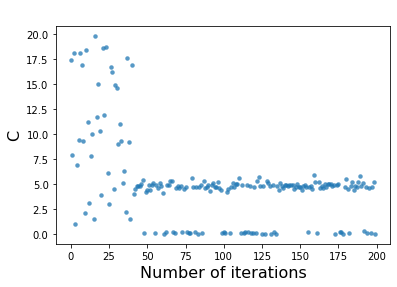

In [30]:
f, ax = plt.subplots(1)
xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['C'] for t in trials.trials]
ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title(' ', fontsize=18)
ax.set_xlabel('Number of iterations', fontsize=16)
ax.set_ylabel('C', fontsize=16)

In [ ]:
%%time
def hyperopt_train_test(params):
    X_ = X_train2[:]
    clf = LogisticRegression(**params)
    return cross_val_score(clf, X_, y_train2).mean()

space4lr = {
    'solver': hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear']),
    'penalty': hp.choice('penalty', ['none', 'l1', 'l2', 'elasticnet']),
    'C': hp.uniform('C', 0, 20),
    'multi_class': hp.choice('multi_class', ["auto", "ovr"]),
    'verbose': hp.choice('verbose', [0,1,2])
}

best2 = 0
def f(params):
    global best2
    acc = hyperopt_train_test(params)
    if acc > best2:
        best2 = acc
    print('new best:', best2, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials2 = Trials()
best2 = fmin(f, space4lr, algo=tpe.suggest, max_evals=200, trials=trials2)

In [ ]:
%%time
def hyperopt_train_test(params):
    X_ = X_train3[:]
    clf = LogisticRegression(**params)
    return cross_val_score(clf, X_, y_train3).mean()

space4lr = {
    'solver': hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear']),
    'penalty': hp.choice('penalty', ['none', 'l1', 'l2', 'elasticnet']),
    'C': hp.uniform('C', 0, 20),
    'multi_class': hp.choice('multi_class', ["auto", "ovr"]),
    'verbose': hp.choice('verbose', [0,1,2])
}

best3 = 0
def f(params):
    global best3
    acc = hyperopt_train_test(params)
    if acc > best3:
        best3 = acc
    print('new best:', best3, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials3 = Trials()
best3 = fmin(f, space4lr, algo=tpe.suggest, max_evals=200, trials=trials3)

In [ ]:
%%time
def hyperopt_train_test(params):
    X_ = X_train4[:]
    clf = LogisticRegression(**params)
    return cross_val_score(clf, X_, y_train4).mean()

space4lr = {
    'solver': hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear']),
    'penalty': hp.choice('penalty', ['none', 'l1', 'l2', 'elasticnet']),
    'C': hp.uniform('C', 0, 20),
    'multi_class': hp.choice('multi_class', ["auto", "ovr"]),
    'verbose': hp.choice('verbose', [0,1,2])
}

best4 = 0
def f(params):
    global best4
    acc = hyperopt_train_test(params)
    if acc > best4:
        best4 = acc
    print('new best:', best4, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials4 = Trials()
best4 = fmin(f, space4lr, algo=tpe.suggest, max_evals=200, trials=trials4)

In [ ]:
%%time
def hyperopt_train_test(params):
    X_ = X_train5[:]
    clf = LogisticRegression(**params)
    return cross_val_score(clf, X_, y_train5).mean()

space4lr = {
    'solver': hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear']),
    'penalty': hp.choice('penalty', ['none', 'l1', 'l2', 'elasticnet']),
    'C': hp.uniform('C', 0, 20),
    'multi_class': hp.choice('multi_class', ["auto", "ovr"]),
    'verbose': hp.choice('verbose', [0,1,2])
}

best5 = 0
def f(params):
    global best5
    acc = hyperopt_train_test(params)
    if acc > best5:
        best5 = acc
    print('new best:', best5, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials5 = Trials()
best5 = fmin(f, space4lr, algo=tpe.suggest, max_evals=200, trials=trials5)

In [ ]:
best

In [ ]:
best2

In [ ]:
best3

In [ ]:
best4

In [ ]:
best5

In [ ]:
lr_hyp = LogisticRegression(C = 4.893482308, multi_class = 'auto',
                            penalty = 'none', solver = 'newton-cg',
                            verbose = 2)
lr_hyp.fit(X_train, y_train)
lr_hyp_preds = lr_hyp.predict(X_test)
lr_hyp_probs = lr_hyp.predict_proba(X_test)
lr_hyp_tn, lr_hyp_fp, lr_hyp_fn, lr_hyp_tp = confusion_matrix(y_test, lr_hyp_preds).ravel()
lr_hyp_specificity = lr_hyp_tn / (lr_hyp_tn + lr_hyp_fp)
lr_hyp_sensitivity = lr_hyp_tp / (lr_hyp_tp + lr_hyp_fn)
lr_hyp_precision = lr_hyp_tp / (lr_hyp_tp + lr_hyp_fp)

# 2
lr_hyp2 = LogisticRegression(C = 3.7522592350882205, multi_class = 'ovr',
                             penalty = 'l2', solver = 'liblinear',
                            verbose = 0)
lr_hyp2.fit(X_train2, y_train2)
lr_hyp_preds2 = lr_hyp2.predict(X_test2)
lr_hyp_probs2 = lr_hyp2.predict_proba(X_test2)
lr_hyp_tn2, lr_hyp_fp2, lr_hyp_fn2, lr_hyp_tp2 = confusion_matrix(y_test2, lr_hyp_preds2).ravel()
lr_hyp_specificity2 = lr_hyp_tn2 / (lr_hyp_tn2 + lr_hyp_fp2)
lr_hyp_sensitivity2 = lr_hyp_tp2 / (lr_hyp_tp2 + lr_hyp_fn2)
lr_hyp_precision2 = lr_hyp_tp2 / (lr_hyp_tp2 + lr_hyp_fp2)

# 3
lr_hyp3 = LogisticRegression(C = 6.967983982938404, multi_class = 'auto',
                             penalty = 'l2', solver = 'liblinear',
                            verbose = 0)
lr_hyp3.fit(X_train3, y_train3)
lr_hyp_preds3 = lr_hyp3.predict(X_test3)
lr_hyp_probs3 = lr_hyp3.predict_proba(X_test3)
lr_hyp_tn3, lr_hyp_fp3, lr_hyp_fn3, lr_hyp_tp3 = confusion_matrix(y_test3, lr_hyp_preds3).ravel()
lr_hyp_specificity3 = lr_hyp_tn3 / (lr_hyp_tn3 + lr_hyp_fp3)
lr_hyp_sensitivity3 = lr_hyp_tp3 / (lr_hyp_tp3 + lr_hyp_fn3)
lr_hyp_precision3 = lr_hyp_tp3 / (lr_hyp_tp3 + lr_hyp_fp3)

# 4
lr_hyp4 = LogisticRegression(C = 14.655136404708685, multi_class = 'auto',
                             penalty = 'l2', solver = 'lbfgs',
                            verbose = 1)
lr_hyp4.fit(X_train4, y_train4)
lr_hyp_preds4 = lr_hyp4.predict(X_test4)
lr_hyp_probs4 = lr_hyp4.predict_proba(X_test4)
lr_hyp_tn4, lr_hyp_fp4, lr_hyp_fn4, lr_hyp_tp4 = confusion_matrix(y_test4, lr_hyp_preds4).ravel()
lr_hyp_specificity4 = lr_hyp_tn4 / (lr_hyp_tn4 + lr_hyp_fp4)
lr_hyp_sensitivity4 = lr_hyp_tp4 / (lr_hyp_tp4 + lr_hyp_fn4)
lr_hyp_precision4 = lr_hyp_tp4 / (lr_hyp_tp4 + lr_hyp_fp4)

# 5
lr_hyp5 = LogisticRegression(C = 19.13017177458366, multi_class = 'ovr',
                             penalty = 'l1',
                             solver = 'liblinear',
                            verbose = 0)
lr_hyp5.fit(X_train5, y_train5)
lr_hyp_preds5 = lr_hyp5.predict(X_test5)
lr_hyp_probs5 = lr_hyp5.predict_proba(X_test5)
lr_hyp_tn5, lr_hyp_fp5, lr_hyp_fn5, lr_hyp_tp5 = confusion_matrix(y_test5, lr_hyp_preds5).ravel()
lr_hyp_specificity5 = lr_hyp_tn5 / (lr_hyp_tn5 + lr_hyp_fp5)
lr_hyp_sensitivity5 = lr_hyp_tp5 / (lr_hyp_tp5 + lr_hyp_fn5)
lr_hyp_precision5 = lr_hyp_tp5 / (lr_hyp_tp5 + lr_hyp_fp5)

In [ ]:
print("FIT 1")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test, lr_hyp_preds),4))
print("AUC: ", round(roc_auc_score(y_test, lr_hyp_probs[:,1]),4))
print("Spec: ", round(lr_hyp_specificity,4))
print("Sens: ", round(lr_hyp_sensitivity,4))
print("Precision: ", round(lr_hyp_precision,4))
print(" ")

print("FIT 2")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test2, lr_hyp_preds2),4))
print("AUC: ", round(roc_auc_score(y_test2, lr_hyp_probs2[:,1]),4))
print("Spec: ", round(lr_hyp_specificity2,4))
print("Sens: ", round(lr_hyp_sensitivity2,4))
print("Precision: ", round(lr_hyp_precision2,4))
print(" ")

print("FIT 3")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test3, lr_hyp_preds3),4))
print("AUC: ", round(roc_auc_score(y_test3, lr_hyp_probs3[:,1]),4))
print("Spec: ", round(lr_hyp_specificity3,4))
print("Sens: ", round(lr_hyp_sensitivity3,4))
print("Precision: ", round(lr_hyp_precision3,4))
print(" ")


print("FIT 4")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test4, lr_hyp_preds4),4))
print("AUC :", round(roc_auc_score(y_test4, lr_hyp_probs4[:,1]),4))
print("Spec: ", round(lr_hyp_specificity4,4))
print("Sens: ", round(lr_hyp_sensitivity4,4))
print("Precision: ", round(lr_hyp_precision4,4))
print(" ")

print("FIT 5")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test5, lr_hyp_preds5),4))
print("AUC: ", round(roc_auc_score(y_test5, lr_hyp_probs5[:,1]),4))
print("Spec: ", round(lr_hyp_specificity5,4))
print("Sens: ", round(lr_hyp_sensitivity5,4))
print("Precision: ", round(lr_hyp_precision5,4))
print(" ")

# Random Forest

## Unparameterized

In [ ]:
%%time
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
rf_cv_results = cross_val_score(rf_model, X_train, y_train,
                        scoring = 'accuracy', cv = cv,
                        n_jobs = 1)

In [ ]:
%%time
rf_model2 = RandomForestClassifier()
rf_model2.fit(X_train2,y_train2)
rf_cv_results2 = cross_val_score(rf_model2, X_train2, y_train2,
                        scoring = 'accuracy', cv = cv,
                        n_jobs = 1)

In [ ]:
%%time
rf_model3 = RandomForestClassifier()
rf_model3.fit(X_train3,y_train3)
rf_cv_results3 = cross_val_score(rf_model3, X_train3, y_train3,
                        scoring = 'accuracy', cv = cv,
                        n_jobs = 1)

In [ ]:
%%time
rf_model4 = RandomForestClassifier()
rf_model4.fit(X_train4,y_train4)
rf_cv_results4 = cross_val_score(rf_model4, X_train4, y_train4,
                        scoring = 'accuracy', cv = cv,
                        n_jobs = 1)

In [ ]:
%%time
rf_model5 = RandomForestClassifier()
rf_model5.fit(X_train5,y_train5)
rf_cv_results5 = cross_val_score(rf_model5, X_train5, y_train5,
                        scoring = 'accuracy', cv = cv,
                        n_jobs = 1)

In [ ]:
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)
rf_tn, rf_fp, rf_fn, rf_tp = confusion_matrix(y_test, rf_preds).ravel()
rf_specificity = rf_tn / (rf_tn + rf_fp)
rf_sensitivity = rf_tp / (rf_tp + rf_fn)
rf_precision = rf_tp / (rf_tp + rf_fp)

rf_preds2 = rf_model2.predict(X_test2)
rf_probs2 = rf_model2.predict_proba(X_test2)
rf_tn2, rf_fp2, rf_fn2, rf_tp2 = confusion_matrix(y_test2, rf_preds2).ravel()
rf_specificity2 = rf_tn2 / (rf_tn2 + rf_fp2)
rf_sensitivity2 = rf_tp2 / (rf_tp2 + rf_fn2)
rf_precision2 = rf_tp2 / (rf_tp2 + rf_fp2)

rf_preds3 = rf_model3.predict(X_test3)
rf_probs3 = rf_model3.predict_proba(X_test3)
rf_tn3, rf_fp3, rf_fn3, rf_tp3 = confusion_matrix(y_test3, rf_preds3).ravel()
rf_specificity3 = rf_tn3 / (rf_tn3 + rf_fp3)
rf_sensitivity3 = rf_tp3 / (rf_tp3 + rf_fn3)
rf_precision3 = rf_tp3 / (rf_tp3 + rf_fp3)

rf_preds4 = rf_model4.predict(X_test4)
rf_probs4 = rf_model4.predict_proba(X_test4)
rf_tn4, rf_fp4, rf_fn4, rf_tp4 = confusion_matrix(y_test4, rf_preds4).ravel()
rf_specificity4 = rf_tn4 / (rf_tn4 + rf_fp4)
rf_sensitivity4 = rf_tp4 / (rf_tp4 + rf_fn4)
rf_precision4 = rf_tp4 / (rf_tp4 + rf_fp4)

rf_preds5 = rf_model5.predict(X_test5)
rf_probs5 = rf_model5.predict_proba(X_test5)
rf_tn5, rf_fp5, rf_fn5, rf_tp5 = confusion_matrix(y_test5, rf_preds5).ravel()
rf_specificity5 = rf_tn5 / (rf_tn5 + rf_fp5)
rf_sensitivity5 = rf_tp5 / (rf_tp5 + rf_fn5)
rf_precision5 = rf_tp5 / (rf_tp5 + rf_fp5)

In [ ]:
print("FIT 1")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test, rf_preds),4))
print("AUC: ", round(roc_auc_score(y_test, rf_probs[:,1]),4))
print("Spec: ", round(rf_specificity,4))
print("Sens: ", round(rf_sensitivity,4))
print("Precision: ", round(rf_precision,4))
print(" ")

print("FIT 2")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test2, rf_preds2),4))
print("AUC: ", round(roc_auc_score(y_test2, rf_probs2[:,1]),4))
print("Spec: ", round(rf_specificity2,4))
print("Sens: ", round(rf_sensitivity2,4))
print("Precision: ", round(rf_precision2,4))
print(" ")

print("FIT 3")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test3, rf_preds3),4))
print("AUC: ", round(roc_auc_score(y_test3, rf_probs3[:,1]),4))
print("Spec: ", round(rf_specificity3,4))
print("Sens: ", round(rf_sensitivity3,4))
print("Precision: ", round(rf_precision3,4))
print(" ")


print("FIT 4")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test4, rf_preds4),4))
print("AUC :", round(roc_auc_score(y_test4, rf_probs4[:,1]),4))
print("Spec: ", round(rf_specificity4,4))
print("Sens: ", round(rf_sensitivity4,4))
print("Precision: ", round(rf_precision4,4))
print(" ")

print("FIT 5")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test5, rf_preds5),4))
print("AUC: ", round(roc_auc_score(y_test5, rf_probs5[:,1]),4))
print("Spec: ", round(rf_specificity5,4))
print("Sens: ", round(rf_sensitivity5,4))
print("Precision: ", round(rf_precision5,4))
print(" ")

## Random Search

In [ ]:
# space
rf_space = dict()
rf_space['max_depth'] = [1,2,3,4,5,6,7,8,9,10,
                         11,12,13,14,15,16,17,18,19,20]
rf_space['max_features'] = [1,2,3,4,5]
rf_space['n_estimators'] = [1,2,3,4,5,6,7,8,9,10,
                         11,12,13,14,15,16,17,18,19,20]
rf_space['criterion'] = ['gini', 'entropy']

In [ ]:
%%time
# set up k fold cross validation 
rf_model = RandomForestClassifier()

# define random search domain
rf_rand_model = RandomizedSearchCV(rf_model, rf_space, n_iter=200,
                            scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
rf_rand_model = rf_rand_model.fit(X_train, y_train)

In [ ]:
%%time
# set up k fold cross validation 
rf_model2 = RandomForestClassifier()

# define random search domain
rf_rand_model2 = RandomizedSearchCV(rf_model2, rf_space, n_iter=200,
                            scoring='accuracy', n_jobs=-1, cv=cv, random_state=21)
rf_rand_model2 = rf_rand_model2.fit(X_train2, y_train2)

In [ ]:
%%time
# set up k fold cross validation 
rf_model3 = RandomForestClassifier()

# define random search domain
rf_rand_model3 = RandomizedSearchCV(rf_model3, rf_space, n_iter=200,
                            scoring='accuracy', n_jobs=-1, cv=cv, random_state=18)
rf_rand_model3 = rf_rand_model3.fit(X_train3, y_train3)

In [ ]:
%%time
# set up k fold cross validation 
rf_model4 = RandomForestClassifier()

# define random search domain
rf_rand_model4 = RandomizedSearchCV(rf_model4, rf_space, n_iter=200,
                            scoring='accuracy', n_jobs=-1, cv=cv, random_state=21)
rf_rand_model4 = rf_rand_model4.fit(X_train4, y_train4)

In [ ]:
%%time
# set up k fold cross validation 
rf_model5 = RandomForestClassifier()

# define random search domain
rf_rand_model5 = RandomizedSearchCV(rf_model5, rf_space, n_iter=200,
                            scoring='accuracy', n_jobs=-1, cv=cv, random_state=21)
rf_search_model5 = rf_rand_model5.fit(X_train5, y_train5)

In [ ]:
rf_rand_preds = rf_rand_model.predict(X_test)
rf_rand_probs = rf_rand_model.predict_proba(X_test)
rf_rand_tn, rf_rand_fp, rf_rand_fn, rf_rand_tp = confusion_matrix(y_test, rf_rand_preds).ravel()
rf_rand_specificity = rf_rand_tn / (rf_rand_tn + rf_rand_fp)
rf_rand_sensitivity = rf_rand_tp / (rf_rand_tp + rf_rand_fn)
rf_rand_precision = rf_rand_tp / (rf_rand_tp + rf_rand_fp)

rf_rand_preds2 = rf_rand_model2.predict(X_test2)
rf_rand_probs2 = rf_rand_model2.predict_proba(X_test2)
rf_rand_tn2, rf_rand_fp2, rf_rand_fn2, rf_rand_tp2 = confusion_matrix(y_test2, rf_rand_preds2).ravel()
rf_rand_specificity2 = rf_rand_tn2 / (rf_rand_tn2 + rf_rand_fp2)
rf_rand_sensitivity2 = rf_rand_tp2 / (rf_rand_tp2 + rf_rand_fn2)
rf_rand_precision2 = rf_rand_tp2 / (rf_rand_tp2 + rf_rand_fp2)

rf_rand_preds3 = rf_rand_model3.predict(X_test3)
rf_rand_probs3 = rf_rand_model3.predict_proba(X_test3)
rf_rand_tn3, rf_rand_fp3, rf_rand_fn3, rf_rand_tp3 = confusion_matrix(y_test3, rf_rand_preds3).ravel()
rf_rand_specificity3 = rf_rand_tn3 / (rf_rand_tn3 + rf_rand_fp3)
rf_rand_sensitivity3 = rf_rand_tp3 / (rf_rand_tp3 + rf_rand_fn3)
rf_rand_precision3 = rf_rand_tp3 / (rf_rand_tp3 + rf_rand_fp3)

rf_rand_preds4 = rf_rand_model4.predict(X_test4)
rf_rand_probs4 = rf_rand_model4.predict_proba(X_test4)
rf_rand_tn4, rf_rand_fp4, rf_rand_fn4, rf_rand_tp4 = confusion_matrix(y_test4, rf_rand_preds4).ravel()
rf_rand_specificity4 = rf_rand_tn4 / (rf_rand_tn4 + rf_rand_fp4)
rf_rand_sensitivity4 = rf_rand_tp4 / (rf_rand_tp4 + rf_rand_fn4)
rf_rand_precision4 = rf_rand_tp4 / (rf_rand_tp4 + rf_rand_fp4)

rf_rand_preds5 = rf_rand_model5.predict(X_test5)
rf_rand_probs5 = rf_rand_model5.predict_proba(X_test5)
rf_rand_tn5, rf_rand_fp5, rf_rand_fn5, rf_rand_tp5 = confusion_matrix(y_test5, rf_rand_preds5).ravel()
rf_rand_specificity5 = rf_rand_tn5 / (rf_rand_tn5 + rf_rand_fp5)
rf_rand_sensitivity5 = rf_rand_tp5 / (rf_rand_tp5 + rf_rand_fn5)
rf_rand_precision5 = rf_rand_tp5 / (rf_rand_tp5 + rf_rand_fp5)

In [ ]:
print("FIT 1")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test, rf_rand_preds),4))
print("AUC: ", round(roc_auc_score(y_test, rf_rand_probs[:,1]),4))
print("Spec: ", round(rf_rand_specificity,4))
print("Sens: ", round(rf_rand_sensitivity,4))
print("Precision: ", round(rf_rand_precision,4))
print(" ")

print("FIT 2")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test2, rf_rand_preds2),4))
print("AUC: ", round(roc_auc_score(y_test2, rf_rand_probs2[:,1]),4))
print("Spec: ", round(rf_rand_specificity2,4))
print("Sens: ", round(rf_rand_sensitivity2,4))
print("Precision: ", round(rf_rand_precision2,4))
print(" ")

print("FIT 3")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test3, rf_rand_preds3),4))
print("AUC: ", round(roc_auc_score(y_test3, rf_rand_probs3[:,1]),4))
print("Spec: ", round(rf_rand_specificity3,4))
print("Sens: ", round(rf_rand_sensitivity3,4))
print("Precision: ", round(rf_rand_precision3,4))
print(" ")


print("FIT 4")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test4, rf_rand_preds4),4))
print("AUC :", round(roc_auc_score(y_test4, rf_rand_probs4[:,1]),4))
print("Spec: ", round(rf_rand_specificity4,4))
print("Sens: ", round(rf_rand_sensitivity4,4))
print("Precision: ", round(rf_rand_precision4,4))
print(" ")

print("FIT 5")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test5, rf_rand_preds5),4))
print("AUC: ", round(roc_auc_score(y_test5, rf_rand_probs5[:,1]),4))
print("Spec: ", round(rf_rand_specificity5,4))
print("Sens: ", round(rf_rand_sensitivity5,4))
print("Precision: ", round(rf_rand_precision5,4))
print(" ")

## Hyperopt

In [21]:
%%time
def hyperopt_train_test(params):
    X_ = X_train[:]
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X_, y_train, cv = cv).mean()

space4rf = {
    'max_depth': hp.choice('max_depth', [1,2,3,4,5,6,7,8,9,10,11,12,13,14,
                                         15,16,17,18,19,20]),
    'max_features': hp.choice('max_features', [1,2,3,4,5]),
    'n_estimators': hp.choice('n_estimators', [1,2,3,4,5,6,7,8,9,10,11,12,13,14,
                                         15,16,17,18,19,20]),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
}

best = 0
def f(params):
    global best
    acc = hyperopt_train_test(params)
    if acc > best:
        best = acc
    print('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4rf, algo=tpe.suggest, max_evals=200, trials=trials)

new best:                                                                       
0.5822402597402597                                                              
{'criterion': 'gini', 'max_depth': 18, 'max_features': 3, 'n_estimators': 3}    
new best:                                                                       
0.5876623376623377                                                              
{'criterion': 'gini', 'max_depth': 19, 'max_features': 2, 'n_estimators': 10}   
new best:                                                                       
0.5949025974025972                                                              
{'criterion': 'entropy', 'max_depth': 14, 'max_features': 3, 'n_estimators': 9} 
new best:                                                                       
0.6002922077922077                                                              
{'criterion': 'gini', 'max_depth': 13, 'max_features': 3, 'n_estimators': 9}    
new best:                   

{'criterion': 'gini', 'max_depth': 14, 'max_features': 2, 'n_estimators': 13}   
new best:                                                                       
0.6438311688311689                                                              
{'criterion': 'gini', 'max_depth': 4, 'max_features': 1, 'n_estimators': 18}    
new best:                                                                       
0.6438311688311689                                                              
{'criterion': 'gini', 'max_depth': 17, 'max_features': 5, 'n_estimators': 13}   
new best:                                                                       
0.6438311688311689                                                              
{'criterion': 'gini', 'max_depth': 15, 'max_features': 3, 'n_estimators': 8}    
new best:                                                                       
0.6438311688311689                                                              
{'criterion': 'gini', 'max_d

0.6438311688311689                                                              
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 3, 'n_estimators': 13} 
new best:                                                                       
0.6438311688311689                                                              
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 3, 'n_estimators': 13} 
new best:                                                                       
0.6438311688311689                                                              
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 3, 'n_estimators': 9}  
new best:                                                                       
0.6438311688311689                                                              
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 3, 'n_estimators': 17}
new best:                                                                       
0.6438311688311689          

new best:                                                                       
0.6438311688311689                                                              
{'criterion': 'gini', 'max_depth': 14, 'max_features': 3, 'n_estimators': 3}    
new best:                                                                       
0.6438311688311689                                                              
{'criterion': 'entropy', 'max_depth': 17, 'max_features': 4, 'n_estimators': 10}
new best:                                                                       
0.6438311688311689                                                              
{'criterion': 'gini', 'max_depth': 9, 'max_features': 2, 'n_estimators': 8}     
new best:                                                                       
0.6438311688311689                                                              
{'criterion': 'gini', 'max_depth': 15, 'max_features': 5, 'n_estimators': 2}    
new best:                   

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 5, 'n_estimators': 1} 
new best:                                                                       
0.6511363636363636                                                              
{'criterion': 'gini', 'max_depth': 11, 'max_features': 2, 'n_estimators': 4}    
new best:                                                                       
0.6511363636363636                                                              
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 4, 'n_estimators': 16}
new best:                                                                       
0.6511363636363636                                                              
{'criterion': 'gini', 'max_depth': 17, 'max_features': 2, 'n_estimators': 11}   
new best:                                                                       
0.6511363636363636                                                              
{'criterion': 'gini', 'max_d

KeyboardInterrupt: 

In [ ]:
%%time
def hyperopt_train_test(params):
    X_ = X_train2[:]
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X_, y_train2, cv = cv).mean()

space4rf = {
    'max_depth': hp.choice('max_depth', [1,2,3,4,5,6,7,8,9,10,11,12,13,14,
                                         15,16,17,18,19,20]),
    'max_features': hp.choice('max_features', [1,2,3,4,5]),
    'n_estimators': hp.choice('n_estimators', [1,2,3,4,5,6,7,8,9,10,11,12,13,14,
                                         15,16,17,18,19,20]),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
}

best2 = 0
def f(params):
    global best2
    acc = hyperopt_train_test(params)
    if acc > best2:
        best2 = acc
    print('new best:', best2, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials2 = Trials()
best2 = fmin(f, space4rf, algo=tpe.suggest, max_evals=200, trials=trials2)

In [ ]:
%%time
def hyperopt_train_test(params):
    X_ = X_train3[:]
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X_, y_train3, cv = cv).mean()

space4rf = {
    'max_depth': hp.choice('max_depth', [1,2,3,4,5,6,7,8,9,10,11,12,13,14,
                                         15,16,17,18,19,20]),
    'max_features': hp.choice('max_features', [1,2,3,4,5]),
    'n_estimators': hp.choice('n_estimators', [1,2,3,4,5,6,7,8,9,10,11,12,13,14,
                                         15,16,17,18,19,20]),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
}

best3 = 0
def f(params):
    global best3
    acc = hyperopt_train_test(params)
    if acc > best3:
        best3 = acc
    print('new best:', best3, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials3 = Trials()
best3 = fmin(f, space4rf, algo=tpe.suggest, max_evals=200, trials=trials3)

In [ ]:
%%time
def hyperopt_train_test(params):
    X_ = X_train4[:]
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X_, y_train4, cv = cv).mean()

space4rf = {
    'max_depth': hp.choice('max_depth', [1,2,3,4,5,6,7,8,9,10,11,12,13,14,
                                         15,16,17,18,19,20]),
    'max_features': hp.choice('max_features', [1,2,3,4,5]),
    'n_estimators': hp.choice('n_estimators', [1,2,3,4,5,6,7,8,9,10,11,12,13,14,
                                         15,16,17,18,19,20]),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
}

best4 = 0
def f(params):
    global best4
    acc = hyperopt_train_test(params)
    if acc > best4:
        best4 = acc
    print('new best:', best4, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials4 = Trials()
best4 = fmin(f, space4rf, algo=tpe.suggest, max_evals=200, trials=trials4)

In [ ]:
%%time
def hyperopt_train_test(params):
    X_ = X_train5[:]
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X_, y_train5, cv = cv).mean()

space4rf = {
    'max_depth': hp.choice('max_depth', [1,2,3,4,5,6,7,8,9,10,11,12,13,14,
                                         15,16,17,18,19,20]),
    'max_features': hp.choice('max_features', [1,2,3,4,5]),
    'n_estimators': hp.choice('n_estimators', [1,2,3,4,5,6,7,8,9,10,11,12,13,14,
                                         15,16,17,18,19,20]),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
}

best5 = 0
def f(params):
    global best5
    acc = hyperopt_train_test(params)
    if acc > best5:
        best5 = acc
    print('new best:', best5, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials5 = Trials()
best5 = fmin(f, space4rf, algo=tpe.suggest, max_evals=200, trials=trials5)

In [ ]:
best

In [ ]:
best2

In [ ]:
best3

In [ ]:
best4

In [ ]:
best5

In [ ]:
rf_hyp = RandomForestClassifier(criterion = 'entropy', max_depth = 3,
                                max_features = 4, n_estimators = 19)
rf_hyp.fit(X_train, y_train)
rf_hyp_preds = rf_hyp.predict(X_test)
rf_hyp_probs = rf_hyp.predict_proba(X_test)
rf_hyp_tn, rf_hyp_fp, rf_hyp_fn, rf_hyp_tp = confusion_matrix(y_test, rf_hyp_preds).ravel()
rf_hyp_specificity = rf_hyp_tn / (rf_hyp_tn + rf_hyp_fp)
rf_hyp_sensitivity = rf_hyp_tp / (rf_hyp_tp + rf_hyp_fn)
rf_hyp_precision = rf_hyp_tp / (rf_hyp_tp + rf_hyp_fp)

rf_hyp2 = RandomForestClassifier(criterion = 'entropy', max_depth = 4,
                                 max_features = 3, n_estimators = 19)
rf_hyp2.fit(X_train2, y_train2)
rf_hyp_preds2 = rf_hyp2.predict(X_test2)
rf_hyp_probs2 = rf_hyp2.predict_proba(X_test2)
rf_hyp_tn2, rf_hyp_fp2, rf_hyp_fn2, rf_hyp_tp2 = confusion_matrix(y_test2, rf_hyp_preds2).ravel()
rf_hyp_specificity2 = rf_hyp_tn2 / (rf_hyp_tn2 + rf_hyp_fp2)
rf_hyp_sensitivity2 = rf_hyp_tp2 / (rf_hyp_tp2 + rf_hyp_fn2)
rf_hyp_precision2 = rf_hyp_tp2 / (rf_hyp_tp2 + rf_hyp_fp2)

rf_hyp3 = RandomForestClassifier(criterion = 'gini', max_depth = 5,
                                 max_features = 3, n_estimators = 16)
rf_hyp3.fit(X_train3, y_train3)
rf_hyp_preds3 = rf_hyp3.predict(X_test3)
rf_hyp_probs3 = rf_hyp3.predict_proba(X_test3)
rf_hyp_tn3, rf_hyp_fp3, rf_hyp_fn3, rf_hyp_tp3 = confusion_matrix(y_test3, rf_hyp_preds3).ravel()
rf_hyp_specificity3 = rf_hyp_tn3 / (rf_hyp_tn3 + rf_hyp_fp3)
rf_hyp_sensitivity3 = rf_hyp_tp3 / (rf_hyp_tp3 + rf_hyp_fn3)
rf_hyp_precision3 = rf_hyp_tp3 / (rf_hyp_tp3 + rf_hyp_fp3)

rf_hyp4 = RandomForestClassifier(criterion = 'gini', max_depth = 2,
                                 max_features = 4, n_estimators = 19)
rf_hyp4.fit(X_train4, y_train4)
rf_hyp_preds4 = rf_hyp4.predict(X_test4)
rf_hyp_probs4 = rf_hyp4.predict_proba(X_test4)
rf_hyp_tn4, rf_hyp_fp4, rf_hyp_fn4, rf_hyp_tp4 = confusion_matrix(y_test4, rf_hyp_preds4).ravel()
rf_hyp_specificity4 = rf_hyp_tn4 / (rf_hyp_tn4 + rf_hyp_fp4)
rf_hyp_sensitivity4 = rf_hyp_tp4 / (rf_hyp_tp4 + rf_hyp_fn4)
rf_hyp_precision4 = rf_hyp_tp4 / (rf_hyp_tp4 + rf_hyp_fp4)

rf_hyp5 = RandomForestClassifier(criterion = 'entropy', max_depth = 4,
                                 max_features = 4, n_estimators = 16)
rf_hyp5.fit(X_train5, y_train5)
rf_hyp_preds5 = rf_hyp5.predict(X_test5)
rf_hyp_probs5 = rf_hyp5.predict_proba(X_test5)
rf_hyp_tn5, rf_hyp_fp5, rf_hyp_fn5, rf_hyp_tp5 = confusion_matrix(y_test5, rf_hyp_preds5).ravel()
rf_hyp_specificity5 = rf_hyp_tn5 / (rf_hyp_tn5 + rf_hyp_fp5)
rf_hyp_sensitivity5 = rf_hyp_tp5 / (rf_hyp_tp5 + rf_hyp_fn5)
rf_hyp_precision5 = rf_hyp_tp5 / (rf_hyp_tp5 + rf_hyp_fp5)

In [ ]:
print("FIT 1")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test, rf_hyp_preds),4))
print("AUC: ", round(roc_auc_score(y_test, rf_hyp_probs[:,1]),4))
print("Spec: ", round(rf_hyp_specificity,4))
print("Sens: ", round(rf_hyp_sensitivity,4))
print("Precision: ", round(rf_hyp_precision,4))
print(" ")

print("FIT 2")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test2, rf_hyp_preds2),4))
print("AUC: ", round(roc_auc_score(y_test2, rf_hyp_probs2[:,1]),4))
print("Spec: ", round(rf_hyp_specificity2,4))
print("Sens: ", round(rf_hyp_sensitivity2,4))
print("Precision: ", round(rf_hyp_precision2,4))
print(" ")

print("FIT 3")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test3, rf_hyp_preds3),4))
print("AUC: ", round(roc_auc_score(y_test3, rf_hyp_probs3[:,1]),4))
print("Spec: ", round(rf_hyp_specificity3,4))
print("Sens: ", round(rf_hyp_sensitivity3,4))
print("Precision: ", round(rf_hyp_precision3,4))
print(" ")


print("FIT 4")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test4, rf_hyp_preds4),4))
print("AUC :", round(roc_auc_score(y_test4, rf_hyp_probs4[:,1]),4))
print("Spec: ", round(rf_hyp_specificity4,4))
print("Sens: ", round(rf_hyp_sensitivity4,4))
print("Precision: ", round(rf_hyp_precision4,4))
print(" ")

print("FIT 5")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test5, rf_hyp_preds5),4))
print("AUC: ", round(roc_auc_score(y_test5, rf_hyp_probs5[:,1]),4))
print("Spec: ", round(rf_hyp_specificity5,4))
print("Sens: ", round(rf_hyp_sensitivity5,4))
print("Precision: ", round(rf_hyp_precision5,4))
print(" ")

# SVC

## Unparameterized

In [ ]:
%%time
svm_model = SVC(probability = True)
svm_model.fit(scale_X_train,y_train)
svm_cv_results = cross_val_score(svm_model, scale_X_train, y_train,
                        scoring = 'accuracy', cv = cv,
                        n_jobs = 1)

In [ ]:
%%time
svm_model2 = SVC(probability = True)
svm_model2.fit(scale_X_train2,y_train2)
svm_cv_results2 = cross_val_score(svm_model2, scale_X_train2, y_train2,
                        scoring = 'accuracy', cv = cv,
                        n_jobs = 1)

In [ ]:
%%time
svm_model3 = SVC(probability = True)
svm_model3.fit(scale_X_train3,y_train3)
svm_cv_results3 = cross_val_score(svm_model3, scale_X_train3, y_train3,
                        scoring = 'accuracy', cv = cv,
                        n_jobs = 1)

In [ ]:
%%time
svm_model4 = SVC(probability = True)
svm_model4.fit(scale_X_train4,y_train4)
svm_cv_results4 = cross_val_score(svm_model4, scale_X_train4, y_train4,
                        scoring = 'accuracy', cv = cv,
                        n_jobs = 1)

In [ ]:
%%time
svm_model5 = SVC(probability = True)
svm_model5.fit(scale_X_train5,y_train5)
svm_cv_results5 = cross_val_score(svm_model5, scale_X_train5, y_train5,
                        scoring = 'accuracy', cv = cv,
                        n_jobs = 1)

In [ ]:
svc_preds = svm_model.predict(scale_X_test)
svc_probs = svm_model.predict_proba(scale_X_test)
svc_tn, svc_fp, svc_fn, svc_tp = confusion_matrix(y_test, svc_preds).ravel()
svc_specificity = svc_tn / (svc_tn + svc_fp)
svc_sensitivity = svc_tp / (svc_tp + svc_fn)
svc_precision = svc_tp / (svc_tp + svc_fp)

svc_preds2 = svm_model2.predict(scale_X_test2)
svc_probs2 = svm_model2.predict_proba(scale_X_test2)
svc_tn2, svc_fp2, svc_fn2, svc_tp2 = confusion_matrix(y_test2, svc_preds2).ravel()
svc_specificity2 = svc_tn2 / (svc_tn2 + svc_fp2)
svc_sensitivity2 = svc_tp2 / (svc_tp2 + svc_fn2)
svc_precision2 = svc_tp2 / (svc_tp2 + svc_fp)

svc_preds3 = svm_model3.predict(scale_X_test3)
svc_probs3 = svm_model3.predict_proba(scale_X_test3)
svc_tn3, svc_fp3, svc_fn3, svc_tp3 = confusion_matrix(y_test3, svc_preds3).ravel()
svc_specificity3 = svc_tn3 / (svc_tn3 + svc_fp3)
svc_sensitivity3 = svc_tp3 / (svc_tp3 + svc_fn3)
svc_precision3 = svc_tp3 / (svc_tp3 + svc_fp3)

svc_preds4 = svm_model4.predict(scale_X_test4)
svc_probs4 = svm_model4.predict_proba(scale_X_test4)
svc_tn4, svc_fp4, svc_fn4, svc_tp4 = confusion_matrix(y_test4, svc_preds4).ravel()
svc_specificity4 = svc_tn4 / (svc_tn4 + svc_fp4)
svc_sensitivity4 = svc_tp4 / (svc_tp4 + svc_fn4)
svc_precision4 = svc_tp4 / (svc_tp4 + svc_fp4)

svc_preds5 = svm_model5.predict(scale_X_test5)
svc_probs5 = svm_model5.predict_proba(scale_X_test5)
svc_tn5, svc_fp5, svc_fn5, svc_tp5 = confusion_matrix(y_test5, svc_preds5).ravel()
svc_specificity5 = svc_tn5 / (svc_tn5 + svc_fp5)
svc_sensitivity5 = svc_tp5 / (svc_tp5 + svc_fn5)
svc_precision5 = svc_tp5 / (svc_tp5 + svc_fp5)

In [ ]:
print("FIT 1")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test, svc_preds),4))
print("AUC: ", round(roc_auc_score(y_test, svc_probs[:,1]),4))
print("Spec: ", round(svc_specificity,4))
print("Sens: ", round(svc_sensitivity,4))
print("Precision: ", round(svc_precision,4))
print(" ")

print("FIT 2")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test2, svc_preds2),4))
print("AUC: ", round(roc_auc_score(y_test2, svc_probs2[:,1]),4))
print("Spec: ", round(svc_specificity2,4))
print("Sens: ", round(svc_sensitivity2,4))
print("Precision: ", round(svc_precision2,4))
print(" ")

print("FIT 3")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test3, svc_preds3),4))
print("AUC: ", round(roc_auc_score(y_test3, svc_probs3[:,1]),4))
print("Spec: ", round(svc_specificity3,4))
print("Sens: ", round(svc_sensitivity3,4))
print("Precision: ", round(svc_precision3,4))
print(" ")


print("FIT 4")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test4, svc_preds4),4))
print("AUC :", round(roc_auc_score(y_test4, svc_probs4[:,1]),4))
print("Spec: ", round(svc_specificity4,4))
print("Sens: ", round(svc_sensitivity4,4))
print("Precision: ", round(svc_precision4,4))
print(" ")

print("FIT 5")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test5, svc_preds5),4))
print("AUC: ", round(roc_auc_score(y_test5, svc_probs5[:,1]),4))
print("Spec: ", round(svc_specificity5,4))
print("Sens: ", round(svc_sensitivity5,4))
print("Precision: ", round(svc_precision5,4))
print(" ")

## Random Search

In [109]:
# define hyperparameters to search for
svc_space = dict()
svc_space['C'] = loguniform(1e-5, 100)
svc_space['degree'] = [1,2,3]
svc_space['gamma'] = ['auto', 'scale']
svc_space['kernel'] = ['linear', 'rbf']

In [110]:
%%time
#define models
svc_model = SVC(probability = True)
svc_rand_model = RandomizedSearchCV(svc_model, svc_space, n_iter=100,
                            scoring='accuracy', cv = cv)

svc_rand_model = svc_rand_model.fit(scale_X_train, y_train)

CPU times: user 54min 32s, sys: 3.14 s, total: 54min 35s
Wall time: 55min 6s


In [111]:
%%time
#define models
svc_model2 = SVC(probability = True)
svc_rand_model2 = RandomizedSearchCV(svc_model2, svc_space, n_iter=100,
                            scoring='accuracy', cv = cv)

svc_rand_model2 = svc_rand_model2.fit(scale_X_train2, y_train2)

CPU times: user 1h 3min 6s, sys: 3.54 s, total: 1h 3min 10s
Wall time: 1h 3min 39s


In [112]:
%%time
#define models
svc_model3 = SVC(probability = True)
svc_rand_model3 = RandomizedSearchCV(svc_model3, svc_space, n_iter=100,
                            scoring='accuracy', cv = cv)

svc_rand_model3 = svc_rand_model3.fit(scale_X_train3, y_train3)

CPU times: user 56min 23s, sys: 3.13 s, total: 56min 26s
Wall time: 56min 52s


In [113]:
%%time
#define models
svc_model4 = SVC(probability = True)
svc_rand_model4 = RandomizedSearchCV(svc_model4, svc_space, n_iter=100,
                            scoring='accuracy', cv = cv)

svc_rand_model4 = svc_rand_model4.fit(scale_X_train4, y_train4)

CPU times: user 50min 26s, sys: 2.85 s, total: 50min 28s
Wall time: 50min 53s


In [114]:
%%time
#define models
svc_model5 = SVC(probability = True)
svc_rand_model5 = RandomizedSearchCV(svc_model5, svc_space, n_iter=100,
                            scoring='accuracy', cv = cv)

svc_rand_model5 = svc_rand_model5.fit(scale_X_train5, y_train5)

CPU times: user 43min 41s, sys: 2.81 s, total: 43min 44s
Wall time: 44min 32s


In [115]:
svc_rand_preds = svc_rand_model.predict(X_test)
svc_rand_probs = svc_rand_model.predict_proba(X_test)
svc_rand_tn, svc_rand_fp, svc_rand_fn, svc_rand_tp = confusion_matrix(y_test, svc_rand_preds).ravel()
svc_rand_specificity = svc_rand_tn / (svc_rand_tn + svc_rand_fp)
svc_rand_sensitivity = svc_rand_tp / (svc_rand_tp + svc_rand_fn)
svc_rand_precision = svc_rand_tp / (svc_rand_tp + svc_rand_fp)

svc_rand_preds2 = svc_rand_model2.predict(X_test2)
svc_rand_probs2 = svc_rand_model2.predict_proba(X_test2)
svc_rand_tn2, svc_rand_fp2, svc_rand_fn2, svc_rand_tp2 = confusion_matrix(y_test2, svc_rand_preds2).ravel()
svc_rand_specificity2 = svc_rand_tn2 / (svc_rand_tn2 + svc_rand_fp2)
svc_rand_sensitivity2 = svc_rand_tp2 / (svc_rand_tp2 + svc_rand_fn2)
svc_rand_precision2 = svc_rand_tp2 / (svc_rand_tp2 + svc_rand_fp2)

svc_rand_preds3 = svc_rand_model3.predict(X_test3)
svc_rand_probs3 = svc_rand_model3.predict_proba(X_test3)
svc_rand_tn3, svc_rand_fp3, svc_rand_fn3, svc_rand_tp3 = confusion_matrix(y_test3, svc_rand_preds3).ravel()
svc_rand_specificity3 = svc_rand_tn3 / (svc_rand_tn3 + svc_rand_fp3)
svc_rand_sensitivity3 = svc_rand_tp3 / (svc_rand_tp3 + svc_rand_fn3)
svc_rand_precision3 = svc_rand_tp3 / (svc_rand_tp3 + svc_rand_fp3)

svc_rand_preds4 = svc_rand_model4.predict(X_test4)
svc_rand_probs4 = svc_rand_model4.predict_proba(X_test4)
svc_rand_tn4, svc_rand_fp4, svc_rand_fn4, svc_rand_tp4 = confusion_matrix(y_test4, svc_rand_preds4).ravel()
svc_rand_specificity4 = svc_rand_tn4 / (svc_rand_tn4 + svc_rand_fp4)
svc_rand_sensitivity4 = svc_rand_tp4 / (svc_rand_tp4 + svc_rand_fn4)
svc_rand_precision4 = svc_rand_tp4 / (svc_rand_tp4 + svc_rand_fp4)

svc_rand_preds5 = svc_rand_model5.predict(X_test5)
svc_rand_probs5 = svc_rand_model5.predict_proba(X_test5)
svc_rand_tn5, svc_rand_fp5, svc_rand_fn5, svc_rand_tp5 = confusion_matrix(y_test5, svc_rand_preds5).ravel()
svc_rand_specificity5 = svc_rand_tn5 / (svc_rand_tn5 + svc_rand_fp5)
svc_rand_sensitivity5 = svc_rand_tp5 / (svc_rand_tp5 + svc_rand_fn5)
svc_rand_precision5 = svc_rand_tp5 / (svc_rand_tp5 + svc_rand_fp5)

In [116]:
print("FIT 1")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test, svc_rand_preds),4))
print("AUC: ", round(roc_auc_score(y_test, svc_rand_probs[:,1]),4))
print("Spec: ", round(svc_rand_specificity,4))
print("Sens: ", round(svc_rand_sensitivity,4))
print("Precision: ", round(svc_rand_precision,4))
print(" ")

print("FIT 2")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test2, svc_rand_preds2),4))
print("AUC: ", round(roc_auc_score(y_test2, svc_rand_probs2[:,1]),4))
print("Spec: ", round(svc_rand_specificity2,4))
print("Sens: ", round(svc_rand_sensitivity2,4))
print("Precision: ", round(svc_rand_precision2,4))
print(" ")

print("FIT 3")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test3, svc_rand_preds3),4))
print("AUC: ", round(roc_auc_score(y_test3, svc_rand_probs3[:,1]),4))
print("Spec: ", round(svc_rand_specificity3,4))
print("Sens: ", round(svc_rand_sensitivity3,4))
print("Precision: ", round(svc_rand_precision3,4))
print(" ")


print("FIT 4")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test4, svc_rand_preds4),4))
print("AUC :", round(roc_auc_score(y_test4, svc_rand_probs4[:,1]),4))
print("Spec: ", round(svc_rand_specificity4,4))
print("Sens: ", round(svc_rand_sensitivity4,4))
print("Precision: ", round(svc_rand_precision4,4))
print(" ")

print("FIT 5")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test5, svc_rand_preds5),4))
print("AUC: ", round(roc_auc_score(y_test5, svc_rand_probs5[:,1]),4))
print("Spec: ", round(svc_rand_specificity5,4))
print("Sens: ", round(svc_rand_sensitivity5,4))
print("Precision: ", round(svc_rand_precision5,4))
print(" ")

FIT 1
Unparameterized
Test Accuracy:  0.6486
AUC:  0.6888
Spec:  0.3101
Sens:  0.9009
Precision:  0.6367
 
FIT 2
Unparameterized
Test Accuracy:  0.6459
AUC:  0.6795
Spec:  0.4051
Sens:  0.8255
Precision:  0.6506
 
FIT 3
Unparameterized
Test Accuracy:  0.6243
AUC:  0.6547
Spec:  0.3172
Sens:  0.8222
Precision:  0.6514
 
FIT 4
Unparameterized
Test Accuracy:  0.6568
AUC : 0.6807
Spec:  0.3484
Sens:  0.8791
Precision:  0.6517
 
FIT 5
Unparameterized
Test Accuracy:  0.627
AUC:  0.6588
Spec:  0.3824
Sens:  0.7692
Precision:  0.6818
 


## Hyperopt

In [143]:
%%time
def hyperopt_train_test(params):
    X_ = scale_X_train[:]
    clf = SVC(**params)
    return cross_val_score(clf, X_, y_train, cv = cv).mean()

space4rf = {
    'C': hp.uniform('C', 0, 20),
    'degree': hp.choice('degree', [1,2,3]),
    'gamma': hp.choice('gamma', ['auto', 'scale']),
    'kernel': hp.choice('kernel', ["linear", "rbf"])
}

best = 0
def f(params):
    global best
    acc = hyperopt_train_test(params)
    if acc > best:
        best = acc
    print('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4rf, algo=tpe.suggest, max_evals=100, trials=trials)

new best:                                                                       
0.6221103896103897                                                              
{'C': 18.376974625324706, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}    
new best:                                                                       
0.6221103896103897                                                              
{'C': 0.6531312909641795, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}       
new best:                                                                       
0.6221103896103897                                                              
{'C': 4.735719264917451, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}        
new best:                                                                       
0.6221103896103897                                                              
{'C': 9.99559268385843, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}          
new best:                   

0.6475324675324676                                                              
{'C': 13.067741791671223, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}    
new best:                                                                       
0.6475324675324676                                                              
{'C': 14.764181717965847, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}    
new best:                                                                       
0.6582142857142858                                                              
{'C': 15.856772243010065, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}    
new best:                                                                       
0.6582142857142858                                                              
{'C': 16.00680799571638, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}     
new best:                                                                       
0.6582142857142858          

In [144]:
%%time
def hyperopt_train_test(params):
    X_ = scale_X_train2[:]
    clf = SVC(**params)
    return cross_val_score(clf, X_, y_train2, cv = cv).mean()

space4rf = {
    'C': hp.uniform('C', 0, 20),
    'degree': hp.choice('degree', [1,2,3]),
    'gamma': hp.choice('gamma', ['auto', 'scale']),
    'kernel': hp.choice('kernel', ["linear", "rbf"])
}

best2 = 0
def f(params):
    global best2
    acc = hyperopt_train_test(params)
    if acc > best2:
        best2 = acc
    print('new best:', best2, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials2 = Trials()
best2 = fmin(f, space4rf, algo=tpe.suggest, max_evals=100, trials=trials2)

new best:                                                                       
0.6435714285714286                                                              
{'C': 13.948109185456104, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}    
new best:                                                                       
0.6435714285714286                                                              
{'C': 2.4264897485456816, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}    
new best:                                                                       
0.6452922077922078                                                              
{'C': 11.215824631864056, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}    
new best:                                                                       
0.6508766233766233                                                              
{'C': 10.246148124077363, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}    
new best:                   

0.6599025974025974                                                              
{'C': 10.040589465136513, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}     
new best:                                                                       
0.6599025974025974                                                              
{'C': 8.880403160311493, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}      
new best:                                                                       
0.6599025974025974                                                              
{'C': 7.020275973357908, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}     
new best:                                                                       
0.6599025974025974                                                              
{'C': 5.907337150420801, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}     
new best:                                                                       
0.6599025974025974          

In [145]:
%%time
def hyperopt_train_test(params):
    X_ = scale_X_train3[:]
    clf = SVC(**params)
    return cross_val_score(clf, X_, y_train3, cv = cv).mean()

space4rf = {
    'C': hp.uniform('C', 0, 20),
    'degree': hp.choice('degree', [1,2,3]),
    'gamma': hp.choice('gamma', ['auto', 'scale']),
    'kernel': hp.choice('kernel', ["linear", "rbf"])
}

best3 = 0
def f(params):
    global best3
    acc = hyperopt_train_test(params)
    if acc > best3:
        best3 = acc
    print('new best:', best3, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials3 = Trials()
best3 = fmin(f, space4rf, algo=tpe.suggest, max_evals=100, trials=trials3)

new best:                                                                       
0.6401623376623377                                                              
{'C': 5.49726794573572, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}      
new best:                                                                       
0.6401623376623377                                                              
{'C': 6.128931630389117, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}         
new best:                                                                       
0.6546753246753247                                                              
{'C': 18.565965049353853, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}       
new best:                                                                       
0.6546753246753247                                                              
{'C': 15.174414591894374, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}        
new best:                   

0.6564935064935066                                                              
{'C': 13.595385393771982, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}       
new best:                                                                       
0.6564935064935066                                                              
{'C': 11.160222637257075, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}       
new best:                                                                       
0.6564935064935066                                                              
{'C': 17.634565587808837, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}       
new best:                                                                       
0.6564935064935066                                                              
{'C': 9.122983691165249, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}        
new best:                                                                       
0.6564935064935066          

In [146]:
%%time
def hyperopt_train_test(params):
    X_ = scale_X_train4[:]
    clf = SVC(**params)
    return cross_val_score(clf, X_, y_train4, cv = cv).mean()

space4rf = {
    'C': hp.uniform('C', 0, 20),
    'degree': hp.choice('degree', [1,2,3]),
    'gamma': hp.choice('gamma', ['auto', 'scale']),
    'kernel': hp.choice('kernel', ["linear", "rbf"])
}

best4 = 0
def f(params):
    global best4
    acc = hyperopt_train_test(params)
    if acc > best4:
        best4 = acc
    print('new best:', best4, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials4 = Trials()
best4 = fmin(f, space4rf, algo=tpe.suggest, max_evals=100, trials=trials4)

new best:                                                                       
0.618538961038961                                                               
{'C': 18.297952597340434, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}    
new best:                                                                       
0.618538961038961                                                               
{'C': 11.547382792746717, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}    
new best:                                                                       
0.6419805194805195                                                              
{'C': 13.778357241491282, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}       
new best:                                                                       
0.6419805194805195                                                              
{'C': 16.139373526917407, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}     
new best:                   

0.6492207792207791                                                              
{'C': 18.30973985389205, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}        
new best:                                                                       
0.6492207792207791                                                              
{'C': 14.496311633664611, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}       
new best:                                                                       
0.6492207792207791                                                              
{'C': 19.275706399761695, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}       
new best:                                                                       
0.6492207792207791                                                              
{'C': 15.511385917762583, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}       
new best:                                                                       
0.6492207792207791          

In [147]:
%%time
def hyperopt_train_test(params):
    X_ = scale_X_train5[:]
    clf = SVC(**params)
    return cross_val_score(clf, X_, y_train5, cv = cv).mean()

space4rf = {
    'C': hp.uniform('C', 0, 20),
    'degree': hp.choice('degree', [1,2,3]),
    'gamma': hp.choice('gamma', ['auto', 'scale']),
    'kernel': hp.choice('kernel', ["linear", "rbf"])
}

best5 = 0
def f(params):
    global best5
    acc = hyperopt_train_test(params)
    if acc > best5:
        best5 = acc
    print('new best:', best5, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials5 = Trials()
best5 = fmin(f, space4rf, algo=tpe.suggest, max_evals=100, trials=trials5)

new best:                                                                       
0.6002597402597403                                                              
{'C': 18.44082913901908, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}     
new best:                                                                       
0.613051948051948                                                               
{'C': 17.790183349408096, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}    
new best:                                                                       
0.613051948051948                                                               
{'C': 0.609417787560691, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}         
new best:                                                                       
0.6438311688311689                                                              
{'C': 5.24310403280232, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}         
new best:                   

0.6474350649350649                                                              
{'C': 17.085383101228057, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}       
new best:                                                                       
0.6474350649350649                                                              
{'C': 19.838918471156767, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}       
new best:                                                                       
0.6474350649350649                                                              
{'C': 19.040772614767413, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}       
new best:                                                                       
0.6474350649350649                                                              
{'C': 17.933672288708244, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}       
new best:                                                                       
0.6474350649350649          

In [153]:
best

{'C': 15.856772243010065, 'degree': 0, 'gamma': 1, 'kernel': 0}

In [154]:
best2

{'C': 3.1771384300856385, 'degree': 2, 'gamma': 0, 'kernel': 0}

In [155]:
best3

{'C': 12.760793826444173, 'degree': 0, 'gamma': 1, 'kernel': 1}

In [156]:
best4

{'C': 19.646017215560104, 'degree': 2, 'gamma': 1, 'kernel': 1}

In [157]:
best5

{'C': 16.657719132366694, 'degree': 0, 'gamma': 1, 'kernel': 1}

In [162]:
svc_hyp = SVC(C = 15.856772243010065, degree = 1, gamma = 'scale',
             kernel = 'linear', probability = True)
svc_hyp.fit(scale_X_train, y_train)
svc_hyp_preds = svc_hyp.predict(scale_X_test)
svc_hyp_probs = svc_hyp.predict_proba(scale_X_test)
svc_hyp_tn, svc_hyp_fp, svc_hyp_fn, svc_hyp_tp = confusion_matrix(y_test, svc_hyp_preds).ravel()
svc_hyp_specificity = svc_hyp_tn / (svc_hyp_tn + svc_hyp_fp)
svc_hyp_sensitivity = svc_hyp_tp / (svc_hyp_tp + svc_hyp_fn)
svc_hyp_precision = svc_hyp_tp / (svc_hyp_tp + svc_hyp_fp)

svc_hyp2 = SVC(C = 3.1771384300856385, degree = 3, gamma = 'auto',
               kernel = 'linear', probability = True)
svc_hyp2.fit(scale_X_train2, y_train2)
svc_hyp_preds2 = svc_hyp2.predict(scale_X_test2)
svc_hyp_probs2 = svc_hyp2.predict_proba(scale_X_test2)
svc_hyp_tn2, svc_hyp_fp2, svc_hyp_fn2, svc_hyp_tp2 = confusion_matrix(y_test2, svc_hyp_preds2).ravel()
svc_hyp_specificity2 = svc_hyp_tn2 / (svc_hyp_tn2 + svc_hyp_fp2)
svc_hyp_sensitivity2 = svc_hyp_tp2 / (svc_hyp_tp2 + svc_hyp_fn2)
svc_hyp_precision2 = svc_hyp_tp2 / (svc_hyp_tp2 + svc_hyp_fp2)

svc_hyp3 = SVC(C = 12.760793826444173, degree = 1, gamma = 'scale',
               kernel = 'rbf', probability = True)
svc_hyp3.fit(scale_X_train3, y_train3)
svc_hyp_preds3 = svc_hyp3.predict(scale_X_test3)
svc_hyp_probs3 = svc_hyp3.predict_proba(scale_X_test3)
svc_hyp_tn3, svc_hyp_fp3, svc_hyp_fn3, svc_hyp_tp3 = confusion_matrix(y_test3, svc_hyp_preds3).ravel()
svc_hyp_specificity3 = svc_hyp_tn3 / (svc_hyp_tn3 + svc_hyp_fp3)
svc_hyp_sensitivity3 = svc_hyp_tp3 / (svc_hyp_tp3 + svc_hyp_fn3)
svc_hyp_precision3 = svc_hyp_tp3 / (svc_hyp_tp3 + svc_hyp_fp3)

svc_hyp4 = SVC(C = 19.646017215560104, degree = 1, gamma = 'scale',
               kernel = 'rbf', probability = True)
svc_hyp4.fit(scale_X_train4, y_train4)
svc_hyp_preds4 = svc_hyp4.predict(scale_X_test4)
svc_hyp_probs4 = svc_hyp4.predict_proba(scale_X_test4)
svc_hyp_tn4, svc_hyp_fp4, svc_hyp_fn4, svc_hyp_tp4 = confusion_matrix(y_test4, svc_hyp_preds4).ravel()
svc_hyp_specificity4 = svc_hyp_tn4 / (svc_hyp_tn4 + svc_hyp_fp4)
svc_hyp_sensitivity4 = svc_hyp_tp4 / (svc_hyp_tp4 + svc_hyp_fn4)
svc_hyp_precision4 = svc_hyp_tp4 / (svc_hyp_tp4 + svc_hyp_fp4)

svc_hyp5 = SVC(C = 16.657719132366694, degree = 1, gamma ='scale',
               kernel = 'rbf', probability = True)
svc_hyp5.fit(scale_X_train5, y_train5)
svc_hyp_preds5 = svc_hyp5.predict(scale_X_test5)
svc_hyp_probs5 = svc_hyp5.predict_proba(scale_X_test5)
svc_hyp_tn5, svc_hyp_fp5, svc_hyp_fn5, svc_hyp_tp5 = confusion_matrix(y_test5, svc_hyp_preds5).ravel()
svc_hyp_specificity5 = svc_hyp_tn5 / (svc_hyp_tn5 + svc_hyp_fp5)
svc_hyp_sensitivity5 = svc_hyp_tp5 / (svc_hyp_tp5 + svc_hyp_fn5)
svc_hyp_precision5 = svc_hyp_tp5 / (svc_hyp_tp5 + svc_hyp_fp5)

In [163]:
print("FIT 1")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test, svc_hyp_preds),4))
print("AUC: ", round(roc_auc_score(y_test, svc_hyp_probs[:,1]),4))
print("Spec: ", round(svc_hyp_specificity,4))
print("Sens: ", round(svc_hyp_sensitivity,4))
print("Precision: ", round(svc_hyp_precision,4))
print(" ")

print("FIT 2")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test2, svc_hyp_preds2),4))
print("AUC: ", round(roc_auc_score(y_test2, svc_hyp_probs2[:,1]),4))
print("Spec: ", round(svc_hyp_specificity2,4))
print("Sens: ", round(svc_hyp_sensitivity2,4))
print("Precision: ", round(svc_hyp_precision2,4))
print(" ")

print("FIT 3")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test3, svc_hyp_preds3),4))
print("AUC: ", round(roc_auc_score(y_test3, svc_hyp_probs3[:,1]),4))
print("Spec: ", round(svc_hyp_specificity3,4))
print("Sens: ", round(svc_hyp_sensitivity3,4))
print("Precision: ", round(svc_hyp_precision3,4))
print(" ")


print("FIT 4")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test4, svc_hyp_preds4),4))
print("AUC :", round(roc_auc_score(y_test4, svc_hyp_probs4[:,1]),4))
print("Spec: ", round(svc_hyp_specificity4,4))
print("Sens: ", round(svc_hyp_sensitivity4,4))
print("Precision: ", round(svc_hyp_precision4,4))
print(" ")

print("FIT 5")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test5, svc_hyp_preds5),4))
print("AUC: ", round(roc_auc_score(y_test5, svc_hyp_probs5[:,1]),4))
print("Spec: ", round(svc_hyp_specificity5,4))
print("Sens: ", round(svc_hyp_sensitivity5,4))
print("Precision: ", round(svc_hyp_precision5,4))
print(" ")

FIT 1
Unparameterized
Test Accuracy:  0.6378
AUC:  0.6806
Spec:  0.3734
Sens:  0.8349
Precision:  0.6413
 
FIT 2
Unparameterized
Test Accuracy:  0.6378
AUC:  0.6696
Spec:  0.4304
Sens:  0.7925
Precision:  0.6512
 
FIT 3
Unparameterized
Test Accuracy:  0.6162
AUC:  0.6549
Spec:  0.3172
Sens:  0.8089
Precision:  0.6477
 
FIT 4
Unparameterized
Test Accuracy:  0.6568
AUC : 0.6861
Spec:  0.3032
Sens:  0.9116
Precision:  0.6447
 
FIT 5
Unparameterized
Test Accuracy:  0.6297
AUC:  0.6613
Spec:  0.4265
Sens:  0.7479
Precision:  0.6917
 


# Naive Bayes

In [164]:
%%time
nb_model = GaussianNB()
nb_model.fit(scale_X_train,y_train)

CPU times: user 6.03 ms, sys: 1.72 ms, total: 7.75 ms
Wall time: 8.06 ms


GaussianNB()

In [165]:
%%time
nb_model2 = GaussianNB()
nb_model2.fit(scale_X_train2,y_train2)

CPU times: user 5.1 ms, sys: 2.39 ms, total: 7.5 ms
Wall time: 6.38 ms


GaussianNB()

In [166]:
%%time
nb_model3 = GaussianNB()
nb_model3.fit(scale_X_train3,y_train3)

CPU times: user 4.93 ms, sys: 1.76 ms, total: 6.69 ms
Wall time: 5.55 ms


GaussianNB()

In [167]:
%%time
nb_model4 = GaussianNB()
nb_model4.fit(scale_X_train4,y_train4)

CPU times: user 4.66 ms, sys: 1.52 ms, total: 6.18 ms
Wall time: 5.18 ms


GaussianNB()

In [168]:
%%time
nb_model5 = GaussianNB()
nb_model5.fit(scale_X_train5,y_train5)

CPU times: user 4.82 ms, sys: 1.68 ms, total: 6.5 ms
Wall time: 5.25 ms


GaussianNB()

In [182]:
nb_preds = nb_model.predict(scale_X_test)
nb_probs = nb_model.predict_proba(scale_X_test)
nb_tn, nb_fp, nb_fn, nb_tp = confusion_matrix(y_test, nb_preds).ravel()
nb_specificity = nb_tn / (nb_tn + nb_fp)
nb_sensitivity = nb_tp / (nb_tp + nb_fn)
nb_precision = nb_tp / (nb_tp + nb_fp)

nb_preds2 = nb_model2.predict(scale_X_test2)
nb_probs2 = nb_model2.predict_proba(scale_X_test2)
nb_tn2, nb_fp2, nb_fn2, nb_tp2 = confusion_matrix(y_test2, nb_preds2).ravel()
nb_specificity2 = nb_tn2 / (nb_tn2 + nb_fp2)
nb_sensitivity2 = nb_tp2 / (nb_tp2 + nb_fn2)
nb_precision2 = nb_tp2 / (nb_tp2 + nb_fp2)

nb_preds3 = nb_model3.predict(scale_X_test3)
nb_probs3 = nb_model3.predict_proba(scale_X_test3)
nb_tn3, nb_fp3, nb_fn3, nb_tp3 = confusion_matrix(y_test3, nb_preds3).ravel()
nb_specificity3 = nb_tn3 / (nb_tn3 + nb_fp3)
nb_sensitivity3 = nb_tp3 / (nb_tp3 + nb_fn3)
nb_precision3 = nb_tp3 / (nb_tp3 + nb_fp3)

nb_preds4 = nb_model4.predict(scale_X_test4)
nb_probs4 = nb_model4.predict_proba(scale_X_test4)
nb_tn4, nb_fp4, nb_fn4, nb_tp4 = confusion_matrix(y_test4, nb_preds4).ravel()
nb_specificity4 = nb_tn4 / (nb_tn4 + nb_fp4)
nb_sensitivity4 = nb_tp4 / (nb_tp4 + nb_fn4)
nb_precision4 = nb_tp4 / (nb_tp4 + nb_fp4)

nb_preds5 = nb_model5.predict(scale_X_test5)
nb_probs5 = nb_model5.predict_proba(scale_X_test5)
nb_tn5, nb_fp5, nb_fn5, nb_tp5 = confusion_matrix(y_test5, nb_preds5).ravel()
nb_specificity5 = nb_tn5 / (nb_tn5 + nb_fp5)
nb_sensitivity5 = nb_tp5 / (nb_tp5 + nb_fn5)
nb_precision5 = nb_tp5 / (nb_tp5 + nb_fp5)

In [183]:
print("FIT 1")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test, nb_preds),4))
print("AUC: ", round(roc_auc_score(y_test, nb_probs[:,1]),4))
print("Spec: ", round(nb_specificity,4))
print("Sens: ", round(nb_sensitivity,4))
print("Precision: ", round(nb_precision,4))
print(" ")

print("FIT 2")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test2, nb_preds2),4))
print("AUC: ", round(roc_auc_score(y_test2, nb_probs2[:,1]),4))
print("Spec: ", round(nb_specificity2,4))
print("Sens: ", round(nb_sensitivity2,4))
print("Precision: ", round(nb_precision2,4))
print(" ")

print("FIT 3")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test3, nb_preds3),4))
print("AUC: ", round(roc_auc_score(y_test3, nb_probs3[:,1]),4))
print("Spec: ", round(nb_specificity3,4))
print("Sens: ", round(nb_sensitivity3,4))
print("Precision: ", round(nb_precision3,4))
print(" ")


print("FIT 4")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test4, nb_preds4),4))
print("AUC :", round(roc_auc_score(y_test4, nb_probs4[:,1]),4))
print("Spec: ", round(nb_specificity4,4))
print("Sens: ", round(nb_sensitivity4,4))
print("Precision: ", round(nb_precision4,4))
print(" ")

print("FIT 5")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test5, nb_preds5),4))
print("AUC: ", round(roc_auc_score(y_test5, nb_probs5[:,1]),4))
print("Spec: ", round(nb_specificity5,4))
print("Sens: ", round(nb_sensitivity5,4))
print("Precision: ", round(nb_precision5,4))
print(" ")

FIT 1
Unparameterized
Test Accuracy:  0.6514
AUC:  0.6949
Spec:  0.557
Sens:  0.7217
Precision:  0.6861
 
FIT 2
Unparameterized
Test Accuracy:  0.6378
AUC:  0.6763
Spec:  0.5506
Sens:  0.7028
Precision:  0.6773
 
FIT 3
Unparameterized
Test Accuracy:  0.6108
AUC:  0.6637
Spec:  0.5034
Sens:  0.68
Precision:  0.68
 
FIT 4
Unparameterized
Test Accuracy:  0.6297
AUC : 0.6701
Spec:  0.5935
Sens:  0.6558
Precision:  0.6912
 
FIT 5
Unparameterized
Test Accuracy:  0.6027
AUC:  0.6492
Spec:  0.5221
Sens:  0.6496
Precision:  0.7005
 


# ANN

In [184]:
%%time
nn_model = MLPClassifier()
nn_model.fit(scale_X_train, y_train)

CPU times: user 583 ms, sys: 54.9 ms, total: 638 ms
Wall time: 455 ms


MLPClassifier()

In [185]:
%%time
nn_model2 = MLPClassifier()
nn_model2.fit(scale_X_train2, y_train2)

CPU times: user 336 ms, sys: 32.4 ms, total: 368 ms
Wall time: 275 ms


MLPClassifier()

In [186]:
%%time
nn_model3 = MLPClassifier()
nn_model3.fit(scale_X_train3, y_train3)

CPU times: user 442 ms, sys: 40.1 ms, total: 482 ms
Wall time: 332 ms


MLPClassifier()

In [187]:
%%time
nn_model4 = MLPClassifier()
nn_model4.fit(scale_X_train4, y_train4)

CPU times: user 312 ms, sys: 30 ms, total: 342 ms
Wall time: 292 ms


MLPClassifier()

In [188]:
%%time
nn_model5 = MLPClassifier()
nn_model5.fit(scale_X_train5, y_train5)

CPU times: user 456 ms, sys: 39 ms, total: 495 ms
Wall time: 286 ms


MLPClassifier()

In [189]:
nn_preds = nn_model.predict(scale_X_test)
nn_probs = nn_model.predict_proba(scale_X_test)
nn_tn, nn_fp, nn_fn, nn_tp = confusion_matrix(y_test, nn_preds).ravel()
nn_specificity = nn_tn / (nn_tn + nn_fp)
nn_sensitivity = nn_tp / (nn_tp + nn_fn)
nn_precision = nn_tp / (nn_tp + nn_fp)

nn_preds2 = nn_model2.predict(scale_X_test2)
nn_probs2 = nn_model2.predict_proba(scale_X_test2)
nn_tn2, nn_fp2, nn_fn2, nn_tp2 = confusion_matrix(y_test2, nn_preds2).ravel()
nn_specificity2 = nn_tn2 / (nn_tn2 + nn_fp2)
nn_sensitivity2 = nn_tp2 / (nn_tp2 + nn_fn2)
nn_precision2 = nn_tp2 / (nn_tp2 + nn_fp2)

nn_preds3 = nn_model3.predict(scale_X_test3)
nn_probs3 = nn_model3.predict_proba(scale_X_test3)
nn_tn3, nn_fp3, nn_fn3, nn_tp3 = confusion_matrix(y_test3, nn_preds3).ravel()
nn_specificity3 = nn_tn3 / (nn_tn3 + nn_fp3)
nn_sensitivity3 = nn_tp3 / (nn_tp3 + nn_fn3)
nn_precision3 = nn_tp3 / (nn_tp3 + nn_fp3)

nn_preds4 = nn_model4.predict(scale_X_test4)
nn_probs4 = nn_model4.predict_proba(scale_X_test4)
nn_tn4, nn_fp4, nn_fn4, nn_tp4 = confusion_matrix(y_test4, nn_preds4).ravel()
nn_specificity4 = nn_tn4 / (nn_tn4 + nn_fp4)
nn_sensitivity4 = nn_tp4 / (nn_tp4 + nn_fn4)
nn_precision4 = nn_tp4 / (nn_tp4 + nn_fp4)

nn_preds5 = nn_model5.predict(scale_X_test5)
nn_probs5 = nn_model5.predict_proba(scale_X_test5)
nn_tn5, nn_fp5, nn_fn5, nn_tp5 = confusion_matrix(y_test5, nn_preds5).ravel()
nn_specificity5 = nn_tn5 / (nn_tn5 + nn_fp5)
nn_sensitivity5 = nn_tp5 / (nn_tp5 + nn_fn5)
nn_precision5 = nn_tp5 / (nn_tp5 + nn_fp5)

In [190]:
print("FIT 1")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test, nn_preds),4))
print("AUC: ", round(roc_auc_score(y_test, nn_probs[:,1]),4))
print("Spec: ", round(nn_specificity,4))
print("Sens: ", round(nn_sensitivity,4))
print("Precision: ", round(nn_precision,4))
print(" ")

print("FIT 2")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test2, nn_preds2),4))
print("AUC: ", round(roc_auc_score(y_test2, nn_probs2[:,1]),4))
print("Spec: ", round(nn_specificity2,4))
print("Sens: ", round(nn_sensitivity2,4))
print("Precision: ", round(nn_precision2,4))
print(" ")

print("FIT 3")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test3, nn_preds3),4))
print("AUC: ", round(roc_auc_score(y_test3, nn_probs3[:,1]),4))
print("Spec: ", round(nn_specificity3,4))
print("Sens: ", round(nn_sensitivity3,4))
print("Precision: ", round(nn_precision3,4))
print(" ")


print("FIT 4")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test4, nn_preds4),4))
print("AUC :", round(roc_auc_score(y_test4, nn_probs4[:,1]),4))
print("Spec: ", round(nn_specificity4,4))
print("Sens: ", round(nn_sensitivity4,4))
print("Precision: ", round(nn_precision4,4))
print(" ")

print("FIT 5")
print("Unparameterized")
print("Test Accuracy: ", round(accuracy_score(y_test5, nn_preds5),4))
print("AUC: ", round(roc_auc_score(y_test5, nn_probs5[:,1]),4))
print("Spec: ", round(nn_specificity5,4))
print("Sens: ", round(nn_sensitivity5,4))
print("Precision: ", round(nn_precision5,4))
print(" ")

FIT 1
Unparameterized
Test Accuracy:  0.6054
AUC:  0.6271
Spec:  0.4367
Sens:  0.7311
Precision:  0.6352
 
FIT 2
Unparameterized
Test Accuracy:  0.6
AUC:  0.6377
Spec:  0.2278
Sens:  0.8774
Precision:  0.6039
 
FIT 3
Unparameterized
Test Accuracy:  0.6027
AUC:  0.6026
Spec:  0.0552
Sens:  0.9556
Precision:  0.6108
 
FIT 4
Unparameterized
Test Accuracy:  0.6243
AUC : 0.6055
Spec:  0.2323
Sens:  0.907
Precision:  0.621
 
FIT 5
Unparameterized
Test Accuracy:  0.6243
AUC:  0.6231
Spec:  0.3529
Sens:  0.7821
Precision:  0.6753
 


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.692
Logistic: ROC AUC=0.665
Logistic: ROC AUC=0.685
Logistic: ROC AUC=0.695
Logistic: ROC AUC=0.627


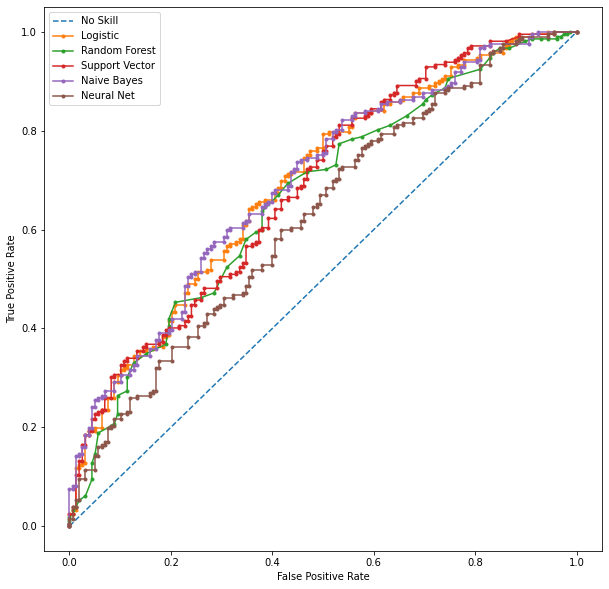

In [213]:
# calculate scores
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs[:, 1])
rf_auc = roc_auc_score(y_test, rf_probs[:, 1])
svc_auc = roc_auc_score(y_test, svc_probs[:, 1])
nb_auc = roc_auc_score(y_test, nb_probs[:, 1])
nn_auc = roc_auc_score(y_test, nn_probs[:, 1])
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Logistic: ROC AUC=%.3f' % (rf_auc))
print('Logistic: ROC AUC=%.3f' % (svc_auc))
print('Logistic: ROC AUC=%.3f' % (nb_auc))
print('Logistic: ROC AUC=%.3f' % (nn_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs[:, 1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs[:, 1])
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs[:, 1])
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs[:, 1])
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs[:, 1])
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
pyplot.plot(svc_fpr, svc_tpr, marker='.', label='Support Vector')
pyplot.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
pyplot.plot(nn_fpr, nn_tpr, marker='.', label='Neural Net')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
pyplot.rcParams["figure.figsize"] = (100,10)

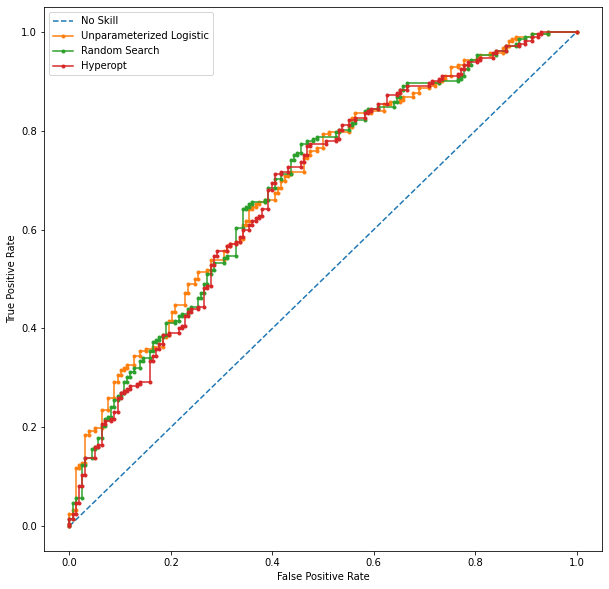

In [216]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs[:, 1])
lr_rand_fpr, lr_rand_tpr, _ = roc_curve(y_test, lr_rand_probs[:, 1])
lr_hyp_fpr, lr_hyp_tpr, _ = roc_curve(y_test, lr_hyp_probs[:, 1])
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Unparameterized Logistic')
pyplot.plot(lr_rand_fpr, lr_rand_tpr, marker='.', label='Random Search')
pyplot.plot(lr_hyp_fpr, lr_hyp_tpr, marker='.', label='Hyperopt')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
pyplot.rcParams["figure.figsize"] = (1,1)

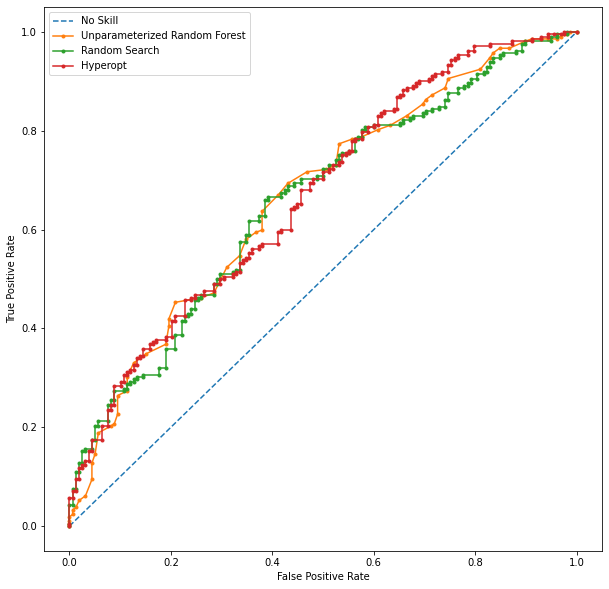

In [220]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs[:, 1])
rf_rand_fpr, rf_rand_tpr, _ = roc_curve(y_test, rf_rand_probs[:, 1])
rf_hyp_fpr, rf_hyp_tpr, _ = roc_curve(y_test, rf_hyp_probs[:, 1])
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Unparameterized Random Forest')
pyplot.plot(rf_rand_fpr, rf_rand_tpr, marker='.', label='Random Search')
pyplot.plot(rf_hyp_fpr, rf_hyp_tpr, marker='.', label='Hyperopt')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
pyplot.rcParams["figure.figsize"] = (100,10)

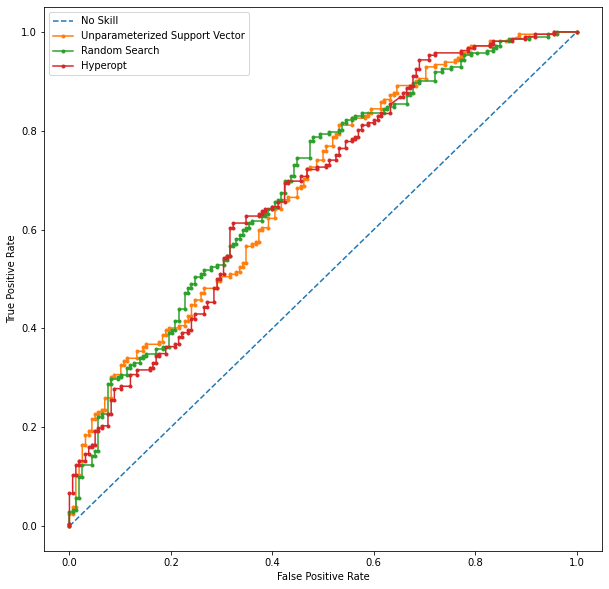

In [223]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs[:, 1])
svc_rand_fpr, svc_rand_tpr, _ = roc_curve(y_test, svc_rand_probs[:, 1])
svc_hyp_fpr, svc_hyp_tpr, _ = roc_curve(y_test, svc_hyp_probs[:, 1])
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svc_fpr, svc_tpr, marker='.', label='Unparameterized Support Vector')
pyplot.plot(svc_rand_fpr, svc_rand_tpr, marker='.', label='Random Search')
pyplot.plot(svc_hyp_fpr, svc_hyp_tpr, marker='.', label='Hyperopt')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
pyplot.rcParams["figure.figsize"] = (1,10)

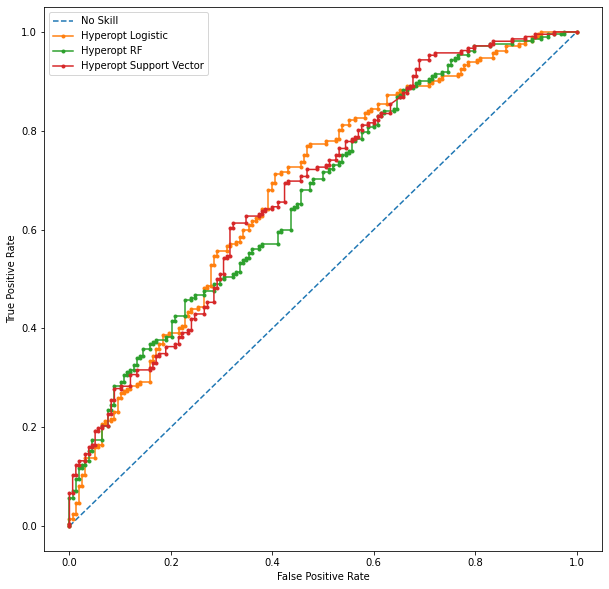

In [227]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_hyp_fpr, lr_hyp_tpr, marker='.', label='Hyperopt Logistic')
pyplot.plot(rf_hyp_fpr, rf_hyp_tpr, marker='.', label='Hyperopt RF')
pyplot.plot(svc_hyp_fpr, svc_hyp_tpr, marker='.', label='Hyperopt Support Vector')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
pyplot.rcParams["figure.figsize"] = (10,1)